<h1>Getting the Environment Set Up</h1>

We will be using tensorflow to create and use our neural networks. Throughout this notebook, we will see just how easy it is to make a working neural network that has a surprisingly high accuary!

In [1]:
import tensorflow as tf
from tensorflow import keras

<h1>Managing our Images</h1>

In [2]:
# parameters
input_shape = (28, 28) # the image is 28x28
num_classes = 10 # 10 labels
num_epochs = 5 # 5 training iterations, we bump this down because the model takes longer to train

# TODO You can change to the numbers MNIST dataset if you'd like to see how it works on different images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

# 60,000 images with each image being 28 by 28 pixels
train_images.shape

(60000, 28, 28)

Each image is represented by a 2-D array where each number in the list represents the brightness of the pixel

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

For our CNN model, we will need this to be a 3-D array for it to work with tensorflow properly. Below we will reshape it to be 3D and then print it out again

In [17]:
train_images = train_images.reshape((60000,28,28,1))
# This just has a massive output, if you want to see the new shape, uncomment it and run this block
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

We will also need to do this for our test images

In [5]:
test_images = test_images.reshape((10000, 28, 28, 1))

That wall of numbers isn't very easy to understand to our brains however. Lets go ahead and display a few of the images from the dataset with matplotlib. If you want to read more about matplot lib, you can go here: https://matplotlib.org/stable/users/index

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs():
    plt.figure(figsize=(10,10))
    for i in range(25):
        # Create a 5x5 grid of pictures, place current picture in the grid
        plt.subplot(5,5,i+1)
        # Remove the x and y ticks
        plt.xticks([])
        plt.yticks([])
        # Disable the grid in each picture, we dont want x/y axis for these
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

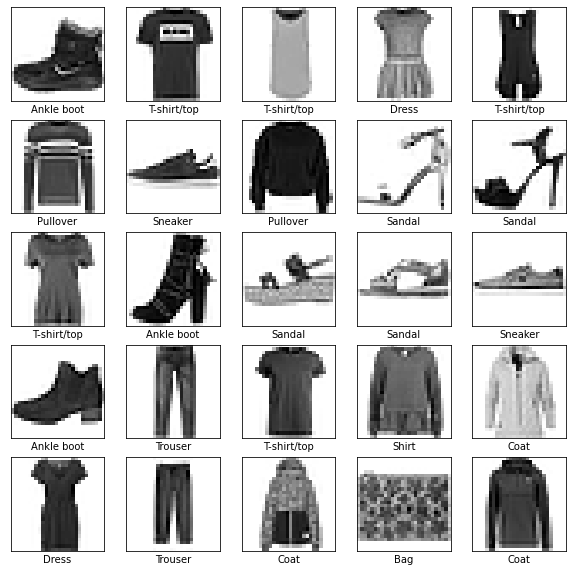

In [40]:
show_imgs()

<h1>Creating Our Model</h1>

Tensorflow lets us create a model super easily. A "Dense" layer is just a layer that is fully connected to the next layer, this is the basic type of layer that we are familiar with. Then all we need to do is specify how many neurons there should be in the given layer and tensorflow figures out the rest.

In [7]:
# The parameters in each of these Conv2D layers are as follows:
# layers.Conv2D(Output_size, Stride, activation, input_shape)
# Stride is just how far the square of relevant pixels moves between layers. 
# Simply put, for this model, the model looks at a 4x4 square of pixels and
# then moves 4 pixels to the left before checking the next 4x4 box of pixels
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max Pooling just grabs the largest number in a specified area and uses that for the whole area
    # below we are looking at a 2x2 square and using the largest number in that square as the value for the whole square

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10))

    return model

In [9]:
model = create_model()
# The optimizer is just an algorithm that helps the AI learn faster
# The loss is Sparse Categorical Crossentropy, the name is scary but it just means that 
# the outputs are converted to percentages and then compared to the expected output
# Metrics = accuracy means that we only care about how close the answer was to the actual answer 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

2022-07-05 20:35:25.415870: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-05 20:35:25.416183: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-05 20:35:25.425490: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<h1>Training our Model</h1>

Tensorflow makes training easy. All we need to do is give it the input data and the expected outputs with the number of epochs to train for and it will handle the rest!

In [10]:
model.fit(train_images, train_labels, epochs=num_epochs)

2022-07-05 20:35:32.596797: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-05 20:35:32.605941: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz


Epoch 1/5


   1/1875 [..............................] - ETA: 30:45 - loss: 40.4901 - accuracy: 0.0938

   2/1875 [..............................] - ETA: 1:37 - loss: 38.4513 - accuracy: 0.1016 

   4/1875 [..............................] - ETA: 1:05 - loss: 33.9278 - accuracy: 0.1113

   7/1875 [..............................] - ETA: 49s - loss: 29.5924 - accuracy: 0.1234 

  11/1875 [..............................] - ETA: 41s - loss: 25.0122 - accuracy: 0.1510

  13/1875 [..............................] - ETA: 45s - loss: 23.2345 - accuracy: 0.1637

  15/1875 [..............................] - ETA: 47s - loss: 21.7315 - accuracy: 0.1735

  17/1875 [..............................] - ETA: 49s - loss: 20.4489 - accuracy: 0.1817

  19/1875 [..............................] - ETA: 51s - loss: 19.3405 - accuracy: 0.1892

  21/1875 [..............................] - ETA: 51s - loss: 18.3679 - accuracy: 0.1968

  23/1875 [..............................] - ETA: 51s - loss: 17.5122 - accuracy: 0.2033

  25/1875 [..............................] - ETA: 51s - loss: 16.7484 - accuracy: 0.2101

  27/1875 [..............................] - ETA: 52s - loss: 16.0631 - accuracy: 0.2173

  29/1875 [..............................] - ETA: 53s - loss: 15.4450 - accuracy: 0.2242

  31/1875 [..............................] - ETA: 53s - loss: 14.8823 - accuracy: 0.2313

  33/1875 [..............................] - ETA: 53s - loss: 14.3672 - accuracy: 0.2384

  35/1875 [..............................] - ETA: 53s - loss: 13.8950 - accuracy: 0.2452

  37/1875 [..............................] - ETA: 53s - loss: 13.4591 - accuracy: 0.2521

  39/1875 [..............................] - ETA: 53s - loss: 13.0549 - accuracy: 0.2591

  41/1875 [..............................] - ETA: 53s - loss: 12.6795 - accuracy: 0.2659

  43/1875 [..............................] - ETA: 53s - loss: 12.3303 - accuracy: 0.2726

  45/1875 [..............................] - ETA: 53s - loss: 12.0044 - accuracy: 0.2789

  47/1875 [..............................] - ETA: 53s - loss: 11.6993 - accuracy: 0.2850

  49/1875 [..............................] - ETA: 53s - loss: 11.4132 - accuracy: 0.2909

  51/1875 [..............................] - ETA: 54s - loss: 11.1437 - accuracy: 0.2966

  52/1875 [..............................] - ETA: 55s - loss: 11.0147 - accuracy: 0.2994

  53/1875 [..............................] - ETA: 56s - loss: 10.8894 - accuracy: 0.3022

  55/1875 [..............................] - ETA: 58s - loss: 10.6493 - accuracy: 0.3077

  57/1875 [..............................] - ETA: 58s - loss: 10.4220 - accuracy: 0.3130

  60/1875 [..............................] - ETA: 57s - loss: 10.1031 - accuracy: 0.3207

  62/1875 [..............................] - ETA: 58s - loss: 9.9036 - accuracy: 0.3257 

  64/1875 [>.............................] - ETA: 57s - loss: 9.7135 - accuracy: 0.3306

  67/1875 [>.............................] - ETA: 56s - loss: 9.4449 - accuracy: 0.3378

  69/1875 [>.............................] - ETA: 56s - loss: 9.2758 - accuracy: 0.3424

  72/1875 [>.............................] - ETA: 55s - loss: 9.0359 - accuracy: 0.3490

  74/1875 [>.............................] - ETA: 55s - loss: 8.8845 - accuracy: 0.3533

  76/1875 [>.............................] - ETA: 55s - loss: 8.7393 - accuracy: 0.3575

  78/1875 [>.............................] - ETA: 56s - loss: 8.5998 - accuracy: 0.3616

  80/1875 [>.............................] - ETA: 56s - loss: 8.4657 - accuracy: 0.3657

  82/1875 [>.............................] - ETA: 56s - loss: 8.3368 - accuracy: 0.3697

  84/1875 [>.............................] - ETA: 56s - loss: 8.2127 - accuracy: 0.3736

  86/1875 [>.............................] - ETA: 56s - loss: 8.0932 - accuracy: 0.3774

  88/1875 [>.............................] - ETA: 56s - loss: 7.9780 - accuracy: 0.3811

  90/1875 [>.............................] - ETA: 56s - loss: 7.8670 - accuracy: 0.3847

  92/1875 [>.............................] - ETA: 56s - loss: 7.7598 - accuracy: 0.3882

  94/1875 [>.............................] - ETA: 56s - loss: 7.6563 - accuracy: 0.3917

  96/1875 [>.............................] - ETA: 56s - loss: 7.5562 - accuracy: 0.3950

  98/1875 [>.............................] - ETA: 56s - loss: 7.4594 - accuracy: 0.3983

 100/1875 [>.............................] - ETA: 56s - loss: 7.3656 - accuracy: 0.4015

 102/1875 [>.............................] - ETA: 56s - loss: 7.2747 - accuracy: 0.4047

 104/1875 [>.............................] - ETA: 56s - loss: 7.1865 - accuracy: 0.4078

 106/1875 [>.............................] - ETA: 56s - loss: 7.1010 - accuracy: 0.4108

 108/1875 [>.............................] - ETA: 56s - loss: 7.0181 - accuracy: 0.4138

 110/1875 [>.............................] - ETA: 56s - loss: 6.9376 - accuracy: 0.4167

 112/1875 [>.............................] - ETA: 56s - loss: 6.8593 - accuracy: 0.4196

 114/1875 [>.............................] - ETA: 56s - loss: 6.7832 - accuracy: 0.4224

 116/1875 [>.............................] - ETA: 56s - loss: 6.7093 - accuracy: 0.4251

 118/1875 [>.............................] - ETA: 56s - loss: 6.6373 - accuracy: 0.4278

 120/1875 [>.............................] - ETA: 56s - loss: 6.5673 - accuracy: 0.4304

 122/1875 [>.............................] - ETA: 56s - loss: 6.4992 - accuracy: 0.4330

 124/1875 [>.............................] - ETA: 56s - loss: 6.4328 - accuracy: 0.4356

 126/1875 [=>............................] - ETA: 56s - loss: 6.3682 - accuracy: 0.4380

 128/1875 [=>............................] - ETA: 56s - loss: 6.3053 - accuracy: 0.4404

 130/1875 [=>............................] - ETA: 56s - loss: 6.2438 - accuracy: 0.4428

 132/1875 [=>............................] - ETA: 56s - loss: 6.1840 - accuracy: 0.4452

 134/1875 [=>............................] - ETA: 56s - loss: 6.1255 - accuracy: 0.4475

 136/1875 [=>............................] - ETA: 56s - loss: 6.0685 - accuracy: 0.4497

 138/1875 [=>............................] - ETA: 56s - loss: 6.0129 - accuracy: 0.4519

 141/1875 [=>............................] - ETA: 56s - loss: 5.9319 - accuracy: 0.4551

 143/1875 [=>............................] - ETA: 55s - loss: 5.8795 - accuracy: 0.4572

 145/1875 [=>............................] - ETA: 55s - loss: 5.8282 - accuracy: 0.4593

 147/1875 [=>............................] - ETA: 55s - loss: 5.7781 - accuracy: 0.4614

 149/1875 [=>............................] - ETA: 55s - loss: 5.7291 - accuracy: 0.4634

 151/1875 [=>............................] - ETA: 55s - loss: 5.6811 - accuracy: 0.4654

 154/1875 [=>............................] - ETA: 55s - loss: 5.6111 - accuracy: 0.4683

 157/1875 [=>............................] - ETA: 54s - loss: 5.5432 - accuracy: 0.4711

 160/1875 [=>............................] - ETA: 54s - loss: 5.4774 - accuracy: 0.4739

 162/1875 [=>............................] - ETA: 53s - loss: 5.4346 - accuracy: 0.4757

 165/1875 [=>............................] - ETA: 53s - loss: 5.3721 - accuracy: 0.4784

 168/1875 [=>............................] - ETA: 53s - loss: 5.3113 - accuracy: 0.4810

 171/1875 [=>............................] - ETA: 52s - loss: 5.2523 - accuracy: 0.4836

 174/1875 [=>............................] - ETA: 52s - loss: 5.1950 - accuracy: 0.4862

 177/1875 [=>............................] - ETA: 52s - loss: 5.1393 - accuracy: 0.4886

 179/1875 [=>............................] - ETA: 51s - loss: 5.1030 - accuracy: 0.4903

 182/1875 [=>............................] - ETA: 51s - loss: 5.0498 - accuracy: 0.4927

 185/1875 [=>............................] - ETA: 51s - loss: 4.9980 - accuracy: 0.4950

 188/1875 [==>...........................] - ETA: 51s - loss: 4.9476 - accuracy: 0.4973

 189/1875 [==>...........................] - ETA: 51s - loss: 4.9311 - accuracy: 0.4981

 190/1875 [==>...........................] - ETA: 51s - loss: 4.9147 - accuracy: 0.4988

 191/1875 [==>...........................] - ETA: 51s - loss: 4.8985 - accuracy: 0.4996

 193/1875 [==>...........................] - ETA: 51s - loss: 4.8665 - accuracy: 0.5011

 195/1875 [==>...........................] - ETA: 51s - loss: 4.8350 - accuracy: 0.5025

 197/1875 [==>...........................] - ETA: 51s - loss: 4.8040 - accuracy: 0.5040

 199/1875 [==>...........................] - ETA: 51s - loss: 4.7735 - accuracy: 0.5054

 200/1875 [==>...........................] - ETA: 51s - loss: 4.7584 - accuracy: 0.5061

 201/1875 [==>...........................] - ETA: 52s - loss: 4.7435 - accuracy: 0.5068

 203/1875 [==>...........................] - ETA: 52s - loss: 4.7141 - accuracy: 0.5082

 205/1875 [==>...........................] - ETA: 52s - loss: 4.6851 - accuracy: 0.5096

 206/1875 [==>...........................] - ETA: 52s - loss: 4.6707 - accuracy: 0.5103

 209/1875 [==>...........................] - ETA: 51s - loss: 4.6284 - accuracy: 0.5123

 212/1875 [==>...........................] - ETA: 51s - loss: 4.5871 - accuracy: 0.5143

 215/1875 [==>...........................] - ETA: 51s - loss: 4.5467 - accuracy: 0.5163

 218/1875 [==>...........................] - ETA: 50s - loss: 4.5072 - accuracy: 0.5182

 221/1875 [==>...........................] - ETA: 50s - loss: 4.4686 - accuracy: 0.5201

 224/1875 [==>...........................] - ETA: 50s - loss: 4.4309 - accuracy: 0.5220

 227/1875 [==>...........................] - ETA: 49s - loss: 4.3940 - accuracy: 0.5238

 230/1875 [==>...........................] - ETA: 49s - loss: 4.3578 - accuracy: 0.5257

 233/1875 [==>...........................] - ETA: 49s - loss: 4.3225 - accuracy: 0.5275

 236/1875 [==>...........................] - ETA: 49s - loss: 4.2878 - accuracy: 0.5292

 239/1875 [==>...........................] - ETA: 48s - loss: 4.2539 - accuracy: 0.5310

 242/1875 [==>...........................] - ETA: 48s - loss: 4.2207 - accuracy: 0.5327

 245/1875 [==>...........................] - ETA: 48s - loss: 4.1882 - accuracy: 0.5344

 248/1875 [==>...........................] - ETA: 47s - loss: 4.1563 - accuracy: 0.5361

 251/1875 [===>..........................] - ETA: 47s - loss: 4.1250 - accuracy: 0.5377

 254/1875 [===>..........................] - ETA: 47s - loss: 4.0944 - accuracy: 0.5393

 257/1875 [===>..........................] - ETA: 47s - loss: 4.0644 - accuracy: 0.5409

 260/1875 [===>..........................] - ETA: 47s - loss: 4.0349 - accuracy: 0.5424

 262/1875 [===>..........................] - ETA: 46s - loss: 4.0156 - accuracy: 0.5435

 265/1875 [===>..........................] - ETA: 46s - loss: 3.9871 - accuracy: 0.5450

 268/1875 [===>..........................] - ETA: 46s - loss: 3.9591 - accuracy: 0.5465

 271/1875 [===>..........................] - ETA: 46s - loss: 3.9316 - accuracy: 0.5479

 273/1875 [===>..........................] - ETA: 46s - loss: 3.9136 - accuracy: 0.5489

 276/1875 [===>..........................] - ETA: 45s - loss: 3.8869 - accuracy: 0.5503

 278/1875 [===>..........................] - ETA: 45s - loss: 3.8694 - accuracy: 0.5513

 281/1875 [===>..........................] - ETA: 45s - loss: 3.8436 - accuracy: 0.5527

 284/1875 [===>..........................] - ETA: 45s - loss: 3.8181 - accuracy: 0.5541

 287/1875 [===>..........................] - ETA: 45s - loss: 3.7932 - accuracy: 0.5554

 290/1875 [===>..........................] - ETA: 44s - loss: 3.7686 - accuracy: 0.5568

 293/1875 [===>..........................] - ETA: 44s - loss: 3.7445 - accuracy: 0.5581

 296/1875 [===>..........................] - ETA: 44s - loss: 3.7207 - accuracy: 0.5595

 299/1875 [===>..........................] - ETA: 44s - loss: 3.6974 - accuracy: 0.5608

 302/1875 [===>..........................] - ETA: 44s - loss: 3.6745 - accuracy: 0.5621

 304/1875 [===>..........................] - ETA: 44s - loss: 3.6594 - accuracy: 0.5629

 307/1875 [===>..........................] - ETA: 43s - loss: 3.6370 - accuracy: 0.5642

 310/1875 [===>..........................] - ETA: 43s - loss: 3.6150 - accuracy: 0.5655

 313/1875 [====>.........................] - ETA: 43s - loss: 3.5934 - accuracy: 0.5667

 315/1875 [====>.........................] - ETA: 43s - loss: 3.5792 - accuracy: 0.5675

 318/1875 [====>.........................] - ETA: 43s - loss: 3.5581 - accuracy: 0.5688

 321/1875 [====>.........................] - ETA: 43s - loss: 3.5373 - accuracy: 0.5700

 323/1875 [====>.........................] - ETA: 42s - loss: 3.5236 - accuracy: 0.5708

 324/1875 [====>.........................] - ETA: 43s - loss: 3.5169 - accuracy: 0.5712

 325/1875 [====>.........................] - ETA: 43s - loss: 3.5101 - accuracy: 0.5715

 326/1875 [====>.........................] - ETA: 43s - loss: 3.5034 - accuracy: 0.5719

 328/1875 [====>.........................] - ETA: 43s - loss: 3.4901 - accuracy: 0.5727

 330/1875 [====>.........................] - ETA: 43s - loss: 3.4769 - accuracy: 0.5735

 331/1875 [====>.........................] - ETA: 43s - loss: 3.4704 - accuracy: 0.5739

 333/1875 [====>.........................] - ETA: 43s - loss: 3.4574 - accuracy: 0.5746

 335/1875 [====>.........................] - ETA: 43s - loss: 3.4445 - accuracy: 0.5754

 337/1875 [====>.........................] - ETA: 43s - loss: 3.4317 - accuracy: 0.5762

 340/1875 [====>.........................] - ETA: 43s - loss: 3.4129 - accuracy: 0.5773

 342/1875 [====>.........................] - ETA: 43s - loss: 3.4004 - accuracy: 0.5780

 345/1875 [====>.........................] - ETA: 42s - loss: 3.3820 - accuracy: 0.5791

 348/1875 [====>.........................] - ETA: 42s - loss: 3.3638 - accuracy: 0.5802

 351/1875 [====>.........................] - ETA: 42s - loss: 3.3459 - accuracy: 0.5813

 353/1875 [====>.........................] - ETA: 42s - loss: 3.3341 - accuracy: 0.5820

 355/1875 [====>.........................] - ETA: 42s - loss: 3.3224 - accuracy: 0.5827

 357/1875 [====>.........................] - ETA: 42s - loss: 3.3108 - accuracy: 0.5834

 359/1875 [====>.........................] - ETA: 42s - loss: 3.2994 - accuracy: 0.5841

 362/1875 [====>.........................] - ETA: 42s - loss: 3.2824 - accuracy: 0.5852

 365/1875 [====>.........................] - ETA: 42s - loss: 3.2656 - accuracy: 0.5862

 368/1875 [====>.........................] - ETA: 42s - loss: 3.2491 - accuracy: 0.5872

 371/1875 [====>.........................] - ETA: 42s - loss: 3.2328 - accuracy: 0.5882

 374/1875 [====>.........................] - ETA: 42s - loss: 3.2167 - accuracy: 0.5892

 377/1875 [=====>........................] - ETA: 41s - loss: 3.2008 - accuracy: 0.5902

 380/1875 [=====>........................] - ETA: 41s - loss: 3.1852 - accuracy: 0.5911

 383/1875 [=====>........................] - ETA: 41s - loss: 3.1697 - accuracy: 0.5921

 386/1875 [=====>........................] - ETA: 41s - loss: 3.1545 - accuracy: 0.5930

 389/1875 [=====>........................] - ETA: 41s - loss: 3.1395 - accuracy: 0.5940

 392/1875 [=====>........................] - ETA: 41s - loss: 3.1247 - accuracy: 0.5949

 395/1875 [=====>........................] - ETA: 40s - loss: 3.1101 - accuracy: 0.5958

 398/1875 [=====>........................] - ETA: 40s - loss: 3.0956 - accuracy: 0.5967

 401/1875 [=====>........................] - ETA: 40s - loss: 3.0814 - accuracy: 0.5976

 404/1875 [=====>........................] - ETA: 40s - loss: 3.0673 - accuracy: 0.5984

 407/1875 [=====>........................] - ETA: 40s - loss: 3.0534 - accuracy: 0.5993

 410/1875 [=====>........................] - ETA: 40s - loss: 3.0396 - accuracy: 0.6002

 413/1875 [=====>........................] - ETA: 39s - loss: 3.0261 - accuracy: 0.6010

 416/1875 [=====>........................] - ETA: 39s - loss: 3.0126 - accuracy: 0.6019

 419/1875 [=====>........................] - ETA: 39s - loss: 2.9994 - accuracy: 0.6027

 421/1875 [=====>........................] - ETA: 39s - loss: 2.9906 - accuracy: 0.6033

 424/1875 [=====>........................] - ETA: 39s - loss: 2.9777 - accuracy: 0.6041

 427/1875 [=====>........................] - ETA: 39s - loss: 2.9648 - accuracy: 0.6049

 430/1875 [=====>........................] - ETA: 39s - loss: 2.9522 - accuracy: 0.6057

 433/1875 [=====>........................] - ETA: 38s - loss: 2.9397 - accuracy: 0.6065

 436/1875 [=====>........................] - ETA: 38s - loss: 2.9273 - accuracy: 0.6073

 438/1875 [======>.......................] - ETA: 38s - loss: 2.9191 - accuracy: 0.6078

 441/1875 [======>.......................] - ETA: 38s - loss: 2.9070 - accuracy: 0.6086

 444/1875 [======>.......................] - ETA: 38s - loss: 2.8950 - accuracy: 0.6094

 447/1875 [======>.......................] - ETA: 38s - loss: 2.8831 - accuracy: 0.6102

 450/1875 [======>.......................] - ETA: 38s - loss: 2.8713 - accuracy: 0.6109

 453/1875 [======>.......................] - ETA: 38s - loss: 2.8597 - accuracy: 0.6117

 456/1875 [======>.......................] - ETA: 38s - loss: 2.8482 - accuracy: 0.6125

 459/1875 [======>.......................] - ETA: 37s - loss: 2.8369 - accuracy: 0.6132

 462/1875 [======>.......................] - ETA: 37s - loss: 2.8256 - accuracy: 0.6139

 465/1875 [======>.......................] - ETA: 37s - loss: 2.8145 - accuracy: 0.6147

 468/1875 [======>.......................] - ETA: 37s - loss: 2.8035 - accuracy: 0.6154

 470/1875 [======>.......................] - ETA: 37s - loss: 2.7963 - accuracy: 0.6159

 473/1875 [======>.......................] - ETA: 37s - loss: 2.7855 - accuracy: 0.6166

 476/1875 [======>.......................] - ETA: 37s - loss: 2.7748 - accuracy: 0.6173

 479/1875 [======>.......................] - ETA: 37s - loss: 2.7642 - accuracy: 0.6180

 481/1875 [======>.......................] - ETA: 36s - loss: 2.7573 - accuracy: 0.6185

 484/1875 [======>.......................] - ETA: 36s - loss: 2.7469 - accuracy: 0.6192

 487/1875 [======>.......................] - ETA: 36s - loss: 2.7366 - accuracy: 0.6199

 489/1875 [======>.......................] - ETA: 36s - loss: 2.7298 - accuracy: 0.6203

 492/1875 [======>.......................] - ETA: 36s - loss: 2.7197 - accuracy: 0.6210

 495/1875 [======>.......................] - ETA: 36s - loss: 2.7097 - accuracy: 0.6217

 497/1875 [======>.......................] - ETA: 36s - loss: 2.7031 - accuracy: 0.6221

 499/1875 [======>.......................] - ETA: 36s - loss: 2.6965 - accuracy: 0.6226

 501/1875 [=======>......................] - ETA: 36s - loss: 2.6900 - accuracy: 0.6230

 503/1875 [=======>......................] - ETA: 36s - loss: 2.6835 - accuracy: 0.6235

 506/1875 [=======>......................] - ETA: 36s - loss: 2.6738 - accuracy: 0.6241

 509/1875 [=======>......................] - ETA: 36s - loss: 2.6643 - accuracy: 0.6248

 512/1875 [=======>......................] - ETA: 35s - loss: 2.6548 - accuracy: 0.6254

 515/1875 [=======>......................] - ETA: 35s - loss: 2.6454 - accuracy: 0.6261

 517/1875 [=======>......................] - ETA: 35s - loss: 2.6392 - accuracy: 0.6265

 518/1875 [=======>......................] - ETA: 35s - loss: 2.6361 - accuracy: 0.6267

 520/1875 [=======>......................] - ETA: 35s - loss: 2.6300 - accuracy: 0.6271

 522/1875 [=======>......................] - ETA: 35s - loss: 2.6239 - accuracy: 0.6275

 524/1875 [=======>......................] - ETA: 35s - loss: 2.6179 - accuracy: 0.6280

 527/1875 [=======>......................] - ETA: 35s - loss: 2.6089 - accuracy: 0.6286

 529/1875 [=======>......................] - ETA: 35s - loss: 2.6029 - accuracy: 0.6290

 532/1875 [=======>......................] - ETA: 35s - loss: 2.5941 - accuracy: 0.6296

 535/1875 [=======>......................] - ETA: 35s - loss: 2.5853 - accuracy: 0.6302

 538/1875 [=======>......................] - ETA: 35s - loss: 2.5766 - accuracy: 0.6308

 541/1875 [=======>......................] - ETA: 35s - loss: 2.5680 - accuracy: 0.6314

 544/1875 [=======>......................] - ETA: 35s - loss: 2.5595 - accuracy: 0.6320

 546/1875 [=======>......................] - ETA: 35s - loss: 2.5539 - accuracy: 0.6324

 549/1875 [=======>......................] - ETA: 34s - loss: 2.5455 - accuracy: 0.6330

 552/1875 [=======>......................] - ETA: 34s - loss: 2.5372 - accuracy: 0.6335

 555/1875 [=======>......................] - ETA: 34s - loss: 2.5289 - accuracy: 0.6341

 558/1875 [=======>......................] - ETA: 34s - loss: 2.5208 - accuracy: 0.6347

 561/1875 [=======>......................] - ETA: 34s - loss: 2.5127 - accuracy: 0.6352

 563/1875 [========>.....................] - ETA: 34s - loss: 2.5073 - accuracy: 0.6356

 566/1875 [========>.....................] - ETA: 34s - loss: 2.4994 - accuracy: 0.6362

 569/1875 [========>.....................] - ETA: 34s - loss: 2.4915 - accuracy: 0.6367

 572/1875 [========>.....................] - ETA: 33s - loss: 2.4836 - accuracy: 0.6373

 575/1875 [========>.....................] - ETA: 33s - loss: 2.4759 - accuracy: 0.6378

 578/1875 [========>.....................] - ETA: 33s - loss: 2.4682 - accuracy: 0.6384

 580/1875 [========>.....................] - ETA: 33s - loss: 2.4631 - accuracy: 0.6387

 583/1875 [========>.....................] - ETA: 33s - loss: 2.4555 - accuracy: 0.6393

 585/1875 [========>.....................] - ETA: 33s - loss: 2.4504 - accuracy: 0.6396

 587/1875 [========>.....................] - ETA: 33s - loss: 2.4454 - accuracy: 0.6400

 589/1875 [========>.....................] - ETA: 33s - loss: 2.4405 - accuracy: 0.6404

 591/1875 [========>.....................] - ETA: 33s - loss: 2.4355 - accuracy: 0.6407

 593/1875 [========>.....................] - ETA: 33s - loss: 2.4306 - accuracy: 0.6411

 595/1875 [========>.....................] - ETA: 33s - loss: 2.4257 - accuracy: 0.6414

 598/1875 [========>.....................] - ETA: 33s - loss: 2.4184 - accuracy: 0.6419

 601/1875 [========>.....................] - ETA: 33s - loss: 2.4112 - accuracy: 0.6425

 603/1875 [========>.....................] - ETA: 33s - loss: 2.4064 - accuracy: 0.6428

 605/1875 [========>.....................] - ETA: 33s - loss: 2.4017 - accuracy: 0.6431

 606/1875 [========>.....................] - ETA: 33s - loss: 2.3993 - accuracy: 0.6433

 607/1875 [========>.....................] - ETA: 33s - loss: 2.3970 - accuracy: 0.6435

 608/1875 [========>.....................] - ETA: 33s - loss: 2.3946 - accuracy: 0.6437

 610/1875 [========>.....................] - ETA: 33s - loss: 2.3899 - accuracy: 0.6440

 611/1875 [========>.....................] - ETA: 33s - loss: 2.3876 - accuracy: 0.6442

 613/1875 [========>.....................] - ETA: 33s - loss: 2.3829 - accuracy: 0.6445

 615/1875 [========>.....................] - ETA: 33s - loss: 2.3783 - accuracy: 0.6448

 617/1875 [========>.....................] - ETA: 33s - loss: 2.3737 - accuracy: 0.6452

 619/1875 [========>.....................] - ETA: 33s - loss: 2.3691 - accuracy: 0.6455

 620/1875 [========>.....................] - ETA: 33s - loss: 2.3668 - accuracy: 0.6457

 621/1875 [========>.....................] - ETA: 33s - loss: 2.3646 - accuracy: 0.6458

 622/1875 [========>.....................] - ETA: 33s - loss: 2.3623 - accuracy: 0.6460

 624/1875 [========>.....................] - ETA: 33s - loss: 2.3578 - accuracy: 0.6463

 626/1875 [=========>....................] - ETA: 33s - loss: 2.3533 - accuracy: 0.6467

 628/1875 [=========>....................] - ETA: 33s - loss: 2.3488 - accuracy: 0.6470

 631/1875 [=========>....................] - ETA: 33s - loss: 2.3422 - accuracy: 0.6475

 633/1875 [=========>....................] - ETA: 33s - loss: 2.3378 - accuracy: 0.6478

 635/1875 [=========>....................] - ETA: 32s - loss: 2.3334 - accuracy: 0.6481

 636/1875 [=========>....................] - ETA: 33s - loss: 2.3312 - accuracy: 0.6483

 638/1875 [=========>....................] - ETA: 32s - loss: 2.3269 - accuracy: 0.6486

 639/1875 [=========>....................] - ETA: 33s - loss: 2.3247 - accuracy: 0.6488

 640/1875 [=========>....................] - ETA: 33s - loss: 2.3226 - accuracy: 0.6489

 643/1875 [=========>....................] - ETA: 32s - loss: 2.3161 - accuracy: 0.6494

 646/1875 [=========>....................] - ETA: 32s - loss: 2.3097 - accuracy: 0.6499

 648/1875 [=========>....................] - ETA: 32s - loss: 2.3055 - accuracy: 0.6502

 650/1875 [=========>....................] - ETA: 32s - loss: 2.3013 - accuracy: 0.6505

 652/1875 [=========>....................] - ETA: 32s - loss: 2.2971 - accuracy: 0.6508

 653/1875 [=========>....................] - ETA: 32s - loss: 2.2950 - accuracy: 0.6509

 655/1875 [=========>....................] - ETA: 32s - loss: 2.2909 - accuracy: 0.6513

 657/1875 [=========>....................] - ETA: 32s - loss: 2.2867 - accuracy: 0.6516

 659/1875 [=========>....................] - ETA: 32s - loss: 2.2826 - accuracy: 0.6519

 662/1875 [=========>....................] - ETA: 32s - loss: 2.2765 - accuracy: 0.6523

 664/1875 [=========>....................] - ETA: 32s - loss: 2.2724 - accuracy: 0.6526

 667/1875 [=========>....................] - ETA: 32s - loss: 2.2663 - accuracy: 0.6531

 669/1875 [=========>....................] - ETA: 32s - loss: 2.2623 - accuracy: 0.6534

 671/1875 [=========>....................] - ETA: 32s - loss: 2.2583 - accuracy: 0.6537

 672/1875 [=========>....................] - ETA: 32s - loss: 2.2563 - accuracy: 0.6538

 674/1875 [=========>....................] - ETA: 32s - loss: 2.2524 - accuracy: 0.6541

 675/1875 [=========>....................] - ETA: 32s - loss: 2.2504 - accuracy: 0.6543

 677/1875 [=========>....................] - ETA: 32s - loss: 2.2465 - accuracy: 0.6546

 678/1875 [=========>....................] - ETA: 32s - loss: 2.2445 - accuracy: 0.6547

 680/1875 [=========>....................] - ETA: 32s - loss: 2.2406 - accuracy: 0.6550

 681/1875 [=========>....................] - ETA: 32s - loss: 2.2386 - accuracy: 0.6552

 683/1875 [=========>....................] - ETA: 32s - loss: 2.2348 - accuracy: 0.6554

 685/1875 [=========>....................] - ETA: 32s - loss: 2.2309 - accuracy: 0.6557

 687/1875 [=========>....................] - ETA: 32s - loss: 2.2271 - accuracy: 0.6560

 688/1875 [==========>...................] - ETA: 32s - loss: 2.2252 - accuracy: 0.6562

 690/1875 [==========>...................] - ETA: 32s - loss: 2.2213 - accuracy: 0.6565

 692/1875 [==========>...................] - ETA: 32s - loss: 2.2176 - accuracy: 0.6567

 694/1875 [==========>...................] - ETA: 32s - loss: 2.2138 - accuracy: 0.6570

 696/1875 [==========>...................] - ETA: 32s - loss: 2.2100 - accuracy: 0.6573

 698/1875 [==========>...................] - ETA: 32s - loss: 2.2063 - accuracy: 0.6576

 700/1875 [==========>...................] - ETA: 32s - loss: 2.2026 - accuracy: 0.6579

 701/1875 [==========>...................] - ETA: 32s - loss: 2.2007 - accuracy: 0.6580

 703/1875 [==========>...................] - ETA: 32s - loss: 2.1970 - accuracy: 0.6583

 704/1875 [==========>...................] - ETA: 32s - loss: 2.1952 - accuracy: 0.6584

 706/1875 [==========>...................] - ETA: 32s - loss: 2.1915 - accuracy: 0.6587

 708/1875 [==========>...................] - ETA: 32s - loss: 2.1879 - accuracy: 0.6590

 710/1875 [==========>...................] - ETA: 32s - loss: 2.1842 - accuracy: 0.6593

 712/1875 [==========>...................] - ETA: 32s - loss: 2.1806 - accuracy: 0.6595

 714/1875 [==========>...................] - ETA: 32s - loss: 2.1770 - accuracy: 0.6598

 716/1875 [==========>...................] - ETA: 32s - loss: 2.1734 - accuracy: 0.6601

 718/1875 [==========>...................] - ETA: 32s - loss: 2.1699 - accuracy: 0.6604

 720/1875 [==========>...................] - ETA: 31s - loss: 2.1663 - accuracy: 0.6606

 722/1875 [==========>...................] - ETA: 31s - loss: 2.1628 - accuracy: 0.6609

 723/1875 [==========>...................] - ETA: 31s - loss: 2.1611 - accuracy: 0.6611

 725/1875 [==========>...................] - ETA: 31s - loss: 2.1575 - accuracy: 0.6613

 727/1875 [==========>...................] - ETA: 31s - loss: 2.1541 - accuracy: 0.6616

 729/1875 [==========>...................] - ETA: 31s - loss: 2.1506 - accuracy: 0.6619

 730/1875 [==========>...................] - ETA: 31s - loss: 2.1489 - accuracy: 0.6620

 731/1875 [==========>...................] - ETA: 31s - loss: 2.1471 - accuracy: 0.6621

 733/1875 [==========>...................] - ETA: 31s - loss: 2.1437 - accuracy: 0.6624

 735/1875 [==========>...................] - ETA: 31s - loss: 2.1403 - accuracy: 0.6627

 737/1875 [==========>...................] - ETA: 31s - loss: 2.1369 - accuracy: 0.6629

 739/1875 [==========>...................] - ETA: 31s - loss: 2.1335 - accuracy: 0.6632

 741/1875 [==========>...................] - ETA: 31s - loss: 2.1301 - accuracy: 0.6634

 743/1875 [==========>...................] - ETA: 31s - loss: 2.1267 - accuracy: 0.6637

 745/1875 [==========>...................] - ETA: 31s - loss: 2.1234 - accuracy: 0.6640

 747/1875 [==========>...................] - ETA: 31s - loss: 2.1201 - accuracy: 0.6642

 749/1875 [==========>...................] - ETA: 31s - loss: 2.1167 - accuracy: 0.6645

 751/1875 [===========>..................] - ETA: 31s - loss: 2.1134 - accuracy: 0.6647

 753/1875 [===========>..................] - ETA: 31s - loss: 2.1102 - accuracy: 0.6650

 755/1875 [===========>..................] - ETA: 31s - loss: 2.1069 - accuracy: 0.6653

 756/1875 [===========>..................] - ETA: 31s - loss: 2.1053 - accuracy: 0.6654

 757/1875 [===========>..................] - ETA: 31s - loss: 2.1036 - accuracy: 0.6655

 759/1875 [===========>..................] - ETA: 31s - loss: 2.1004 - accuracy: 0.6658

 760/1875 [===========>..................] - ETA: 31s - loss: 2.0988 - accuracy: 0.6659

 762/1875 [===========>..................] - ETA: 31s - loss: 2.0955 - accuracy: 0.6661

 764/1875 [===========>..................] - ETA: 31s - loss: 2.0923 - accuracy: 0.6664

 766/1875 [===========>..................] - ETA: 31s - loss: 2.0891 - accuracy: 0.6666

 768/1875 [===========>..................] - ETA: 31s - loss: 2.0860 - accuracy: 0.6669

 769/1875 [===========>..................] - ETA: 31s - loss: 2.0844 - accuracy: 0.6670

 771/1875 [===========>..................] - ETA: 31s - loss: 2.0812 - accuracy: 0.6673

 773/1875 [===========>..................] - ETA: 31s - loss: 2.0781 - accuracy: 0.6675

 775/1875 [===========>..................] - ETA: 31s - loss: 2.0750 - accuracy: 0.6678

 777/1875 [===========>..................] - ETA: 31s - loss: 2.0718 - accuracy: 0.6680

 779/1875 [===========>..................] - ETA: 31s - loss: 2.0688 - accuracy: 0.6682

 781/1875 [===========>..................] - ETA: 31s - loss: 2.0657 - accuracy: 0.6685

 783/1875 [===========>..................] - ETA: 31s - loss: 2.0626 - accuracy: 0.6687

 785/1875 [===========>..................] - ETA: 31s - loss: 2.0595 - accuracy: 0.6690

 787/1875 [===========>..................] - ETA: 31s - loss: 2.0565 - accuracy: 0.6692

 790/1875 [===========>..................] - ETA: 30s - loss: 2.0519 - accuracy: 0.6696

 794/1875 [===========>..................] - ETA: 30s - loss: 2.0459 - accuracy: 0.6700

 798/1875 [===========>..................] - ETA: 30s - loss: 2.0400 - accuracy: 0.6705

 802/1875 [===========>..................] - ETA: 30s - loss: 2.0340 - accuracy: 0.6710

 806/1875 [===========>..................] - ETA: 30s - loss: 2.0282 - accuracy: 0.6715

 810/1875 [===========>..................] - ETA: 30s - loss: 2.0224 - accuracy: 0.6719

 814/1875 [============>.................] - ETA: 29s - loss: 2.0166 - accuracy: 0.6724

 818/1875 [============>.................] - ETA: 29s - loss: 2.0109 - accuracy: 0.6728

 822/1875 [============>.................] - ETA: 29s - loss: 2.0052 - accuracy: 0.6733

 826/1875 [============>.................] - ETA: 29s - loss: 1.9996 - accuracy: 0.6737

 830/1875 [============>.................] - ETA: 29s - loss: 1.9940 - accuracy: 0.6742

 834/1875 [============>.................] - ETA: 28s - loss: 1.9884 - accuracy: 0.6746

 838/1875 [============>.................] - ETA: 28s - loss: 1.9830 - accuracy: 0.6751

 842/1875 [============>.................] - ETA: 28s - loss: 1.9775 - accuracy: 0.6755

 846/1875 [============>.................] - ETA: 28s - loss: 1.9721 - accuracy: 0.6759

 850/1875 [============>.................] - ETA: 28s - loss: 1.9668 - accuracy: 0.6764

 854/1875 [============>.................] - ETA: 28s - loss: 1.9615 - accuracy: 0.6768

 858/1875 [============>.................] - ETA: 27s - loss: 1.9562 - accuracy: 0.6772

 862/1875 [============>.................] - ETA: 27s - loss: 1.9510 - accuracy: 0.6776

 866/1875 [============>.................] - ETA: 27s - loss: 1.9458 - accuracy: 0.6781

 870/1875 [============>.................] - ETA: 27s - loss: 1.9406 - accuracy: 0.6785

 874/1875 [============>.................] - ETA: 27s - loss: 1.9355 - accuracy: 0.6789

 878/1875 [=============>................] - ETA: 27s - loss: 1.9305 - accuracy: 0.6793

 882/1875 [=============>................] - ETA: 26s - loss: 1.9255 - accuracy: 0.6797

 886/1875 [=============>................] - ETA: 26s - loss: 1.9205 - accuracy: 0.6801

 890/1875 [=============>................] - ETA: 26s - loss: 1.9155 - accuracy: 0.6805

 893/1875 [=============>................] - ETA: 26s - loss: 1.9118 - accuracy: 0.6808

 896/1875 [=============>................] - ETA: 26s - loss: 1.9082 - accuracy: 0.6811

 900/1875 [=============>................] - ETA: 26s - loss: 1.9033 - accuracy: 0.6815

 904/1875 [=============>................] - ETA: 26s - loss: 1.8985 - accuracy: 0.6819

 908/1875 [=============>................] - ETA: 25s - loss: 1.8937 - accuracy: 0.6823

 912/1875 [=============>................] - ETA: 25s - loss: 1.8890 - accuracy: 0.6827

 916/1875 [=============>................] - ETA: 25s - loss: 1.8843 - accuracy: 0.6831

 920/1875 [=============>................] - ETA: 25s - loss: 1.8796 - accuracy: 0.6834

 924/1875 [=============>................] - ETA: 25s - loss: 1.8749 - accuracy: 0.6838

 928/1875 [=============>................] - ETA: 25s - loss: 1.8703 - accuracy: 0.6842

 932/1875 [=============>................] - ETA: 25s - loss: 1.8658 - accuracy: 0.6846

 936/1875 [=============>................] - ETA: 24s - loss: 1.8612 - accuracy: 0.6850

 940/1875 [==============>...............] - ETA: 24s - loss: 1.8567 - accuracy: 0.6853

 944/1875 [==============>...............] - ETA: 24s - loss: 1.8522 - accuracy: 0.6857

 948/1875 [==============>...............] - ETA: 24s - loss: 1.8478 - accuracy: 0.6861

 952/1875 [==============>...............] - ETA: 24s - loss: 1.8433 - accuracy: 0.6865

 956/1875 [==============>...............] - ETA: 24s - loss: 1.8389 - accuracy: 0.6868

 960/1875 [==============>...............] - ETA: 24s - loss: 1.8346 - accuracy: 0.6872

 964/1875 [==============>...............] - ETA: 23s - loss: 1.8303 - accuracy: 0.6875

 968/1875 [==============>...............] - ETA: 23s - loss: 1.8260 - accuracy: 0.6879

 972/1875 [==============>...............] - ETA: 23s - loss: 1.8217 - accuracy: 0.6883

 976/1875 [==============>...............] - ETA: 23s - loss: 1.8175 - accuracy: 0.6886

 980/1875 [==============>...............] - ETA: 23s - loss: 1.8132 - accuracy: 0.6890

 984/1875 [==============>...............] - ETA: 23s - loss: 1.8091 - accuracy: 0.6893

 988/1875 [==============>...............] - ETA: 23s - loss: 1.8049 - accuracy: 0.6897

 992/1875 [==============>...............] - ETA: 22s - loss: 1.8008 - accuracy: 0.6900

 996/1875 [==============>...............] - ETA: 22s - loss: 1.7967 - accuracy: 0.6904

1000/1875 [===============>..............] - ETA: 22s - loss: 1.7926 - accuracy: 0.6907

1004/1875 [===============>..............] - ETA: 22s - loss: 1.7886 - accuracy: 0.6911

1008/1875 [===============>..............] - ETA: 22s - loss: 1.7846 - accuracy: 0.6914

1012/1875 [===============>..............] - ETA: 22s - loss: 1.7806 - accuracy: 0.6918

1016/1875 [===============>..............] - ETA: 22s - loss: 1.7766 - accuracy: 0.6921

1020/1875 [===============>..............] - ETA: 21s - loss: 1.7727 - accuracy: 0.6924

1024/1875 [===============>..............] - ETA: 21s - loss: 1.7688 - accuracy: 0.6928

1027/1875 [===============>..............] - ETA: 21s - loss: 1.7658 - accuracy: 0.6930

1030/1875 [===============>..............] - ETA: 21s - loss: 1.7629 - accuracy: 0.6933

1034/1875 [===============>..............] - ETA: 21s - loss: 1.7591 - accuracy: 0.6936

1037/1875 [===============>..............] - ETA: 21s - loss: 1.7562 - accuracy: 0.6939

1040/1875 [===============>..............] - ETA: 21s - loss: 1.7534 - accuracy: 0.6941

1043/1875 [===============>..............] - ETA: 21s - loss: 1.7505 - accuracy: 0.6943

1047/1875 [===============>..............] - ETA: 21s - loss: 1.7468 - accuracy: 0.6947

1050/1875 [===============>..............] - ETA: 20s - loss: 1.7440 - accuracy: 0.6949

1054/1875 [===============>..............] - ETA: 20s - loss: 1.7402 - accuracy: 0.6952

1058/1875 [===============>..............] - ETA: 20s - loss: 1.7365 - accuracy: 0.6956

1062/1875 [===============>..............] - ETA: 20s - loss: 1.7329 - accuracy: 0.6959

1065/1875 [================>.............] - ETA: 20s - loss: 1.7301 - accuracy: 0.6961

1069/1875 [================>.............] - ETA: 20s - loss: 1.7265 - accuracy: 0.6964

1073/1875 [================>.............] - ETA: 20s - loss: 1.7229 - accuracy: 0.6968

1076/1875 [================>.............] - ETA: 20s - loss: 1.7202 - accuracy: 0.6970

1078/1875 [================>.............] - ETA: 20s - loss: 1.7184 - accuracy: 0.6971

1080/1875 [================>.............] - ETA: 20s - loss: 1.7166 - accuracy: 0.6973

1082/1875 [================>.............] - ETA: 19s - loss: 1.7148 - accuracy: 0.6975

1085/1875 [================>.............] - ETA: 19s - loss: 1.7121 - accuracy: 0.6977

1089/1875 [================>.............] - ETA: 19s - loss: 1.7086 - accuracy: 0.6980

1091/1875 [================>.............] - ETA: 19s - loss: 1.7069 - accuracy: 0.6982

1093/1875 [================>.............] - ETA: 19s - loss: 1.7051 - accuracy: 0.6983

1095/1875 [================>.............] - ETA: 19s - loss: 1.7034 - accuracy: 0.6985

1098/1875 [================>.............] - ETA: 19s - loss: 1.7008 - accuracy: 0.6987

1101/1875 [================>.............] - ETA: 19s - loss: 1.6982 - accuracy: 0.6989

1105/1875 [================>.............] - ETA: 19s - loss: 1.6947 - accuracy: 0.6992

1109/1875 [================>.............] - ETA: 19s - loss: 1.6913 - accuracy: 0.6995

1112/1875 [================>.............] - ETA: 19s - loss: 1.6887 - accuracy: 0.6998

1116/1875 [================>.............] - ETA: 19s - loss: 1.6854 - accuracy: 0.7001

1120/1875 [================>.............] - ETA: 18s - loss: 1.6820 - accuracy: 0.7004

1124/1875 [================>.............] - ETA: 18s - loss: 1.6787 - accuracy: 0.7007

1128/1875 [=================>............] - ETA: 18s - loss: 1.6753 - accuracy: 0.7009

1132/1875 [=================>............] - ETA: 18s - loss: 1.6720 - accuracy: 0.7012

1135/1875 [=================>............] - ETA: 18s - loss: 1.6696 - accuracy: 0.7015

1139/1875 [=================>............] - ETA: 18s - loss: 1.6663 - accuracy: 0.7018

1143/1875 [=================>............] - ETA: 18s - loss: 1.6631 - accuracy: 0.7020

1147/1875 [=================>............] - ETA: 18s - loss: 1.6598 - accuracy: 0.7023

1151/1875 [=================>............] - ETA: 17s - loss: 1.6566 - accuracy: 0.7026

1155/1875 [=================>............] - ETA: 17s - loss: 1.6534 - accuracy: 0.7029

1159/1875 [=================>............] - ETA: 17s - loss: 1.6503 - accuracy: 0.7032

1163/1875 [=================>............] - ETA: 17s - loss: 1.6471 - accuracy: 0.7035

1167/1875 [=================>............] - ETA: 17s - loss: 1.6440 - accuracy: 0.7038

1171/1875 [=================>............] - ETA: 17s - loss: 1.6409 - accuracy: 0.7040

1175/1875 [=================>............] - ETA: 17s - loss: 1.6378 - accuracy: 0.7043

1179/1875 [=================>............] - ETA: 17s - loss: 1.6347 - accuracy: 0.7046

1183/1875 [=================>............] - ETA: 16s - loss: 1.6316 - accuracy: 0.7049

1187/1875 [=================>............] - ETA: 16s - loss: 1.6286 - accuracy: 0.7052

1191/1875 [==================>...........] - ETA: 16s - loss: 1.6255 - accuracy: 0.7054

1195/1875 [==================>...........] - ETA: 16s - loss: 1.6225 - accuracy: 0.7057

1199/1875 [==================>...........] - ETA: 16s - loss: 1.6195 - accuracy: 0.7060

1203/1875 [==================>...........] - ETA: 16s - loss: 1.6165 - accuracy: 0.7063

1207/1875 [==================>...........] - ETA: 16s - loss: 1.6135 - accuracy: 0.7065

1211/1875 [==================>...........] - ETA: 16s - loss: 1.6106 - accuracy: 0.7068

1215/1875 [==================>...........] - ETA: 16s - loss: 1.6077 - accuracy: 0.7071

1219/1875 [==================>...........] - ETA: 15s - loss: 1.6047 - accuracy: 0.7073

1223/1875 [==================>...........] - ETA: 15s - loss: 1.6018 - accuracy: 0.7076

1227/1875 [==================>...........] - ETA: 15s - loss: 1.5990 - accuracy: 0.7079

1231/1875 [==================>...........] - ETA: 15s - loss: 1.5961 - accuracy: 0.7081

1235/1875 [==================>...........] - ETA: 15s - loss: 1.5932 - accuracy: 0.7084

1239/1875 [==================>...........] - ETA: 15s - loss: 1.5904 - accuracy: 0.7087

1243/1875 [==================>...........] - ETA: 15s - loss: 1.5876 - accuracy: 0.7089

1247/1875 [==================>...........] - ETA: 15s - loss: 1.5847 - accuracy: 0.7092

1251/1875 [===================>..........] - ETA: 14s - loss: 1.5820 - accuracy: 0.7095

1255/1875 [===================>..........] - ETA: 14s - loss: 1.5792 - accuracy: 0.7097

1259/1875 [===================>..........] - ETA: 14s - loss: 1.5764 - accuracy: 0.7100

1262/1875 [===================>..........] - ETA: 14s - loss: 1.5743 - accuracy: 0.7102

1266/1875 [===================>..........] - ETA: 14s - loss: 1.5716 - accuracy: 0.7104

1270/1875 [===================>..........] - ETA: 14s - loss: 1.5689 - accuracy: 0.7107

1274/1875 [===================>..........] - ETA: 14s - loss: 1.5662 - accuracy: 0.7109

1278/1875 [===================>..........] - ETA: 14s - loss: 1.5635 - accuracy: 0.7112

1282/1875 [===================>..........] - ETA: 14s - loss: 1.5608 - accuracy: 0.7114

1286/1875 [===================>..........] - ETA: 14s - loss: 1.5581 - accuracy: 0.7117

1290/1875 [===================>..........] - ETA: 13s - loss: 1.5555 - accuracy: 0.7119

1294/1875 [===================>..........] - ETA: 13s - loss: 1.5528 - accuracy: 0.7122

1298/1875 [===================>..........] - ETA: 13s - loss: 1.5502 - accuracy: 0.7124

1302/1875 [===================>..........] - ETA: 13s - loss: 1.5476 - accuracy: 0.7127

1306/1875 [===================>..........] - ETA: 13s - loss: 1.5450 - accuracy: 0.7129

1310/1875 [===================>..........] - ETA: 13s - loss: 1.5424 - accuracy: 0.7132

1314/1875 [====================>.........] - ETA: 13s - loss: 1.5398 - accuracy: 0.7134

1318/1875 [====================>.........] - ETA: 13s - loss: 1.5373 - accuracy: 0.7137

1320/1875 [====================>.........] - ETA: 13s - loss: 1.5360 - accuracy: 0.7138

1322/1875 [====================>.........] - ETA: 13s - loss: 1.5347 - accuracy: 0.7139

1325/1875 [====================>.........] - ETA: 12s - loss: 1.5328 - accuracy: 0.7141

1326/1875 [====================>.........] - ETA: 12s - loss: 1.5322 - accuracy: 0.7142

1328/1875 [====================>.........] - ETA: 12s - loss: 1.5309 - accuracy: 0.7143

1330/1875 [====================>.........] - ETA: 12s - loss: 1.5297 - accuracy: 0.7144

1332/1875 [====================>.........] - ETA: 12s - loss: 1.5284 - accuracy: 0.7145

1334/1875 [====================>.........] - ETA: 12s - loss: 1.5272 - accuracy: 0.7146

1336/1875 [====================>.........] - ETA: 12s - loss: 1.5259 - accuracy: 0.7148

1337/1875 [====================>.........] - ETA: 12s - loss: 1.5253 - accuracy: 0.7148

1339/1875 [====================>.........] - ETA: 12s - loss: 1.5241 - accuracy: 0.7149

1341/1875 [====================>.........] - ETA: 12s - loss: 1.5228 - accuracy: 0.7150

1343/1875 [====================>.........] - ETA: 12s - loss: 1.5216 - accuracy: 0.7152

1345/1875 [====================>.........] - ETA: 12s - loss: 1.5203 - accuracy: 0.7153

1347/1875 [====================>.........] - ETA: 12s - loss: 1.5191 - accuracy: 0.7154

1348/1875 [====================>.........] - ETA: 12s - loss: 1.5185 - accuracy: 0.7155

1350/1875 [====================>.........] - ETA: 12s - loss: 1.5173 - accuracy: 0.7156

1352/1875 [====================>.........] - ETA: 12s - loss: 1.5160 - accuracy: 0.7157

1354/1875 [====================>.........] - ETA: 12s - loss: 1.5148 - accuracy: 0.7158

1356/1875 [====================>.........] - ETA: 12s - loss: 1.5136 - accuracy: 0.7159

1358/1875 [====================>.........] - ETA: 12s - loss: 1.5124 - accuracy: 0.7160

1360/1875 [====================>.........] - ETA: 12s - loss: 1.5112 - accuracy: 0.7162

1362/1875 [====================>.........] - ETA: 12s - loss: 1.5100 - accuracy: 0.7163

1364/1875 [====================>.........] - ETA: 12s - loss: 1.5088 - accuracy: 0.7164

1366/1875 [====================>.........] - ETA: 12s - loss: 1.5075 - accuracy: 0.7165

1368/1875 [====================>.........] - ETA: 12s - loss: 1.5063 - accuracy: 0.7166

1370/1875 [====================>.........] - ETA: 12s - loss: 1.5051 - accuracy: 0.7167

1372/1875 [====================>.........] - ETA: 12s - loss: 1.5040 - accuracy: 0.7169

1374/1875 [====================>.........] - ETA: 12s - loss: 1.5028 - accuracy: 0.7170

1376/1875 [=====================>........] - ETA: 12s - loss: 1.5016 - accuracy: 0.7171

1378/1875 [=====================>........] - ETA: 11s - loss: 1.5004 - accuracy: 0.7172

1380/1875 [=====================>........] - ETA: 11s - loss: 1.4992 - accuracy: 0.7173

1382/1875 [=====================>........] - ETA: 11s - loss: 1.4980 - accuracy: 0.7174

1384/1875 [=====================>........] - ETA: 11s - loss: 1.4968 - accuracy: 0.7175

1386/1875 [=====================>........] - ETA: 11s - loss: 1.4957 - accuracy: 0.7177

1388/1875 [=====================>........] - ETA: 11s - loss: 1.4945 - accuracy: 0.7178

1390/1875 [=====================>........] - ETA: 11s - loss: 1.4933 - accuracy: 0.7179

1392/1875 [=====================>........] - ETA: 11s - loss: 1.4922 - accuracy: 0.7180

1394/1875 [=====================>........] - ETA: 11s - loss: 1.4910 - accuracy: 0.7181

1396/1875 [=====================>........] - ETA: 11s - loss: 1.4898 - accuracy: 0.7182

1398/1875 [=====================>........] - ETA: 11s - loss: 1.4887 - accuracy: 0.7183

1400/1875 [=====================>........] - ETA: 11s - loss: 1.4875 - accuracy: 0.7185

1402/1875 [=====================>........] - ETA: 11s - loss: 1.4864 - accuracy: 0.7186

1404/1875 [=====================>........] - ETA: 11s - loss: 1.4852 - accuracy: 0.7187

1406/1875 [=====================>........] - ETA: 11s - loss: 1.4841 - accuracy: 0.7188

1407/1875 [=====================>........] - ETA: 11s - loss: 1.4835 - accuracy: 0.7188

1409/1875 [=====================>........] - ETA: 11s - loss: 1.4824 - accuracy: 0.7190

1411/1875 [=====================>........] - ETA: 11s - loss: 1.4812 - accuracy: 0.7191

1413/1875 [=====================>........] - ETA: 11s - loss: 1.4801 - accuracy: 0.7192

1415/1875 [=====================>........] - ETA: 11s - loss: 1.4789 - accuracy: 0.7193

1417/1875 [=====================>........] - ETA: 11s - loss: 1.4778 - accuracy: 0.7194

1419/1875 [=====================>........] - ETA: 11s - loss: 1.4767 - accuracy: 0.7195

1421/1875 [=====================>........] - ETA: 11s - loss: 1.4756 - accuracy: 0.7196

1423/1875 [=====================>........] - ETA: 11s - loss: 1.4744 - accuracy: 0.7197

1425/1875 [=====================>........] - ETA: 11s - loss: 1.4733 - accuracy: 0.7198

1427/1875 [=====================>........] - ETA: 10s - loss: 1.4722 - accuracy: 0.7200

1429/1875 [=====================>........] - ETA: 10s - loss: 1.4711 - accuracy: 0.7201

1431/1875 [=====================>........] - ETA: 10s - loss: 1.4699 - accuracy: 0.7202

1433/1875 [=====================>........] - ETA: 10s - loss: 1.4688 - accuracy: 0.7203

1435/1875 [=====================>........] - ETA: 10s - loss: 1.4677 - accuracy: 0.7204

1438/1875 [======================>.......] - ETA: 10s - loss: 1.4661 - accuracy: 0.7206

1441/1875 [======================>.......] - ETA: 10s - loss: 1.4644 - accuracy: 0.7207

1444/1875 [======================>.......] - ETA: 10s - loss: 1.4628 - accuracy: 0.7209

1447/1875 [======================>.......] - ETA: 10s - loss: 1.4611 - accuracy: 0.7211

1451/1875 [======================>.......] - ETA: 10s - loss: 1.4589 - accuracy: 0.7213

1455/1875 [======================>.......] - ETA: 10s - loss: 1.4568 - accuracy: 0.7215

1459/1875 [======================>.......] - ETA: 10s - loss: 1.4546 - accuracy: 0.7217

1463/1875 [======================>.......] - ETA: 10s - loss: 1.4525 - accuracy: 0.7219

1467/1875 [======================>.......] - ETA: 9s - loss: 1.4503 - accuracy: 0.7221 

1471/1875 [======================>.......] - ETA: 9s - loss: 1.4482 - accuracy: 0.7223

1475/1875 [======================>.......] - ETA: 9s - loss: 1.4461 - accuracy: 0.7225

1479/1875 [======================>.......] - ETA: 9s - loss: 1.4439 - accuracy: 0.7228

1483/1875 [======================>.......] - ETA: 9s - loss: 1.4418 - accuracy: 0.7230

1487/1875 [======================>.......] - ETA: 9s - loss: 1.4398 - accuracy: 0.7232

1490/1875 [======================>.......] - ETA: 9s - loss: 1.4382 - accuracy: 0.7233

1494/1875 [======================>.......] - ETA: 9s - loss: 1.4361 - accuracy: 0.7235

1497/1875 [======================>.......] - ETA: 9s - loss: 1.4346 - accuracy: 0.7237

1500/1875 [=======================>......] - ETA: 9s - loss: 1.4330 - accuracy: 0.7238

1502/1875 [=======================>......] - ETA: 9s - loss: 1.4320 - accuracy: 0.7239

1504/1875 [=======================>......] - ETA: 8s - loss: 1.4310 - accuracy: 0.7240

1506/1875 [=======================>......] - ETA: 8s - loss: 1.4299 - accuracy: 0.7241

1508/1875 [=======================>......] - ETA: 8s - loss: 1.4289 - accuracy: 0.7243

1510/1875 [=======================>......] - ETA: 8s - loss: 1.4279 - accuracy: 0.7244

1512/1875 [=======================>......] - ETA: 8s - loss: 1.4269 - accuracy: 0.7245

1514/1875 [=======================>......] - ETA: 8s - loss: 1.4259 - accuracy: 0.7246

1516/1875 [=======================>......] - ETA: 8s - loss: 1.4249 - accuracy: 0.7247

1517/1875 [=======================>......] - ETA: 8s - loss: 1.4244 - accuracy: 0.7247

1519/1875 [=======================>......] - ETA: 8s - loss: 1.4234 - accuracy: 0.7248

1521/1875 [=======================>......] - ETA: 8s - loss: 1.4224 - accuracy: 0.7249

1523/1875 [=======================>......] - ETA: 8s - loss: 1.4213 - accuracy: 0.7250

1527/1875 [=======================>......] - ETA: 8s - loss: 1.4193 - accuracy: 0.7252

1531/1875 [=======================>......] - ETA: 8s - loss: 1.4174 - accuracy: 0.7254

1535/1875 [=======================>......] - ETA: 8s - loss: 1.4154 - accuracy: 0.7256

1539/1875 [=======================>......] - ETA: 8s - loss: 1.4134 - accuracy: 0.7258

1541/1875 [=======================>......] - ETA: 8s - loss: 1.4124 - accuracy: 0.7259

1545/1875 [=======================>......] - ETA: 8s - loss: 1.4105 - accuracy: 0.7261

1549/1875 [=======================>......] - ETA: 7s - loss: 1.4085 - accuracy: 0.7263

1553/1875 [=======================>......] - ETA: 7s - loss: 1.4066 - accuracy: 0.7265

1557/1875 [=======================>......] - ETA: 7s - loss: 1.4046 - accuracy: 0.7267

1561/1875 [=======================>......] - ETA: 7s - loss: 1.4027 - accuracy: 0.7269

1565/1875 [========================>.....] - ETA: 7s - loss: 1.4008 - accuracy: 0.7271

1569/1875 [========================>.....] - ETA: 7s - loss: 1.3989 - accuracy: 0.7273

1572/1875 [========================>.....] - ETA: 7s - loss: 1.3974 - accuracy: 0.7274

1575/1875 [========================>.....] - ETA: 7s - loss: 1.3960 - accuracy: 0.7276

1578/1875 [========================>.....] - ETA: 7s - loss: 1.3946 - accuracy: 0.7277

1581/1875 [========================>.....] - ETA: 7s - loss: 1.3932 - accuracy: 0.7279

1585/1875 [========================>.....] - ETA: 6s - loss: 1.3913 - accuracy: 0.7281

1589/1875 [========================>.....] - ETA: 6s - loss: 1.3894 - accuracy: 0.7283

1592/1875 [========================>.....] - ETA: 6s - loss: 1.3880 - accuracy: 0.7284

1596/1875 [========================>.....] - ETA: 6s - loss: 1.3862 - accuracy: 0.7286

1600/1875 [========================>.....] - ETA: 6s - loss: 1.3843 - accuracy: 0.7288

1603/1875 [========================>.....] - ETA: 6s - loss: 1.3829 - accuracy: 0.7289

1606/1875 [========================>.....] - ETA: 6s - loss: 1.3815 - accuracy: 0.7291

1609/1875 [========================>.....] - ETA: 6s - loss: 1.3802 - accuracy: 0.7292

1613/1875 [========================>.....] - ETA: 6s - loss: 1.3783 - accuracy: 0.7294

1617/1875 [========================>.....] - ETA: 6s - loss: 1.3765 - accuracy: 0.7296

1621/1875 [========================>.....] - ETA: 6s - loss: 1.3747 - accuracy: 0.7298

1624/1875 [========================>.....] - ETA: 6s - loss: 1.3734 - accuracy: 0.7299

1626/1875 [=========================>....] - ETA: 5s - loss: 1.3725 - accuracy: 0.7300

1628/1875 [=========================>....] - ETA: 5s - loss: 1.3716 - accuracy: 0.7301

1630/1875 [=========================>....] - ETA: 5s - loss: 1.3707 - accuracy: 0.7302

1632/1875 [=========================>....] - ETA: 5s - loss: 1.3698 - accuracy: 0.7303

1634/1875 [=========================>....] - ETA: 5s - loss: 1.3689 - accuracy: 0.7304

1636/1875 [=========================>....] - ETA: 5s - loss: 1.3680 - accuracy: 0.7305

1638/1875 [=========================>....] - ETA: 5s - loss: 1.3671 - accuracy: 0.7306

1640/1875 [=========================>....] - ETA: 5s - loss: 1.3662 - accuracy: 0.7306

1642/1875 [=========================>....] - ETA: 5s - loss: 1.3653 - accuracy: 0.7307

1644/1875 [=========================>....] - ETA: 5s - loss: 1.3644 - accuracy: 0.7308

1646/1875 [=========================>....] - ETA: 5s - loss: 1.3636 - accuracy: 0.7309

1648/1875 [=========================>....] - ETA: 5s - loss: 1.3627 - accuracy: 0.7310

1650/1875 [=========================>....] - ETA: 5s - loss: 1.3618 - accuracy: 0.7311

1652/1875 [=========================>....] - ETA: 5s - loss: 1.3609 - accuracy: 0.7312

1654/1875 [=========================>....] - ETA: 5s - loss: 1.3600 - accuracy: 0.7313

1656/1875 [=========================>....] - ETA: 5s - loss: 1.3592 - accuracy: 0.7314

1658/1875 [=========================>....] - ETA: 5s - loss: 1.3583 - accuracy: 0.7315

1660/1875 [=========================>....] - ETA: 5s - loss: 1.3574 - accuracy: 0.7316

1662/1875 [=========================>....] - ETA: 5s - loss: 1.3566 - accuracy: 0.7316

1664/1875 [=========================>....] - ETA: 5s - loss: 1.3557 - accuracy: 0.7317

1666/1875 [=========================>....] - ETA: 5s - loss: 1.3548 - accuracy: 0.7318

1668/1875 [=========================>....] - ETA: 5s - loss: 1.3540 - accuracy: 0.7319

1670/1875 [=========================>....] - ETA: 4s - loss: 1.3531 - accuracy: 0.7320

1672/1875 [=========================>....] - ETA: 4s - loss: 1.3523 - accuracy: 0.7321

1674/1875 [=========================>....] - ETA: 4s - loss: 1.3514 - accuracy: 0.7322

1676/1875 [=========================>....] - ETA: 4s - loss: 1.3505 - accuracy: 0.7323

1678/1875 [=========================>....] - ETA: 4s - loss: 1.3497 - accuracy: 0.7324

1680/1875 [=========================>....] - ETA: 4s - loss: 1.3488 - accuracy: 0.7325

1682/1875 [=========================>....] - ETA: 4s - loss: 1.3480 - accuracy: 0.7325

1684/1875 [=========================>....] - ETA: 4s - loss: 1.3471 - accuracy: 0.7326

1686/1875 [=========================>....] - ETA: 4s - loss: 1.3463 - accuracy: 0.7327

1688/1875 [==========================>...] - ETA: 4s - loss: 1.3454 - accuracy: 0.7328

1690/1875 [==========================>...] - ETA: 4s - loss: 1.3446 - accuracy: 0.7329

1692/1875 [==========================>...] - ETA: 4s - loss: 1.3438 - accuracy: 0.7330

1694/1875 [==========================>...] - ETA: 4s - loss: 1.3429 - accuracy: 0.7331

1696/1875 [==========================>...] - ETA: 4s - loss: 1.3421 - accuracy: 0.7332

1698/1875 [==========================>...] - ETA: 4s - loss: 1.3412 - accuracy: 0.7332

1700/1875 [==========================>...] - ETA: 4s - loss: 1.3404 - accuracy: 0.7333

1702/1875 [==========================>...] - ETA: 4s - loss: 1.3396 - accuracy: 0.7334

1704/1875 [==========================>...] - ETA: 4s - loss: 1.3388 - accuracy: 0.7335

1706/1875 [==========================>...] - ETA: 4s - loss: 1.3379 - accuracy: 0.7336

1708/1875 [==========================>...] - ETA: 4s - loss: 1.3371 - accuracy: 0.7337

1710/1875 [==========================>...] - ETA: 4s - loss: 1.3363 - accuracy: 0.7338

1712/1875 [==========================>...] - ETA: 3s - loss: 1.3354 - accuracy: 0.7339

1714/1875 [==========================>...] - ETA: 3s - loss: 1.3346 - accuracy: 0.7339

1715/1875 [==========================>...] - ETA: 3s - loss: 1.3342 - accuracy: 0.7340

1717/1875 [==========================>...] - ETA: 3s - loss: 1.3334 - accuracy: 0.7341

1719/1875 [==========================>...] - ETA: 3s - loss: 1.3326 - accuracy: 0.7342

1721/1875 [==========================>...] - ETA: 3s - loss: 1.3317 - accuracy: 0.7342

1723/1875 [==========================>...] - ETA: 3s - loss: 1.3309 - accuracy: 0.7343

1725/1875 [==========================>...] - ETA: 3s - loss: 1.3301 - accuracy: 0.7344

1727/1875 [==========================>...] - ETA: 3s - loss: 1.3293 - accuracy: 0.7345

1729/1875 [==========================>...] - ETA: 3s - loss: 1.3285 - accuracy: 0.7346

1731/1875 [==========================>...] - ETA: 3s - loss: 1.3277 - accuracy: 0.7347

1733/1875 [==========================>...] - ETA: 3s - loss: 1.3269 - accuracy: 0.7348

1735/1875 [==========================>...] - ETA: 3s - loss: 1.3261 - accuracy: 0.7348

1737/1875 [==========================>...] - ETA: 3s - loss: 1.3253 - accuracy: 0.7349

1739/1875 [==========================>...] - ETA: 3s - loss: 1.3245 - accuracy: 0.7350

1741/1875 [==========================>...] - ETA: 3s - loss: 1.3237 - accuracy: 0.7351

1743/1875 [==========================>...] - ETA: 3s - loss: 1.3229 - accuracy: 0.7352

1745/1875 [==========================>...] - ETA: 3s - loss: 1.3221 - accuracy: 0.7353

1747/1875 [==========================>...] - ETA: 3s - loss: 1.3213 - accuracy: 0.7353

1749/1875 [==========================>...] - ETA: 3s - loss: 1.3205 - accuracy: 0.7354

1751/1875 [===========================>..] - ETA: 3s - loss: 1.3197 - accuracy: 0.7355

1753/1875 [===========================>..] - ETA: 3s - loss: 1.3189 - accuracy: 0.7356

1755/1875 [===========================>..] - ETA: 2s - loss: 1.3181 - accuracy: 0.7357

1757/1875 [===========================>..] - ETA: 2s - loss: 1.3173 - accuracy: 0.7358

1759/1875 [===========================>..] - ETA: 2s - loss: 1.3165 - accuracy: 0.7359

1761/1875 [===========================>..] - ETA: 2s - loss: 1.3157 - accuracy: 0.7359

1763/1875 [===========================>..] - ETA: 2s - loss: 1.3149 - accuracy: 0.7360

1765/1875 [===========================>..] - ETA: 2s - loss: 1.3141 - accuracy: 0.7361

1767/1875 [===========================>..] - ETA: 2s - loss: 1.3134 - accuracy: 0.7362

1769/1875 [===========================>..] - ETA: 2s - loss: 1.3126 - accuracy: 0.7363

1771/1875 [===========================>..] - ETA: 2s - loss: 1.3118 - accuracy: 0.7364

1773/1875 [===========================>..] - ETA: 2s - loss: 1.3110 - accuracy: 0.7364

1775/1875 [===========================>..] - ETA: 2s - loss: 1.3102 - accuracy: 0.7365

1777/1875 [===========================>..] - ETA: 2s - loss: 1.3095 - accuracy: 0.7366

1779/1875 [===========================>..] - ETA: 2s - loss: 1.3087 - accuracy: 0.7367

1781/1875 [===========================>..] - ETA: 2s - loss: 1.3079 - accuracy: 0.7368

1783/1875 [===========================>..] - ETA: 2s - loss: 1.3071 - accuracy: 0.7368

1785/1875 [===========================>..] - ETA: 2s - loss: 1.3064 - accuracy: 0.7369

1787/1875 [===========================>..] - ETA: 2s - loss: 1.3056 - accuracy: 0.7370

1789/1875 [===========================>..] - ETA: 2s - loss: 1.3048 - accuracy: 0.7371

1791/1875 [===========================>..] - ETA: 2s - loss: 1.3041 - accuracy: 0.7372

1793/1875 [===========================>..] - ETA: 2s - loss: 1.3033 - accuracy: 0.7373

1795/1875 [===========================>..] - ETA: 2s - loss: 1.3025 - accuracy: 0.7373

1796/1875 [===========================>..] - ETA: 1s - loss: 1.3022 - accuracy: 0.7374

1798/1875 [===========================>..] - ETA: 1s - loss: 1.3014 - accuracy: 0.7375

1800/1875 [===========================>..] - ETA: 1s - loss: 1.3006 - accuracy: 0.7375

1802/1875 [===========================>..] - ETA: 1s - loss: 1.2999 - accuracy: 0.7376

1804/1875 [===========================>..] - ETA: 1s - loss: 1.2991 - accuracy: 0.7377

1806/1875 [===========================>..] - ETA: 1s - loss: 1.2984 - accuracy: 0.7378

1808/1875 [===========================>..] - ETA: 1s - loss: 1.2976 - accuracy: 0.7379

1810/1875 [===========================>..] - ETA: 1s - loss: 1.2969 - accuracy: 0.7379

1812/1875 [===========================>..] - ETA: 1s - loss: 1.2961 - accuracy: 0.7380

1814/1875 [============================>.] - ETA: 1s - loss: 1.2954 - accuracy: 0.7381

1816/1875 [============================>.] - ETA: 1s - loss: 1.2946 - accuracy: 0.7382

1818/1875 [============================>.] - ETA: 1s - loss: 1.2939 - accuracy: 0.7383

1820/1875 [============================>.] - ETA: 1s - loss: 1.2931 - accuracy: 0.7383

1822/1875 [============================>.] - ETA: 1s - loss: 1.2924 - accuracy: 0.7384

1824/1875 [============================>.] - ETA: 1s - loss: 1.2916 - accuracy: 0.7385

1826/1875 [============================>.] - ETA: 1s - loss: 1.2909 - accuracy: 0.7386

1830/1875 [============================>.] - ETA: 1s - loss: 1.2894 - accuracy: 0.7387

1834/1875 [============================>.] - ETA: 1s - loss: 1.2879 - accuracy: 0.7389

1838/1875 [============================>.] - ETA: 0s - loss: 1.2865 - accuracy: 0.7391

1841/1875 [============================>.] - ETA: 0s - loss: 1.2854 - accuracy: 0.7392

1845/1875 [============================>.] - ETA: 0s - loss: 1.2839 - accuracy: 0.7393

1849/1875 [============================>.] - ETA: 0s - loss: 1.2824 - accuracy: 0.7395

1853/1875 [============================>.] - ETA: 0s - loss: 1.2810 - accuracy: 0.7397

1857/1875 [============================>.] - ETA: 0s - loss: 1.2795 - accuracy: 0.7398

1861/1875 [============================>.] - ETA: 0s - loss: 1.2781 - accuracy: 0.7400

1863/1875 [============================>.] - ETA: 0s - loss: 1.2774 - accuracy: 0.7400

1865/1875 [============================>.] - ETA: 0s - loss: 1.2767 - accuracy: 0.7401

1867/1875 [============================>.] - ETA: 0s - loss: 1.2760 - accuracy: 0.7402

1869/1875 [============================>.] - ETA: 0s - loss: 1.2752 - accuracy: 0.7403

1871/1875 [============================>.] - ETA: 0s - loss: 1.2745 - accuracy: 0.7404

1873/1875 [============================>.] - ETA: 0s - loss: 1.2738 - accuracy: 0.7404

1875/1875 [==============================] - ETA: 0s - loss: 1.2731 - accuracy: 0.7405

1875/1875 [==============================] - 48s 25ms/step - loss: 1.2728 - accuracy: 0.7406


Epoch 2/5
   1/1875 [..............................] - ETA: 1:24 - loss: 0.4013 - accuracy: 0.8750

   3/1875 [..............................] - ETA: 1:06 - loss: 0.4396 - accuracy: 0.8420

   5/1875 [..............................] - ETA: 1:05 - loss: 0.4282 - accuracy: 0.8436

   8/1875 [..............................] - ETA: 53s - loss: 0.4212 - accuracy: 0.8420 

  12/1875 [..............................] - ETA: 44s - loss: 0.4035 - accuracy: 0.8480

  16/1875 [..............................] - ETA: 40s - loss: 0.3924 - accuracy: 0.8539

  20/1875 [..............................] - ETA: 37s - loss: 0.3816 - accuracy: 0.8585

  24/1875 [..............................] - ETA: 36s - loss: 0.3766 - accuracy: 0.8612

  28/1875 [..............................] - ETA: 34s - loss: 0.3725 - accuracy: 0.8630

  32/1875 [..............................] - ETA: 33s - loss: 0.3701 - accuracy: 0.8638

  36/1875 [..............................] - ETA: 33s - loss: 0.3685 - accuracy: 0.8644

  40/1875 [..............................] - ETA: 32s - loss: 0.3665 - accuracy: 0.8653

  44/1875 [..............................] - ETA: 32s - loss: 0.3651 - accuracy: 0.8660

  48/1875 [..............................] - ETA: 31s - loss: 0.3636 - accuracy: 0.8668

  52/1875 [..............................] - ETA: 31s - loss: 0.3627 - accuracy: 0.8674

  56/1875 [..............................] - ETA: 30s - loss: 0.3618 - accuracy: 0.8678

  60/1875 [..............................] - ETA: 30s - loss: 0.3607 - accuracy: 0.8682

  64/1875 [>.............................] - ETA: 30s - loss: 0.3593 - accuracy: 0.8687

  68/1875 [>.............................] - ETA: 30s - loss: 0.3577 - accuracy: 0.8692

  71/1875 [>.............................] - ETA: 30s - loss: 0.3565 - accuracy: 0.8695

  73/1875 [>.............................] - ETA: 31s - loss: 0.3557 - accuracy: 0.8698

  76/1875 [>.............................] - ETA: 31s - loss: 0.3545 - accuracy: 0.8702

  80/1875 [>.............................] - ETA: 30s - loss: 0.3530 - accuracy: 0.8706

  84/1875 [>.............................] - ETA: 30s - loss: 0.3517 - accuracy: 0.8710

  88/1875 [>.............................] - ETA: 30s - loss: 0.3507 - accuracy: 0.8714

  92/1875 [>.............................] - ETA: 30s - loss: 0.3498 - accuracy: 0.8718

  96/1875 [>.............................] - ETA: 30s - loss: 0.3489 - accuracy: 0.8722

  99/1875 [>.............................] - ETA: 30s - loss: 0.3483 - accuracy: 0.8724

 102/1875 [>.............................] - ETA: 30s - loss: 0.3478 - accuracy: 0.8726

 106/1875 [>.............................] - ETA: 29s - loss: 0.3473 - accuracy: 0.8728

 110/1875 [>.............................] - ETA: 29s - loss: 0.3469 - accuracy: 0.8730

 113/1875 [>.............................] - ETA: 29s - loss: 0.3467 - accuracy: 0.8731

 117/1875 [>.............................] - ETA: 29s - loss: 0.3465 - accuracy: 0.8733

 121/1875 [>.............................] - ETA: 29s - loss: 0.3465 - accuracy: 0.8734

 125/1875 [=>............................] - ETA: 29s - loss: 0.3465 - accuracy: 0.8734

 129/1875 [=>............................] - ETA: 29s - loss: 0.3466 - accuracy: 0.8735

 133/1875 [=>............................] - ETA: 28s - loss: 0.3467 - accuracy: 0.8736

 137/1875 [=>............................] - ETA: 28s - loss: 0.3467 - accuracy: 0.8736

 141/1875 [=>............................] - ETA: 28s - loss: 0.3467 - accuracy: 0.8737

 145/1875 [=>............................] - ETA: 28s - loss: 0.3467 - accuracy: 0.8737

 149/1875 [=>............................] - ETA: 28s - loss: 0.3468 - accuracy: 0.8738

 153/1875 [=>............................] - ETA: 28s - loss: 0.3469 - accuracy: 0.8738

 157/1875 [=>............................] - ETA: 28s - loss: 0.3470 - accuracy: 0.8739

 161/1875 [=>............................] - ETA: 28s - loss: 0.3471 - accuracy: 0.8739

 165/1875 [=>............................] - ETA: 28s - loss: 0.3471 - accuracy: 0.8740

 169/1875 [=>............................] - ETA: 27s - loss: 0.3471 - accuracy: 0.8741

 173/1875 [=>............................] - ETA: 27s - loss: 0.3471 - accuracy: 0.8741

 177/1875 [=>............................] - ETA: 27s - loss: 0.3472 - accuracy: 0.8742

 181/1875 [=>............................] - ETA: 27s - loss: 0.3473 - accuracy: 0.8743

 185/1875 [=>............................] - ETA: 27s - loss: 0.3474 - accuracy: 0.8743

 189/1875 [==>...........................] - ETA: 27s - loss: 0.3476 - accuracy: 0.8743

 193/1875 [==>...........................] - ETA: 27s - loss: 0.3477 - accuracy: 0.8743

 197/1875 [==>...........................] - ETA: 27s - loss: 0.3478 - accuracy: 0.8743

 201/1875 [==>...........................] - ETA: 27s - loss: 0.3480 - accuracy: 0.8743

 203/1875 [==>...........................] - ETA: 27s - loss: 0.3481 - accuracy: 0.8743

 205/1875 [==>...........................] - ETA: 27s - loss: 0.3482 - accuracy: 0.8743

 207/1875 [==>...........................] - ETA: 28s - loss: 0.3483 - accuracy: 0.8743

 210/1875 [==>...........................] - ETA: 28s - loss: 0.3485 - accuracy: 0.8743

 212/1875 [==>...........................] - ETA: 28s - loss: 0.3486 - accuracy: 0.8742

 214/1875 [==>...........................] - ETA: 28s - loss: 0.3487 - accuracy: 0.8742

 216/1875 [==>...........................] - ETA: 28s - loss: 0.3488 - accuracy: 0.8742

 219/1875 [==>...........................] - ETA: 28s - loss: 0.3490 - accuracy: 0.8742

 222/1875 [==>...........................] - ETA: 28s - loss: 0.3492 - accuracy: 0.8742

 226/1875 [==>...........................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8741

 229/1875 [==>...........................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8741

 233/1875 [==>...........................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8741

 236/1875 [==>...........................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8741

 240/1875 [==>...........................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8741

 244/1875 [==>...........................] - ETA: 27s - loss: 0.3501 - accuracy: 0.8740

 247/1875 [==>...........................] - ETA: 27s - loss: 0.3502 - accuracy: 0.8740

 250/1875 [===>..........................] - ETA: 27s - loss: 0.3503 - accuracy: 0.8740

 254/1875 [===>..........................] - ETA: 27s - loss: 0.3504 - accuracy: 0.8740

 257/1875 [===>..........................] - ETA: 27s - loss: 0.3505 - accuracy: 0.8740

 261/1875 [===>..........................] - ETA: 27s - loss: 0.3506 - accuracy: 0.8740

 264/1875 [===>..........................] - ETA: 27s - loss: 0.3507 - accuracy: 0.8740

 268/1875 [===>..........................] - ETA: 27s - loss: 0.3508 - accuracy: 0.8740

 271/1875 [===>..........................] - ETA: 27s - loss: 0.3508 - accuracy: 0.8740

 275/1875 [===>..........................] - ETA: 27s - loss: 0.3509 - accuracy: 0.8741

 278/1875 [===>..........................] - ETA: 27s - loss: 0.3510 - accuracy: 0.8741

 282/1875 [===>..........................] - ETA: 27s - loss: 0.3510 - accuracy: 0.8741

 286/1875 [===>..........................] - ETA: 27s - loss: 0.3511 - accuracy: 0.8741

 290/1875 [===>..........................] - ETA: 26s - loss: 0.3512 - accuracy: 0.8741

 294/1875 [===>..........................] - ETA: 26s - loss: 0.3512 - accuracy: 0.8741

 298/1875 [===>..........................] - ETA: 26s - loss: 0.3513 - accuracy: 0.8741

 301/1875 [===>..........................] - ETA: 26s - loss: 0.3513 - accuracy: 0.8741

 304/1875 [===>..........................] - ETA: 26s - loss: 0.3514 - accuracy: 0.8741

 307/1875 [===>..........................] - ETA: 26s - loss: 0.3514 - accuracy: 0.8741

 311/1875 [===>..........................] - ETA: 26s - loss: 0.3515 - accuracy: 0.8741

 314/1875 [====>.........................] - ETA: 26s - loss: 0.3515 - accuracy: 0.8741

 318/1875 [====>.........................] - ETA: 26s - loss: 0.3515 - accuracy: 0.8741

 322/1875 [====>.........................] - ETA: 26s - loss: 0.3515 - accuracy: 0.8741

 326/1875 [====>.........................] - ETA: 26s - loss: 0.3516 - accuracy: 0.8741

 330/1875 [====>.........................] - ETA: 26s - loss: 0.3516 - accuracy: 0.8741

 334/1875 [====>.........................] - ETA: 26s - loss: 0.3516 - accuracy: 0.8741

 337/1875 [====>.........................] - ETA: 26s - loss: 0.3516 - accuracy: 0.8742

 341/1875 [====>.........................] - ETA: 26s - loss: 0.3517 - accuracy: 0.8742

 345/1875 [====>.........................] - ETA: 25s - loss: 0.3517 - accuracy: 0.8742

 348/1875 [====>.........................] - ETA: 25s - loss: 0.3518 - accuracy: 0.8742

 350/1875 [====>.........................] - ETA: 26s - loss: 0.3518 - accuracy: 0.8742

 352/1875 [====>.........................] - ETA: 26s - loss: 0.3518 - accuracy: 0.8742

 354/1875 [====>.........................] - ETA: 26s - loss: 0.3519 - accuracy: 0.8742

 356/1875 [====>.........................] - ETA: 26s - loss: 0.3519 - accuracy: 0.8742

 358/1875 [====>.........................] - ETA: 26s - loss: 0.3519 - accuracy: 0.8742

 360/1875 [====>.........................] - ETA: 26s - loss: 0.3519 - accuracy: 0.8742

 362/1875 [====>.........................] - ETA: 26s - loss: 0.3520 - accuracy: 0.8742

 364/1875 [====>.........................] - ETA: 26s - loss: 0.3520 - accuracy: 0.8742

 366/1875 [====>.........................] - ETA: 27s - loss: 0.3520 - accuracy: 0.8742

 368/1875 [====>.........................] - ETA: 27s - loss: 0.3520 - accuracy: 0.8742

 370/1875 [====>.........................] - ETA: 27s - loss: 0.3521 - accuracy: 0.8742

 372/1875 [====>.........................] - ETA: 27s - loss: 0.3521 - accuracy: 0.8742

 374/1875 [====>.........................] - ETA: 27s - loss: 0.3521 - accuracy: 0.8742

 376/1875 [=====>........................] - ETA: 27s - loss: 0.3521 - accuracy: 0.8742

 378/1875 [=====>........................] - ETA: 27s - loss: 0.3522 - accuracy: 0.8742

 380/1875 [=====>........................] - ETA: 27s - loss: 0.3522 - accuracy: 0.8742

 382/1875 [=====>........................] - ETA: 27s - loss: 0.3522 - accuracy: 0.8742

 384/1875 [=====>........................] - ETA: 28s - loss: 0.3523 - accuracy: 0.8741

 386/1875 [=====>........................] - ETA: 28s - loss: 0.3523 - accuracy: 0.8741

 388/1875 [=====>........................] - ETA: 28s - loss: 0.3524 - accuracy: 0.8741

 390/1875 [=====>........................] - ETA: 28s - loss: 0.3524 - accuracy: 0.8741

 392/1875 [=====>........................] - ETA: 28s - loss: 0.3524 - accuracy: 0.8741

 394/1875 [=====>........................] - ETA: 28s - loss: 0.3525 - accuracy: 0.8741

 396/1875 [=====>........................] - ETA: 28s - loss: 0.3525 - accuracy: 0.8741

 398/1875 [=====>........................] - ETA: 28s - loss: 0.3525 - accuracy: 0.8741

 400/1875 [=====>........................] - ETA: 28s - loss: 0.3526 - accuracy: 0.8741

 403/1875 [=====>........................] - ETA: 28s - loss: 0.3527 - accuracy: 0.8741

 407/1875 [=====>........................] - ETA: 28s - loss: 0.3527 - accuracy: 0.8741

 411/1875 [=====>........................] - ETA: 28s - loss: 0.3528 - accuracy: 0.8741

 415/1875 [=====>........................] - ETA: 28s - loss: 0.3528 - accuracy: 0.8741

 419/1875 [=====>........................] - ETA: 28s - loss: 0.3529 - accuracy: 0.8741

 423/1875 [=====>........................] - ETA: 27s - loss: 0.3530 - accuracy: 0.8741

 427/1875 [=====>........................] - ETA: 27s - loss: 0.3530 - accuracy: 0.8741

 431/1875 [=====>........................] - ETA: 27s - loss: 0.3531 - accuracy: 0.8741

 435/1875 [=====>........................] - ETA: 27s - loss: 0.3531 - accuracy: 0.8741

 439/1875 [======>.......................] - ETA: 27s - loss: 0.3532 - accuracy: 0.8741

 443/1875 [======>.......................] - ETA: 27s - loss: 0.3532 - accuracy: 0.8741

 447/1875 [======>.......................] - ETA: 27s - loss: 0.3533 - accuracy: 0.8741

 451/1875 [======>.......................] - ETA: 27s - loss: 0.3533 - accuracy: 0.8741

 455/1875 [======>.......................] - ETA: 26s - loss: 0.3533 - accuracy: 0.8741

 459/1875 [======>.......................] - ETA: 26s - loss: 0.3534 - accuracy: 0.8741

 463/1875 [======>.......................] - ETA: 26s - loss: 0.3534 - accuracy: 0.8741

 467/1875 [======>.......................] - ETA: 26s - loss: 0.3535 - accuracy: 0.8741

 471/1875 [======>.......................] - ETA: 26s - loss: 0.3535 - accuracy: 0.8741

 475/1875 [======>.......................] - ETA: 26s - loss: 0.3535 - accuracy: 0.8740

 479/1875 [======>.......................] - ETA: 26s - loss: 0.3536 - accuracy: 0.8740

 483/1875 [======>.......................] - ETA: 26s - loss: 0.3536 - accuracy: 0.8740

 487/1875 [======>.......................] - ETA: 25s - loss: 0.3537 - accuracy: 0.8740

 491/1875 [======>.......................] - ETA: 25s - loss: 0.3537 - accuracy: 0.8740

 494/1875 [======>.......................] - ETA: 25s - loss: 0.3537 - accuracy: 0.8740

 497/1875 [======>.......................] - ETA: 25s - loss: 0.3537 - accuracy: 0.8740

 500/1875 [=======>......................] - ETA: 25s - loss: 0.3538 - accuracy: 0.8740

 503/1875 [=======>......................] - ETA: 25s - loss: 0.3538 - accuracy: 0.8740

 506/1875 [=======>......................] - ETA: 25s - loss: 0.3538 - accuracy: 0.8740

 509/1875 [=======>......................] - ETA: 25s - loss: 0.3539 - accuracy: 0.8740

 513/1875 [=======>......................] - ETA: 25s - loss: 0.3539 - accuracy: 0.8740

 516/1875 [=======>......................] - ETA: 25s - loss: 0.3539 - accuracy: 0.8740

 519/1875 [=======>......................] - ETA: 25s - loss: 0.3539 - accuracy: 0.8740

 522/1875 [=======>......................] - ETA: 25s - loss: 0.3539 - accuracy: 0.8740

 526/1875 [=======>......................] - ETA: 25s - loss: 0.3540 - accuracy: 0.8740

 530/1875 [=======>......................] - ETA: 25s - loss: 0.3540 - accuracy: 0.8740

 534/1875 [=======>......................] - ETA: 24s - loss: 0.3540 - accuracy: 0.8740

 538/1875 [=======>......................] - ETA: 24s - loss: 0.3540 - accuracy: 0.8740

 542/1875 [=======>......................] - ETA: 24s - loss: 0.3540 - accuracy: 0.8740

 546/1875 [=======>......................] - ETA: 24s - loss: 0.3540 - accuracy: 0.8740

 550/1875 [=======>......................] - ETA: 24s - loss: 0.3540 - accuracy: 0.8740

 554/1875 [=======>......................] - ETA: 24s - loss: 0.3540 - accuracy: 0.8740

 558/1875 [=======>......................] - ETA: 24s - loss: 0.3541 - accuracy: 0.8740

 562/1875 [=======>......................] - ETA: 24s - loss: 0.3541 - accuracy: 0.8740

 566/1875 [========>.....................] - ETA: 24s - loss: 0.3541 - accuracy: 0.8740

 570/1875 [========>.....................] - ETA: 24s - loss: 0.3541 - accuracy: 0.8740

 574/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 576/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 579/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 582/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 584/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 586/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 588/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 590/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 592/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 594/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 597/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 600/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 604/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 608/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 612/1875 [========>.....................] - ETA: 23s - loss: 0.3541 - accuracy: 0.8740

 616/1875 [========>.....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8740

 620/1875 [========>.....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8740

 624/1875 [========>.....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8740

 628/1875 [=========>....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8740

 632/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 636/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 639/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 641/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 643/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 645/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 647/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 649/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 651/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 653/1875 [=========>....................] - ETA: 22s - loss: 0.3542 - accuracy: 0.8740

 655/1875 [=========>....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8740

 657/1875 [=========>....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8740

 659/1875 [=========>....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8739

 661/1875 [=========>....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8739

 663/1875 [=========>....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8739

 665/1875 [=========>....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8739

 667/1875 [=========>....................] - ETA: 23s - loss: 0.3542 - accuracy: 0.8739

 669/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 671/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 673/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 675/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 677/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 679/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 681/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 683/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 685/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 687/1875 [=========>....................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 689/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 691/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 693/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 695/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 697/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 699/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 701/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 703/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 705/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 707/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 709/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 711/1875 [==========>...................] - ETA: 23s - loss: 0.3543 - accuracy: 0.8739

 713/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 715/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 717/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 719/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 721/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 723/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 725/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 727/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 729/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 731/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 733/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 735/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 737/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 739/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 741/1875 [==========>...................] - ETA: 23s - loss: 0.3544 - accuracy: 0.8739

 745/1875 [==========>...................] - ETA: 23s - loss: 0.3545 - accuracy: 0.8739

 749/1875 [==========>...................] - ETA: 23s - loss: 0.3545 - accuracy: 0.8739

 753/1875 [===========>..................] - ETA: 23s - loss: 0.3545 - accuracy: 0.8739

 757/1875 [===========>..................] - ETA: 23s - loss: 0.3545 - accuracy: 0.8738

 761/1875 [===========>..................] - ETA: 22s - loss: 0.3545 - accuracy: 0.8738

 765/1875 [===========>..................] - ETA: 22s - loss: 0.3545 - accuracy: 0.8738

 769/1875 [===========>..................] - ETA: 22s - loss: 0.3546 - accuracy: 0.8738

 773/1875 [===========>..................] - ETA: 22s - loss: 0.3546 - accuracy: 0.8738

 777/1875 [===========>..................] - ETA: 22s - loss: 0.3546 - accuracy: 0.8738

 781/1875 [===========>..................] - ETA: 22s - loss: 0.3546 - accuracy: 0.8738

 785/1875 [===========>..................] - ETA: 22s - loss: 0.3547 - accuracy: 0.8738

 789/1875 [===========>..................] - ETA: 22s - loss: 0.3547 - accuracy: 0.8738

 793/1875 [===========>..................] - ETA: 22s - loss: 0.3547 - accuracy: 0.8738

 797/1875 [===========>..................] - ETA: 21s - loss: 0.3547 - accuracy: 0.8738

 801/1875 [===========>..................] - ETA: 21s - loss: 0.3547 - accuracy: 0.8738

 805/1875 [===========>..................] - ETA: 21s - loss: 0.3548 - accuracy: 0.8738

 808/1875 [===========>..................] - ETA: 21s - loss: 0.3548 - accuracy: 0.8738

 812/1875 [===========>..................] - ETA: 21s - loss: 0.3548 - accuracy: 0.8737

 816/1875 [============>.................] - ETA: 21s - loss: 0.3548 - accuracy: 0.8737

 820/1875 [============>.................] - ETA: 21s - loss: 0.3549 - accuracy: 0.8737

 824/1875 [============>.................] - ETA: 21s - loss: 0.3549 - accuracy: 0.8737

 828/1875 [============>.................] - ETA: 21s - loss: 0.3549 - accuracy: 0.8737

 832/1875 [============>.................] - ETA: 21s - loss: 0.3550 - accuracy: 0.8737

 836/1875 [============>.................] - ETA: 20s - loss: 0.3550 - accuracy: 0.8737

 840/1875 [============>.................] - ETA: 20s - loss: 0.3550 - accuracy: 0.8737

 844/1875 [============>.................] - ETA: 20s - loss: 0.3550 - accuracy: 0.8737

 848/1875 [============>.................] - ETA: 20s - loss: 0.3551 - accuracy: 0.8736

 852/1875 [============>.................] - ETA: 20s - loss: 0.3551 - accuracy: 0.8736

 856/1875 [============>.................] - ETA: 20s - loss: 0.3551 - accuracy: 0.8736

 860/1875 [============>.................] - ETA: 20s - loss: 0.3551 - accuracy: 0.8736

 863/1875 [============>.................] - ETA: 20s - loss: 0.3552 - accuracy: 0.8736

 867/1875 [============>.................] - ETA: 20s - loss: 0.3552 - accuracy: 0.8736

 871/1875 [============>.................] - ETA: 20s - loss: 0.3552 - accuracy: 0.8736

 875/1875 [=============>................] - ETA: 19s - loss: 0.3552 - accuracy: 0.8736

 879/1875 [=============>................] - ETA: 19s - loss: 0.3553 - accuracy: 0.8736

 883/1875 [=============>................] - ETA: 19s - loss: 0.3553 - accuracy: 0.8735

 887/1875 [=============>................] - ETA: 19s - loss: 0.3553 - accuracy: 0.8735

 891/1875 [=============>................] - ETA: 19s - loss: 0.3553 - accuracy: 0.8735

 895/1875 [=============>................] - ETA: 19s - loss: 0.3554 - accuracy: 0.8735

 899/1875 [=============>................] - ETA: 19s - loss: 0.3554 - accuracy: 0.8735

 903/1875 [=============>................] - ETA: 19s - loss: 0.3554 - accuracy: 0.8735

 907/1875 [=============>................] - ETA: 19s - loss: 0.3555 - accuracy: 0.8735

 910/1875 [=============>................] - ETA: 19s - loss: 0.3555 - accuracy: 0.8735

 914/1875 [=============>................] - ETA: 19s - loss: 0.3555 - accuracy: 0.8735

 918/1875 [=============>................] - ETA: 18s - loss: 0.3555 - accuracy: 0.8734

 922/1875 [=============>................] - ETA: 18s - loss: 0.3556 - accuracy: 0.8734

 926/1875 [=============>................] - ETA: 18s - loss: 0.3556 - accuracy: 0.8734

 930/1875 [=============>................] - ETA: 18s - loss: 0.3556 - accuracy: 0.8734

 934/1875 [=============>................] - ETA: 18s - loss: 0.3556 - accuracy: 0.8734

 938/1875 [==============>...............] - ETA: 18s - loss: 0.3557 - accuracy: 0.8734

 942/1875 [==============>...............] - ETA: 18s - loss: 0.3557 - accuracy: 0.8734

 946/1875 [==============>...............] - ETA: 18s - loss: 0.3557 - accuracy: 0.8734

 950/1875 [==============>...............] - ETA: 18s - loss: 0.3557 - accuracy: 0.8734

 954/1875 [==============>...............] - ETA: 18s - loss: 0.3557 - accuracy: 0.8734

 958/1875 [==============>...............] - ETA: 17s - loss: 0.3558 - accuracy: 0.8733

 962/1875 [==============>...............] - ETA: 17s - loss: 0.3558 - accuracy: 0.8733

 966/1875 [==============>...............] - ETA: 17s - loss: 0.3558 - accuracy: 0.8733

 970/1875 [==============>...............] - ETA: 17s - loss: 0.3558 - accuracy: 0.8733

 974/1875 [==============>...............] - ETA: 17s - loss: 0.3558 - accuracy: 0.8733

 978/1875 [==============>...............] - ETA: 17s - loss: 0.3558 - accuracy: 0.8733

 980/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 981/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 983/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 985/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 987/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 989/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 991/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 993/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 995/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 997/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

 999/1875 [==============>...............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

1001/1875 [===============>..............] - ETA: 17s - loss: 0.3559 - accuracy: 0.8733

1003/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1005/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1007/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1009/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1010/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1012/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1014/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1016/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1017/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1019/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1021/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8733

1023/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8732

1025/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8732

1027/1875 [===============>..............] - ETA: 17s - loss: 0.3560 - accuracy: 0.8732

1029/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1031/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1033/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1035/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1037/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1039/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1041/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1043/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1045/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1047/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1049/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1051/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1053/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1055/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1056/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1058/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1060/1875 [===============>..............] - ETA: 17s - loss: 0.3561 - accuracy: 0.8732

1062/1875 [===============>..............] - ETA: 17s - loss: 0.3562 - accuracy: 0.8732

1064/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1066/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1068/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1070/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1072/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1074/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1076/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1078/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1080/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1082/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1084/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1086/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1088/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1090/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1092/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1094/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1096/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1098/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1100/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1102/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1104/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1106/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1108/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1110/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1112/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1114/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1118/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1122/1875 [================>.............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1126/1875 [=================>............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1130/1875 [=================>............] - ETA: 16s - loss: 0.3562 - accuracy: 0.8732

1134/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1138/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1142/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1146/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1150/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1154/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1157/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1160/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1164/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1168/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1172/1875 [=================>............] - ETA: 15s - loss: 0.3562 - accuracy: 0.8732

1176/1875 [=================>............] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1180/1875 [=================>............] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1184/1875 [=================>............] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1188/1875 [==================>...........] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1190/1875 [==================>...........] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1191/1875 [==================>...........] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1193/1875 [==================>...........] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1197/1875 [==================>...........] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1201/1875 [==================>...........] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1205/1875 [==================>...........] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1209/1875 [==================>...........] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1213/1875 [==================>...........] - ETA: 14s - loss: 0.3562 - accuracy: 0.8732

1217/1875 [==================>...........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1221/1875 [==================>...........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1225/1875 [==================>...........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1229/1875 [==================>...........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1233/1875 [==================>...........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1237/1875 [==================>...........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1241/1875 [==================>...........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1245/1875 [==================>...........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1249/1875 [==================>...........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1253/1875 [===================>..........] - ETA: 13s - loss: 0.3562 - accuracy: 0.8732

1257/1875 [===================>..........] - ETA: 13s - loss: 0.3561 - accuracy: 0.8732

1261/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8732

1265/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8732

1269/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8732

1273/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8732

1277/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8732

1281/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8732

1285/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8732

1289/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8732

1293/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8733

1297/1875 [===================>..........] - ETA: 12s - loss: 0.3561 - accuracy: 0.8733

1301/1875 [===================>..........] - ETA: 11s - loss: 0.3561 - accuracy: 0.8733

1305/1875 [===================>..........] - ETA: 11s - loss: 0.3561 - accuracy: 0.8733

1309/1875 [===================>..........] - ETA: 11s - loss: 0.3561 - accuracy: 0.8733

1312/1875 [===================>..........] - ETA: 11s - loss: 0.3561 - accuracy: 0.8733

1316/1875 [====================>.........] - ETA: 11s - loss: 0.3560 - accuracy: 0.8733

1319/1875 [====================>.........] - ETA: 11s - loss: 0.3560 - accuracy: 0.8733

1323/1875 [====================>.........] - ETA: 11s - loss: 0.3560 - accuracy: 0.8733

1327/1875 [====================>.........] - ETA: 11s - loss: 0.3560 - accuracy: 0.8733

1331/1875 [====================>.........] - ETA: 11s - loss: 0.3560 - accuracy: 0.8733

1335/1875 [====================>.........] - ETA: 11s - loss: 0.3560 - accuracy: 0.8733

1339/1875 [====================>.........] - ETA: 11s - loss: 0.3560 - accuracy: 0.8733

1343/1875 [====================>.........] - ETA: 11s - loss: 0.3560 - accuracy: 0.8733

1347/1875 [====================>.........] - ETA: 10s - loss: 0.3560 - accuracy: 0.8733

1351/1875 [====================>.........] - ETA: 10s - loss: 0.3560 - accuracy: 0.8733

1355/1875 [====================>.........] - ETA: 10s - loss: 0.3560 - accuracy: 0.8733

1359/1875 [====================>.........] - ETA: 10s - loss: 0.3559 - accuracy: 0.8733

1363/1875 [====================>.........] - ETA: 10s - loss: 0.3559 - accuracy: 0.8733

1367/1875 [====================>.........] - ETA: 10s - loss: 0.3559 - accuracy: 0.8733

1371/1875 [====================>.........] - ETA: 10s - loss: 0.3559 - accuracy: 0.8733

1375/1875 [=====================>........] - ETA: 10s - loss: 0.3559 - accuracy: 0.8733

1379/1875 [=====================>........] - ETA: 10s - loss: 0.3559 - accuracy: 0.8733

1383/1875 [=====================>........] - ETA: 10s - loss: 0.3559 - accuracy: 0.8733

1387/1875 [=====================>........] - ETA: 10s - loss: 0.3558 - accuracy: 0.8733

1391/1875 [=====================>........] - ETA: 9s - loss: 0.3558 - accuracy: 0.8733 

1395/1875 [=====================>........] - ETA: 9s - loss: 0.3558 - accuracy: 0.8734

1399/1875 [=====================>........] - ETA: 9s - loss: 0.3558 - accuracy: 0.8734

1403/1875 [=====================>........] - ETA: 9s - loss: 0.3558 - accuracy: 0.8734

1407/1875 [=====================>........] - ETA: 9s - loss: 0.3558 - accuracy: 0.8734

1411/1875 [=====================>........] - ETA: 9s - loss: 0.3558 - accuracy: 0.8734

1415/1875 [=====================>........] - ETA: 9s - loss: 0.3557 - accuracy: 0.8734

1419/1875 [=====================>........] - ETA: 9s - loss: 0.3557 - accuracy: 0.8734

1423/1875 [=====================>........] - ETA: 9s - loss: 0.3557 - accuracy: 0.8734

1427/1875 [=====================>........] - ETA: 9s - loss: 0.3557 - accuracy: 0.8734

1431/1875 [=====================>........] - ETA: 9s - loss: 0.3557 - accuracy: 0.8734

1435/1875 [=====================>........] - ETA: 8s - loss: 0.3557 - accuracy: 0.8734

1439/1875 [======================>.......] - ETA: 8s - loss: 0.3556 - accuracy: 0.8734

1441/1875 [======================>.......] - ETA: 8s - loss: 0.3556 - accuracy: 0.8734

1442/1875 [======================>.......] - ETA: 8s - loss: 0.3556 - accuracy: 0.8734

1444/1875 [======================>.......] - ETA: 8s - loss: 0.3556 - accuracy: 0.8734

1448/1875 [======================>.......] - ETA: 8s - loss: 0.3556 - accuracy: 0.8734

1452/1875 [======================>.......] - ETA: 8s - loss: 0.3556 - accuracy: 0.8734

1456/1875 [======================>.......] - ETA: 8s - loss: 0.3556 - accuracy: 0.8734

1460/1875 [======================>.......] - ETA: 8s - loss: 0.3556 - accuracy: 0.8734

1464/1875 [======================>.......] - ETA: 8s - loss: 0.3556 - accuracy: 0.8734

1468/1875 [======================>.......] - ETA: 8s - loss: 0.3555 - accuracy: 0.8735

1472/1875 [======================>.......] - ETA: 8s - loss: 0.3555 - accuracy: 0.8735

1476/1875 [======================>.......] - ETA: 8s - loss: 0.3555 - accuracy: 0.8735

1480/1875 [======================>.......] - ETA: 8s - loss: 0.3555 - accuracy: 0.8735

1484/1875 [======================>.......] - ETA: 7s - loss: 0.3555 - accuracy: 0.8735

1488/1875 [======================>.......] - ETA: 7s - loss: 0.3555 - accuracy: 0.8735

1492/1875 [======================>.......] - ETA: 7s - loss: 0.3554 - accuracy: 0.8735

1496/1875 [======================>.......] - ETA: 7s - loss: 0.3554 - accuracy: 0.8735

1500/1875 [=======================>......] - ETA: 7s - loss: 0.3554 - accuracy: 0.8735

1504/1875 [=======================>......] - ETA: 7s - loss: 0.3554 - accuracy: 0.8735

1508/1875 [=======================>......] - ETA: 7s - loss: 0.3554 - accuracy: 0.8735

1512/1875 [=======================>......] - ETA: 7s - loss: 0.3554 - accuracy: 0.8735

1516/1875 [=======================>......] - ETA: 7s - loss: 0.3554 - accuracy: 0.8735

1520/1875 [=======================>......] - ETA: 7s - loss: 0.3553 - accuracy: 0.8735

1524/1875 [=======================>......] - ETA: 7s - loss: 0.3553 - accuracy: 0.8735

1528/1875 [=======================>......] - ETA: 6s - loss: 0.3553 - accuracy: 0.8735

1532/1875 [=======================>......] - ETA: 6s - loss: 0.3553 - accuracy: 0.8735

1536/1875 [=======================>......] - ETA: 6s - loss: 0.3553 - accuracy: 0.8736

1540/1875 [=======================>......] - ETA: 6s - loss: 0.3553 - accuracy: 0.8736

1544/1875 [=======================>......] - ETA: 6s - loss: 0.3552 - accuracy: 0.8736

1548/1875 [=======================>......] - ETA: 6s - loss: 0.3552 - accuracy: 0.8736

1552/1875 [=======================>......] - ETA: 6s - loss: 0.3552 - accuracy: 0.8736

1556/1875 [=======================>......] - ETA: 6s - loss: 0.3552 - accuracy: 0.8736

1560/1875 [=======================>......] - ETA: 6s - loss: 0.3552 - accuracy: 0.8736

1564/1875 [========================>.....] - ETA: 6s - loss: 0.3551 - accuracy: 0.8736

1566/1875 [========================>.....] - ETA: 6s - loss: 0.3551 - accuracy: 0.8736

1570/1875 [========================>.....] - ETA: 6s - loss: 0.3551 - accuracy: 0.8736

1574/1875 [========================>.....] - ETA: 6s - loss: 0.3551 - accuracy: 0.8736

1578/1875 [========================>.....] - ETA: 5s - loss: 0.3551 - accuracy: 0.8736

1582/1875 [========================>.....] - ETA: 5s - loss: 0.3551 - accuracy: 0.8736

1585/1875 [========================>.....] - ETA: 5s - loss: 0.3551 - accuracy: 0.8736

1589/1875 [========================>.....] - ETA: 5s - loss: 0.3550 - accuracy: 0.8736

1593/1875 [========================>.....] - ETA: 5s - loss: 0.3550 - accuracy: 0.8736

1597/1875 [========================>.....] - ETA: 5s - loss: 0.3550 - accuracy: 0.8736

1601/1875 [========================>.....] - ETA: 5s - loss: 0.3550 - accuracy: 0.8737

1605/1875 [========================>.....] - ETA: 5s - loss: 0.3550 - accuracy: 0.8737

1607/1875 [========================>.....] - ETA: 5s - loss: 0.3550 - accuracy: 0.8737

1609/1875 [========================>.....] - ETA: 5s - loss: 0.3550 - accuracy: 0.8737

1611/1875 [========================>.....] - ETA: 5s - loss: 0.3550 - accuracy: 0.8737

1615/1875 [========================>.....] - ETA: 5s - loss: 0.3549 - accuracy: 0.8737

1619/1875 [========================>.....] - ETA: 5s - loss: 0.3549 - accuracy: 0.8737

1622/1875 [========================>.....] - ETA: 5s - loss: 0.3549 - accuracy: 0.8737

1624/1875 [========================>.....] - ETA: 5s - loss: 0.3549 - accuracy: 0.8737

1626/1875 [=========================>....] - ETA: 4s - loss: 0.3549 - accuracy: 0.8737

1628/1875 [=========================>....] - ETA: 4s - loss: 0.3549 - accuracy: 0.8737

1630/1875 [=========================>....] - ETA: 4s - loss: 0.3549 - accuracy: 0.8737

1632/1875 [=========================>....] - ETA: 4s - loss: 0.3549 - accuracy: 0.8737

1634/1875 [=========================>....] - ETA: 4s - loss: 0.3549 - accuracy: 0.8737

1636/1875 [=========================>....] - ETA: 4s - loss: 0.3549 - accuracy: 0.8737

1638/1875 [=========================>....] - ETA: 4s - loss: 0.3549 - accuracy: 0.8737

1640/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1642/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1644/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1646/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1648/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1650/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1652/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1654/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1656/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1658/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1660/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1662/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1664/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1666/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1668/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1670/1875 [=========================>....] - ETA: 4s - loss: 0.3548 - accuracy: 0.8737

1672/1875 [=========================>....] - ETA: 4s - loss: 0.3547 - accuracy: 0.8737

1674/1875 [=========================>....] - ETA: 4s - loss: 0.3547 - accuracy: 0.8737

1676/1875 [=========================>....] - ETA: 4s - loss: 0.3547 - accuracy: 0.8737

1678/1875 [=========================>....] - ETA: 4s - loss: 0.3547 - accuracy: 0.8737

1680/1875 [=========================>....] - ETA: 4s - loss: 0.3547 - accuracy: 0.8737

1682/1875 [=========================>....] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1684/1875 [=========================>....] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1686/1875 [=========================>....] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1688/1875 [==========================>...] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1689/1875 [==========================>...] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1690/1875 [==========================>...] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1692/1875 [==========================>...] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1694/1875 [==========================>...] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1696/1875 [==========================>...] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1698/1875 [==========================>...] - ETA: 3s - loss: 0.3547 - accuracy: 0.8737

1700/1875 [==========================>...] - ETA: 3s - loss: 0.3547 - accuracy: 0.8738

1702/1875 [==========================>...] - ETA: 3s - loss: 0.3547 - accuracy: 0.8738

1704/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1705/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1707/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1709/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1711/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1712/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1714/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1716/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1718/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1720/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1722/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1724/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1726/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1728/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1730/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1732/1875 [==========================>...] - ETA: 3s - loss: 0.3546 - accuracy: 0.8738

1734/1875 [==========================>...] - ETA: 2s - loss: 0.3546 - accuracy: 0.8738

1736/1875 [==========================>...] - ETA: 2s - loss: 0.3546 - accuracy: 0.8738

1738/1875 [==========================>...] - ETA: 2s - loss: 0.3546 - accuracy: 0.8738

1740/1875 [==========================>...] - ETA: 2s - loss: 0.3546 - accuracy: 0.8738

1742/1875 [==========================>...] - ETA: 2s - loss: 0.3546 - accuracy: 0.8738

1744/1875 [==========================>...] - ETA: 2s - loss: 0.3546 - accuracy: 0.8738

1746/1875 [==========================>...] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1748/1875 [==========================>...] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1750/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1752/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1754/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1755/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1757/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1758/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1760/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1763/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1765/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1767/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1770/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1774/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1778/1875 [===========================>..] - ETA: 2s - loss: 0.3545 - accuracy: 0.8738

1782/1875 [===========================>..] - ETA: 1s - loss: 0.3545 - accuracy: 0.8738

1786/1875 [===========================>..] - ETA: 1s - loss: 0.3545 - accuracy: 0.8738

1790/1875 [===========================>..] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1794/1875 [===========================>..] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1798/1875 [===========================>..] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1802/1875 [===========================>..] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1806/1875 [===========================>..] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1810/1875 [===========================>..] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1814/1875 [============================>.] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1818/1875 [============================>.] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1822/1875 [============================>.] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1826/1875 [============================>.] - ETA: 1s - loss: 0.3544 - accuracy: 0.8738

1830/1875 [============================>.] - ETA: 0s - loss: 0.3544 - accuracy: 0.8738

1834/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8738

1838/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8738

1842/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8738

1846/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8739

1850/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8739

1854/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8739

1858/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8739

1862/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8739

1866/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8739

1869/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8739

1873/1875 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8739

1875/1875 [==============================] - 40s 21ms/step - loss: 0.3543 - accuracy: 0.8739


Epoch 3/5
   1/1875 [..............................] - ETA: 27s - loss: 0.3101 - accuracy: 0.8438

   5/1875 [..............................] - ETA: 28s - loss: 0.3151 - accuracy: 0.8458

   9/1875 [..............................] - ETA: 28s - loss: 0.3287 - accuracy: 0.8457

  13/1875 [..............................] - ETA: 28s - loss: 0.3249 - accuracy: 0.8511

  16/1875 [..............................] - ETA: 29s - loss: 0.3189 - accuracy: 0.8561

  20/1875 [..............................] - ETA: 28s - loss: 0.3160 - accuracy: 0.8600

  24/1875 [..............................] - ETA: 28s - loss: 0.3151 - accuracy: 0.8619

  28/1875 [..............................] - ETA: 28s - loss: 0.3152 - accuracy: 0.8635

  32/1875 [..............................] - ETA: 28s - loss: 0.3154 - accuracy: 0.8648

  36/1875 [..............................] - ETA: 28s - loss: 0.3155 - accuracy: 0.8657

  40/1875 [..............................] - ETA: 28s - loss: 0.3156 - accuracy: 0.8666

  44/1875 [..............................] - ETA: 28s - loss: 0.3161 - accuracy: 0.8675

  48/1875 [..............................] - ETA: 28s - loss: 0.3166 - accuracy: 0.8684

  52/1875 [..............................] - ETA: 28s - loss: 0.3169 - accuracy: 0.8693

  56/1875 [..............................] - ETA: 28s - loss: 0.3171 - accuracy: 0.8702

  60/1875 [..............................] - ETA: 27s - loss: 0.3172 - accuracy: 0.8711

  64/1875 [>.............................] - ETA: 27s - loss: 0.3172 - accuracy: 0.8719

  68/1875 [>.............................] - ETA: 27s - loss: 0.3170 - accuracy: 0.8725

  72/1875 [>.............................] - ETA: 27s - loss: 0.3167 - accuracy: 0.8733

  76/1875 [>.............................] - ETA: 27s - loss: 0.3165 - accuracy: 0.8739

  80/1875 [>.............................] - ETA: 27s - loss: 0.3162 - accuracy: 0.8746

  84/1875 [>.............................] - ETA: 27s - loss: 0.3161 - accuracy: 0.8751

  87/1875 [>.............................] - ETA: 27s - loss: 0.3161 - accuracy: 0.8755

  91/1875 [>.............................] - ETA: 27s - loss: 0.3161 - accuracy: 0.8759

  95/1875 [>.............................] - ETA: 27s - loss: 0.3160 - accuracy: 0.8763

  99/1875 [>.............................] - ETA: 27s - loss: 0.3158 - accuracy: 0.8767

 103/1875 [>.............................] - ETA: 27s - loss: 0.3156 - accuracy: 0.8770

 107/1875 [>.............................] - ETA: 27s - loss: 0.3153 - accuracy: 0.8774

 111/1875 [>.............................] - ETA: 27s - loss: 0.3150 - accuracy: 0.8777

 115/1875 [>.............................] - ETA: 27s - loss: 0.3147 - accuracy: 0.8781

 119/1875 [>.............................] - ETA: 27s - loss: 0.3144 - accuracy: 0.8784

 122/1875 [>.............................] - ETA: 27s - loss: 0.3142 - accuracy: 0.8786

 123/1875 [>.............................] - ETA: 28s - loss: 0.3141 - accuracy: 0.8787

 125/1875 [=>............................] - ETA: 29s - loss: 0.3139 - accuracy: 0.8788

 129/1875 [=>............................] - ETA: 28s - loss: 0.3136 - accuracy: 0.8791

 133/1875 [=>............................] - ETA: 28s - loss: 0.3134 - accuracy: 0.8794

 137/1875 [=>............................] - ETA: 28s - loss: 0.3131 - accuracy: 0.8797

 141/1875 [=>............................] - ETA: 28s - loss: 0.3129 - accuracy: 0.8800

 145/1875 [=>............................] - ETA: 28s - loss: 0.3127 - accuracy: 0.8802

 149/1875 [=>............................] - ETA: 28s - loss: 0.3124 - accuracy: 0.8805

 153/1875 [=>............................] - ETA: 28s - loss: 0.3122 - accuracy: 0.8808

 157/1875 [=>............................] - ETA: 28s - loss: 0.3120 - accuracy: 0.8810

 161/1875 [=>............................] - ETA: 27s - loss: 0.3117 - accuracy: 0.8813

 165/1875 [=>............................] - ETA: 27s - loss: 0.3115 - accuracy: 0.8815

 169/1875 [=>............................] - ETA: 27s - loss: 0.3113 - accuracy: 0.8817

 173/1875 [=>............................] - ETA: 27s - loss: 0.3110 - accuracy: 0.8819

 177/1875 [=>............................] - ETA: 27s - loss: 0.3108 - accuracy: 0.8821

 181/1875 [=>............................] - ETA: 27s - loss: 0.3107 - accuracy: 0.8823

 185/1875 [=>............................] - ETA: 27s - loss: 0.3105 - accuracy: 0.8825

 189/1875 [==>...........................] - ETA: 27s - loss: 0.3103 - accuracy: 0.8826

 193/1875 [==>...........................] - ETA: 27s - loss: 0.3102 - accuracy: 0.8827

 197/1875 [==>...........................] - ETA: 27s - loss: 0.3101 - accuracy: 0.8828

 201/1875 [==>...........................] - ETA: 26s - loss: 0.3100 - accuracy: 0.8829

 205/1875 [==>...........................] - ETA: 26s - loss: 0.3100 - accuracy: 0.8830

 209/1875 [==>...........................] - ETA: 26s - loss: 0.3099 - accuracy: 0.8831

 213/1875 [==>...........................] - ETA: 26s - loss: 0.3099 - accuracy: 0.8831

 217/1875 [==>...........................] - ETA: 26s - loss: 0.3098 - accuracy: 0.8832

 221/1875 [==>...........................] - ETA: 26s - loss: 0.3097 - accuracy: 0.8833

 225/1875 [==>...........................] - ETA: 26s - loss: 0.3097 - accuracy: 0.8834

 229/1875 [==>...........................] - ETA: 26s - loss: 0.3096 - accuracy: 0.8835

 233/1875 [==>...........................] - ETA: 26s - loss: 0.3095 - accuracy: 0.8835

 237/1875 [==>...........................] - ETA: 26s - loss: 0.3094 - accuracy: 0.8836

 241/1875 [==>...........................] - ETA: 26s - loss: 0.3094 - accuracy: 0.8836

 244/1875 [==>...........................] - ETA: 26s - loss: 0.3095 - accuracy: 0.8836

 247/1875 [==>...........................] - ETA: 26s - loss: 0.3095 - accuracy: 0.8836

 251/1875 [===>..........................] - ETA: 26s - loss: 0.3095 - accuracy: 0.8836

 255/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8836

 259/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8836

 263/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8837

 267/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8837

 271/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8837

 275/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8837

 279/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8837

 283/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8838

 287/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8838

 291/1875 [===>..........................] - ETA: 25s - loss: 0.3096 - accuracy: 0.8838

 295/1875 [===>..........................] - ETA: 25s - loss: 0.3097 - accuracy: 0.8838

 299/1875 [===>..........................] - ETA: 25s - loss: 0.3097 - accuracy: 0.8838

 303/1875 [===>..........................] - ETA: 25s - loss: 0.3097 - accuracy: 0.8838

 307/1875 [===>..........................] - ETA: 25s - loss: 0.3098 - accuracy: 0.8838

 311/1875 [===>..........................] - ETA: 24s - loss: 0.3098 - accuracy: 0.8838

 315/1875 [====>.........................] - ETA: 24s - loss: 0.3098 - accuracy: 0.8838

 319/1875 [====>.........................] - ETA: 24s - loss: 0.3098 - accuracy: 0.8839

 323/1875 [====>.........................] - ETA: 24s - loss: 0.3099 - accuracy: 0.8839

 327/1875 [====>.........................] - ETA: 24s - loss: 0.3099 - accuracy: 0.8839

 331/1875 [====>.........................] - ETA: 24s - loss: 0.3099 - accuracy: 0.8839

 335/1875 [====>.........................] - ETA: 24s - loss: 0.3099 - accuracy: 0.8839

 339/1875 [====>.........................] - ETA: 24s - loss: 0.3099 - accuracy: 0.8839

 343/1875 [====>.........................] - ETA: 24s - loss: 0.3100 - accuracy: 0.8839

 347/1875 [====>.........................] - ETA: 24s - loss: 0.3100 - accuracy: 0.8840

 351/1875 [====>.........................] - ETA: 24s - loss: 0.3100 - accuracy: 0.8840

 355/1875 [====>.........................] - ETA: 24s - loss: 0.3100 - accuracy: 0.8840

 359/1875 [====>.........................] - ETA: 24s - loss: 0.3100 - accuracy: 0.8840

 363/1875 [====>.........................] - ETA: 24s - loss: 0.3100 - accuracy: 0.8840

 367/1875 [====>.........................] - ETA: 23s - loss: 0.3100 - accuracy: 0.8841

 371/1875 [====>.........................] - ETA: 23s - loss: 0.3100 - accuracy: 0.8841

 374/1875 [====>.........................] - ETA: 23s - loss: 0.3100 - accuracy: 0.8841

 378/1875 [=====>........................] - ETA: 23s - loss: 0.3100 - accuracy: 0.8841

 382/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8841

 386/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8842

 390/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8842

 394/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8842

 398/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8843

 402/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8843

 406/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8843

 410/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8844

 414/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8844

 418/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8844

 422/1875 [=====>........................] - ETA: 23s - loss: 0.3099 - accuracy: 0.8844

 426/1875 [=====>........................] - ETA: 22s - loss: 0.3099 - accuracy: 0.8845

 430/1875 [=====>........................] - ETA: 22s - loss: 0.3100 - accuracy: 0.8845

 434/1875 [=====>........................] - ETA: 22s - loss: 0.3100 - accuracy: 0.8845

 438/1875 [======>.......................] - ETA: 22s - loss: 0.3100 - accuracy: 0.8845

 440/1875 [======>.......................] - ETA: 22s - loss: 0.3100 - accuracy: 0.8845

 443/1875 [======>.......................] - ETA: 22s - loss: 0.3100 - accuracy: 0.8845

 446/1875 [======>.......................] - ETA: 22s - loss: 0.3100 - accuracy: 0.8845

 448/1875 [======>.......................] - ETA: 22s - loss: 0.3101 - accuracy: 0.8846

 451/1875 [======>.......................] - ETA: 22s - loss: 0.3101 - accuracy: 0.8846

 455/1875 [======>.......................] - ETA: 22s - loss: 0.3101 - accuracy: 0.8846

 459/1875 [======>.......................] - ETA: 22s - loss: 0.3101 - accuracy: 0.8846

 463/1875 [======>.......................] - ETA: 22s - loss: 0.3101 - accuracy: 0.8846

 467/1875 [======>.......................] - ETA: 22s - loss: 0.3102 - accuracy: 0.8846

 470/1875 [======>.......................] - ETA: 22s - loss: 0.3102 - accuracy: 0.8847

 474/1875 [======>.......................] - ETA: 22s - loss: 0.3102 - accuracy: 0.8847

 478/1875 [======>.......................] - ETA: 22s - loss: 0.3102 - accuracy: 0.8847

 482/1875 [======>.......................] - ETA: 22s - loss: 0.3103 - accuracy: 0.8847

 486/1875 [======>.......................] - ETA: 22s - loss: 0.3103 - accuracy: 0.8848

 490/1875 [======>.......................] - ETA: 22s - loss: 0.3103 - accuracy: 0.8848

 494/1875 [======>.......................] - ETA: 22s - loss: 0.3103 - accuracy: 0.8848

 498/1875 [======>.......................] - ETA: 22s - loss: 0.3103 - accuracy: 0.8848

 502/1875 [=======>......................] - ETA: 22s - loss: 0.3103 - accuracy: 0.8848

 506/1875 [=======>......................] - ETA: 22s - loss: 0.3104 - accuracy: 0.8849

 510/1875 [=======>......................] - ETA: 21s - loss: 0.3104 - accuracy: 0.8849

 514/1875 [=======>......................] - ETA: 21s - loss: 0.3104 - accuracy: 0.8849

 518/1875 [=======>......................] - ETA: 21s - loss: 0.3104 - accuracy: 0.8849

 522/1875 [=======>......................] - ETA: 21s - loss: 0.3105 - accuracy: 0.8849

 525/1875 [=======>......................] - ETA: 21s - loss: 0.3105 - accuracy: 0.8850

 529/1875 [=======>......................] - ETA: 21s - loss: 0.3105 - accuracy: 0.8850

 533/1875 [=======>......................] - ETA: 21s - loss: 0.3105 - accuracy: 0.8850

 536/1875 [=======>......................] - ETA: 21s - loss: 0.3105 - accuracy: 0.8850

 540/1875 [=======>......................] - ETA: 21s - loss: 0.3105 - accuracy: 0.8850

 544/1875 [=======>......................] - ETA: 21s - loss: 0.3105 - accuracy: 0.8851

 548/1875 [=======>......................] - ETA: 21s - loss: 0.3106 - accuracy: 0.8851

 552/1875 [=======>......................] - ETA: 21s - loss: 0.3106 - accuracy: 0.8851

 556/1875 [=======>......................] - ETA: 21s - loss: 0.3106 - accuracy: 0.8851

 560/1875 [=======>......................] - ETA: 21s - loss: 0.3106 - accuracy: 0.8851

 564/1875 [========>.....................] - ETA: 21s - loss: 0.3106 - accuracy: 0.8851

 568/1875 [========>.....................] - ETA: 21s - loss: 0.3106 - accuracy: 0.8852

 572/1875 [========>.....................] - ETA: 20s - loss: 0.3106 - accuracy: 0.8852

 576/1875 [========>.....................] - ETA: 20s - loss: 0.3106 - accuracy: 0.8852

 580/1875 [========>.....................] - ETA: 20s - loss: 0.3106 - accuracy: 0.8852

 584/1875 [========>.....................] - ETA: 20s - loss: 0.3106 - accuracy: 0.8852

 587/1875 [========>.....................] - ETA: 20s - loss: 0.3106 - accuracy: 0.8852

 591/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8852

 595/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8853

 599/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8853

 602/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8853

 606/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8853

 610/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8853

 614/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8853

 618/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8853

 621/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8854

 624/1875 [========>.....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8854

 627/1875 [=========>....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8854

 631/1875 [=========>....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8854

 632/1875 [=========>....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8854

 633/1875 [=========>....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8854

 635/1875 [=========>....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8854

 637/1875 [=========>....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8854

 639/1875 [=========>....................] - ETA: 20s - loss: 0.3107 - accuracy: 0.8854

 641/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 643/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 645/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 646/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 648/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 650/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 652/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 654/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 657/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 659/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 661/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8854

 664/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8855

 668/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8855

 672/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8855

 675/1875 [=========>....................] - ETA: 20s - loss: 0.3108 - accuracy: 0.8855

 679/1875 [=========>....................] - ETA: 20s - loss: 0.3109 - accuracy: 0.8855

 683/1875 [=========>....................] - ETA: 20s - loss: 0.3109 - accuracy: 0.8855

 687/1875 [=========>....................] - ETA: 20s - loss: 0.3109 - accuracy: 0.8855

 691/1875 [==========>...................] - ETA: 20s - loss: 0.3109 - accuracy: 0.8855

 694/1875 [==========>...................] - ETA: 20s - loss: 0.3109 - accuracy: 0.8855

 698/1875 [==========>...................] - ETA: 20s - loss: 0.3109 - accuracy: 0.8855

 702/1875 [==========>...................] - ETA: 19s - loss: 0.3110 - accuracy: 0.8855

 704/1875 [==========>...................] - ETA: 19s - loss: 0.3110 - accuracy: 0.8855

 707/1875 [==========>...................] - ETA: 19s - loss: 0.3110 - accuracy: 0.8855

 711/1875 [==========>...................] - ETA: 19s - loss: 0.3110 - accuracy: 0.8855

 715/1875 [==========>...................] - ETA: 19s - loss: 0.3110 - accuracy: 0.8855

 719/1875 [==========>...................] - ETA: 19s - loss: 0.3110 - accuracy: 0.8855

 723/1875 [==========>...................] - ETA: 19s - loss: 0.3110 - accuracy: 0.8855

 727/1875 [==========>...................] - ETA: 19s - loss: 0.3110 - accuracy: 0.8855

 731/1875 [==========>...................] - ETA: 19s - loss: 0.3110 - accuracy: 0.8855

 735/1875 [==========>...................] - ETA: 19s - loss: 0.3111 - accuracy: 0.8855

 739/1875 [==========>...................] - ETA: 19s - loss: 0.3111 - accuracy: 0.8855

 743/1875 [==========>...................] - ETA: 19s - loss: 0.3111 - accuracy: 0.8855

 747/1875 [==========>...................] - ETA: 19s - loss: 0.3111 - accuracy: 0.8855

 751/1875 [===========>..................] - ETA: 19s - loss: 0.3111 - accuracy: 0.8855

 755/1875 [===========>..................] - ETA: 18s - loss: 0.3111 - accuracy: 0.8855

 759/1875 [===========>..................] - ETA: 18s - loss: 0.3111 - accuracy: 0.8855

 763/1875 [===========>..................] - ETA: 18s - loss: 0.3111 - accuracy: 0.8855

 767/1875 [===========>..................] - ETA: 18s - loss: 0.3111 - accuracy: 0.8855

 771/1875 [===========>..................] - ETA: 18s - loss: 0.3111 - accuracy: 0.8855

 775/1875 [===========>..................] - ETA: 18s - loss: 0.3112 - accuracy: 0.8855

 779/1875 [===========>..................] - ETA: 18s - loss: 0.3112 - accuracy: 0.8855

 783/1875 [===========>..................] - ETA: 18s - loss: 0.3112 - accuracy: 0.8855

 787/1875 [===========>..................] - ETA: 18s - loss: 0.3112 - accuracy: 0.8855

 791/1875 [===========>..................] - ETA: 18s - loss: 0.3112 - accuracy: 0.8855

 795/1875 [===========>..................] - ETA: 18s - loss: 0.3112 - accuracy: 0.8855

 799/1875 [===========>..................] - ETA: 18s - loss: 0.3112 - accuracy: 0.8855

 803/1875 [===========>..................] - ETA: 18s - loss: 0.3112 - accuracy: 0.8855

 807/1875 [===========>..................] - ETA: 17s - loss: 0.3113 - accuracy: 0.8855

 811/1875 [===========>..................] - ETA: 17s - loss: 0.3113 - accuracy: 0.8855

 815/1875 [============>.................] - ETA: 17s - loss: 0.3113 - accuracy: 0.8855

 819/1875 [============>.................] - ETA: 17s - loss: 0.3113 - accuracy: 0.8855

 823/1875 [============>.................] - ETA: 17s - loss: 0.3113 - accuracy: 0.8855

 827/1875 [============>.................] - ETA: 17s - loss: 0.3113 - accuracy: 0.8855

 831/1875 [============>.................] - ETA: 17s - loss: 0.3113 - accuracy: 0.8855

 834/1875 [============>.................] - ETA: 17s - loss: 0.3113 - accuracy: 0.8855

 838/1875 [============>.................] - ETA: 17s - loss: 0.3113 - accuracy: 0.8855

 842/1875 [============>.................] - ETA: 17s - loss: 0.3114 - accuracy: 0.8855

 846/1875 [============>.................] - ETA: 17s - loss: 0.3114 - accuracy: 0.8855

 850/1875 [============>.................] - ETA: 17s - loss: 0.3114 - accuracy: 0.8855

 854/1875 [============>.................] - ETA: 17s - loss: 0.3114 - accuracy: 0.8855

 858/1875 [============>.................] - ETA: 17s - loss: 0.3114 - accuracy: 0.8855

 862/1875 [============>.................] - ETA: 16s - loss: 0.3114 - accuracy: 0.8855

 866/1875 [============>.................] - ETA: 16s - loss: 0.3114 - accuracy: 0.8855

 870/1875 [============>.................] - ETA: 16s - loss: 0.3114 - accuracy: 0.8855

 874/1875 [============>.................] - ETA: 16s - loss: 0.3114 - accuracy: 0.8855

 878/1875 [=============>................] - ETA: 16s - loss: 0.3114 - accuracy: 0.8855

 882/1875 [=============>................] - ETA: 16s - loss: 0.3114 - accuracy: 0.8855

 886/1875 [=============>................] - ETA: 16s - loss: 0.3114 - accuracy: 0.8855

 890/1875 [=============>................] - ETA: 16s - loss: 0.3115 - accuracy: 0.8856

 894/1875 [=============>................] - ETA: 16s - loss: 0.3115 - accuracy: 0.8856

 898/1875 [=============>................] - ETA: 16s - loss: 0.3115 - accuracy: 0.8856

 902/1875 [=============>................] - ETA: 16s - loss: 0.3115 - accuracy: 0.8856

 906/1875 [=============>................] - ETA: 16s - loss: 0.3115 - accuracy: 0.8856

 910/1875 [=============>................] - ETA: 16s - loss: 0.3115 - accuracy: 0.8856

 914/1875 [=============>................] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 918/1875 [=============>................] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 921/1875 [=============>................] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 925/1875 [=============>................] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 929/1875 [=============>................] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 933/1875 [=============>................] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 937/1875 [=============>................] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 941/1875 [==============>...............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 945/1875 [==============>...............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 948/1875 [==============>...............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 952/1875 [==============>...............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 956/1875 [==============>...............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 960/1875 [==============>...............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 964/1875 [==============>...............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 968/1875 [==============>...............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8856

 972/1875 [==============>...............] - ETA: 14s - loss: 0.3115 - accuracy: 0.8856

 976/1875 [==============>...............] - ETA: 14s - loss: 0.3115 - accuracy: 0.8856

 980/1875 [==============>...............] - ETA: 14s - loss: 0.3115 - accuracy: 0.8856

 984/1875 [==============>...............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

 988/1875 [==============>...............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

 992/1875 [==============>...............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

 996/1875 [==============>...............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

1000/1875 [===============>..............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

1004/1875 [===============>..............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

1008/1875 [===============>..............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

1012/1875 [===============>..............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

1016/1875 [===============>..............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

1020/1875 [===============>..............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

1024/1875 [===============>..............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8857

1028/1875 [===============>..............] - ETA: 13s - loss: 0.3114 - accuracy: 0.8857

1032/1875 [===============>..............] - ETA: 13s - loss: 0.3114 - accuracy: 0.8857

1036/1875 [===============>..............] - ETA: 13s - loss: 0.3114 - accuracy: 0.8857

1040/1875 [===============>..............] - ETA: 13s - loss: 0.3114 - accuracy: 0.8857

1044/1875 [===============>..............] - ETA: 13s - loss: 0.3114 - accuracy: 0.8857

1048/1875 [===============>..............] - ETA: 13s - loss: 0.3114 - accuracy: 0.8857

1052/1875 [===============>..............] - ETA: 13s - loss: 0.3114 - accuracy: 0.8857

1056/1875 [===============>..............] - ETA: 13s - loss: 0.3114 - accuracy: 0.8857

1060/1875 [===============>..............] - ETA: 13s - loss: 0.3113 - accuracy: 0.8857

1064/1875 [================>.............] - ETA: 13s - loss: 0.3113 - accuracy: 0.8857

1068/1875 [================>.............] - ETA: 13s - loss: 0.3113 - accuracy: 0.8857

1072/1875 [================>.............] - ETA: 13s - loss: 0.3113 - accuracy: 0.8857

1076/1875 [================>.............] - ETA: 13s - loss: 0.3113 - accuracy: 0.8857

1080/1875 [================>.............] - ETA: 13s - loss: 0.3113 - accuracy: 0.8857

1084/1875 [================>.............] - ETA: 12s - loss: 0.3113 - accuracy: 0.8857

1088/1875 [================>.............] - ETA: 12s - loss: 0.3113 - accuracy: 0.8857

1092/1875 [================>.............] - ETA: 12s - loss: 0.3113 - accuracy: 0.8857

1095/1875 [================>.............] - ETA: 12s - loss: 0.3113 - accuracy: 0.8858

1098/1875 [================>.............] - ETA: 12s - loss: 0.3113 - accuracy: 0.8858

1102/1875 [================>.............] - ETA: 12s - loss: 0.3113 - accuracy: 0.8858

1106/1875 [================>.............] - ETA: 12s - loss: 0.3113 - accuracy: 0.8858

1110/1875 [================>.............] - ETA: 12s - loss: 0.3114 - accuracy: 0.8858

1114/1875 [================>.............] - ETA: 12s - loss: 0.3114 - accuracy: 0.8858

1118/1875 [================>.............] - ETA: 12s - loss: 0.3114 - accuracy: 0.8858

1122/1875 [================>.............] - ETA: 12s - loss: 0.3114 - accuracy: 0.8858

1126/1875 [=================>............] - ETA: 12s - loss: 0.3114 - accuracy: 0.8858

1130/1875 [=================>............] - ETA: 12s - loss: 0.3114 - accuracy: 0.8858

1134/1875 [=================>............] - ETA: 12s - loss: 0.3114 - accuracy: 0.8858

1138/1875 [=================>............] - ETA: 12s - loss: 0.3114 - accuracy: 0.8858

1142/1875 [=================>............] - ETA: 12s - loss: 0.3114 - accuracy: 0.8858

1146/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1150/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1154/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1158/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1162/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1166/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1170/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1174/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1178/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1182/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1186/1875 [=================>............] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1190/1875 [==================>...........] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1194/1875 [==================>...........] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1198/1875 [==================>...........] - ETA: 11s - loss: 0.3114 - accuracy: 0.8858

1202/1875 [==================>...........] - ETA: 10s - loss: 0.3114 - accuracy: 0.8858

1206/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1210/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1214/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1218/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1222/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1226/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1229/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1233/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1236/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1239/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1243/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1247/1875 [==================>...........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1251/1875 [===================>..........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1255/1875 [===================>..........] - ETA: 10s - loss: 0.3115 - accuracy: 0.8858

1259/1875 [===================>..........] - ETA: 10s - loss: 0.3116 - accuracy: 0.8858

1263/1875 [===================>..........] - ETA: 9s - loss: 0.3116 - accuracy: 0.8858 

1267/1875 [===================>..........] - ETA: 9s - loss: 0.3116 - accuracy: 0.8858

1271/1875 [===================>..........] - ETA: 9s - loss: 0.3116 - accuracy: 0.8858

1275/1875 [===================>..........] - ETA: 9s - loss: 0.3116 - accuracy: 0.8858

1279/1875 [===================>..........] - ETA: 9s - loss: 0.3116 - accuracy: 0.8858

1283/1875 [===================>..........] - ETA: 9s - loss: 0.3116 - accuracy: 0.8858

1287/1875 [===================>..........] - ETA: 9s - loss: 0.3116 - accuracy: 0.8858

1291/1875 [===================>..........] - ETA: 9s - loss: 0.3116 - accuracy: 0.8858

1295/1875 [===================>..........] - ETA: 9s - loss: 0.3116 - accuracy: 0.8858

1299/1875 [===================>..........] - ETA: 9s - loss: 0.3117 - accuracy: 0.8858

1303/1875 [===================>..........] - ETA: 9s - loss: 0.3117 - accuracy: 0.8858

1307/1875 [===================>..........] - ETA: 9s - loss: 0.3117 - accuracy: 0.8858

1311/1875 [===================>..........] - ETA: 9s - loss: 0.3117 - accuracy: 0.8858

1314/1875 [====================>.........] - ETA: 9s - loss: 0.3117 - accuracy: 0.8858

1317/1875 [====================>.........] - ETA: 9s - loss: 0.3117 - accuracy: 0.8858

1320/1875 [====================>.........] - ETA: 9s - loss: 0.3117 - accuracy: 0.8858

1323/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1327/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1331/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1334/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1337/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1339/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1341/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1343/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1345/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1347/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1349/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1351/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1353/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1355/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1357/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1359/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1362/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1365/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1369/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1373/1875 [====================>.........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1377/1875 [=====================>........] - ETA: 8s - loss: 0.3117 - accuracy: 0.8858

1381/1875 [=====================>........] - ETA: 8s - loss: 0.3118 - accuracy: 0.8858

1385/1875 [=====================>........] - ETA: 8s - loss: 0.3118 - accuracy: 0.8858

1389/1875 [=====================>........] - ETA: 8s - loss: 0.3118 - accuracy: 0.8858

1391/1875 [=====================>........] - ETA: 8s - loss: 0.3118 - accuracy: 0.8858

1393/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1396/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1399/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1402/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1406/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1410/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1414/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1418/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1422/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1426/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1430/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1434/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1437/1875 [=====================>........] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1441/1875 [======================>.......] - ETA: 7s - loss: 0.3118 - accuracy: 0.8858

1444/1875 [======================>.......] - ETA: 7s - loss: 0.3118 - accuracy: 0.8859

1448/1875 [======================>.......] - ETA: 7s - loss: 0.3118 - accuracy: 0.8859

1452/1875 [======================>.......] - ETA: 7s - loss: 0.3118 - accuracy: 0.8859

1456/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1460/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1464/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1468/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1471/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1475/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1479/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1481/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1483/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1485/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1487/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1489/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1491/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1493/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1496/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859



1499/1875 [======================>.......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1503/1875 [=======================>......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1507/1875 [=======================>......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1511/1875 [=======================>......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1515/1875 [=======================>......] - ETA: 6s - loss: 0.3118 - accuracy: 0.8859

1518/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1521/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1524/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1527/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1531/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1535/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1536/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1538/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1540/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1542/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1545/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1549/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1552/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1555/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1557/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1559/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1561/1875 [=======================>......] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1563/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1565/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1567/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1569/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1571/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1573/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1575/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1577/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1579/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1581/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1583/1875 [========================>.....] - ETA: 5s - loss: 0.3118 - accuracy: 0.8859

1585/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1587/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1589/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1590/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1592/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1594/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1596/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1598/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1600/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1602/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1604/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1606/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1608/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1610/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1612/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1614/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1616/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1618/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1620/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1622/1875 [========================>.....] - ETA: 4s - loss: 0.3118 - accuracy: 0.8859

1624/1875 [========================>.....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1626/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1628/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1630/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1632/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1634/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1636/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1638/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1640/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1642/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1644/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1646/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1648/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1650/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1652/1875 [=========================>....] - ETA: 4s - loss: 0.3119 - accuracy: 0.8859

1654/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1656/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1657/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1659/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1661/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1663/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1665/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1667/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1669/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1671/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1673/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1675/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1677/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1679/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1681/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1683/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1685/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1687/1875 [=========================>....] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1688/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1690/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1692/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1694/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1696/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1698/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1700/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1702/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1704/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1706/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1708/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1709/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1711/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1713/1875 [==========================>...] - ETA: 3s - loss: 0.3119 - accuracy: 0.8859

1715/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1717/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1718/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1720/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1722/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1724/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1726/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1728/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1730/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1732/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1734/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1736/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1738/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1740/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1742/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1744/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1746/1875 [==========================>...] - ETA: 2s - loss: 0.3119 - accuracy: 0.8859

1748/1875 [==========================>...] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1750/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1752/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1754/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1756/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1758/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1760/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1762/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1764/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1765/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1767/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1769/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1770/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1771/1875 [===========================>..] - ETA: 2s - loss: 0.3120 - accuracy: 0.8859

1773/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1775/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1779/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1783/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1787/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1791/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1795/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1799/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1803/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1807/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1811/1875 [===========================>..] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1815/1875 [============================>.] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1819/1875 [============================>.] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

1823/1875 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8859

1827/1875 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8859

1831/1875 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8859

1835/1875 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8859

1839/1875 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8859

1843/1875 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8859

1847/1875 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8859

1851/1875 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8859

1855/1875 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8859

1859/1875 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8859

1863/1875 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8859

1867/1875 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8859

1871/1875 [============================>.] - ETA: 0s - loss: 0.3121 - accuracy: 0.8859

1875/1875 [==============================] - ETA: 0s - loss: 0.3121 - accuracy: 0.8859

1875/1875 [==============================] - 36s 19ms/step - loss: 0.3121 - accuracy: 0.8859


Epoch 4/5
   1/1875 [..............................] - ETA: 27s - loss: 0.1433 - accuracy: 0.9688

   5/1875 [..............................] - ETA: 27s - loss: 0.2391 - accuracy: 0.9148

   9/1875 [..............................] - ETA: 27s - loss: 0.2398 - accuracy: 0.9166

  13/1875 [..............................] - ETA: 27s - loss: 0.2411 - accuracy: 0.9181

  17/1875 [..............................] - ETA: 28s - loss: 0.2417 - accuracy: 0.9190

  21/1875 [..............................] - ETA: 28s - loss: 0.2415 - accuracy: 0.9190

  25/1875 [..............................] - ETA: 28s - loss: 0.2436 - accuracy: 0.9180

  29/1875 [..............................] - ETA: 28s - loss: 0.2456 - accuracy: 0.9165

  33/1875 [..............................] - ETA: 28s - loss: 0.2457 - accuracy: 0.9158

  37/1875 [..............................] - ETA: 27s - loss: 0.2457 - accuracy: 0.9153

  41/1875 [..............................] - ETA: 27s - loss: 0.2468 - accuracy: 0.9145

  45/1875 [..............................] - ETA: 27s - loss: 0.2486 - accuracy: 0.9135

  49/1875 [..............................] - ETA: 27s - loss: 0.2495 - accuracy: 0.9128

  53/1875 [..............................] - ETA: 27s - loss: 0.2505 - accuracy: 0.9124

  57/1875 [..............................] - ETA: 27s - loss: 0.2512 - accuracy: 0.9119

  61/1875 [..............................] - ETA: 27s - loss: 0.2515 - accuracy: 0.9116

  65/1875 [>.............................] - ETA: 27s - loss: 0.2519 - accuracy: 0.9113

  69/1875 [>.............................] - ETA: 27s - loss: 0.2520 - accuracy: 0.9111

  73/1875 [>.............................] - ETA: 27s - loss: 0.2521 - accuracy: 0.9108

  77/1875 [>.............................] - ETA: 27s - loss: 0.2520 - accuracy: 0.9107

  81/1875 [>.............................] - ETA: 27s - loss: 0.2519 - accuracy: 0.9106

  85/1875 [>.............................] - ETA: 27s - loss: 0.2519 - accuracy: 0.9105

  89/1875 [>.............................] - ETA: 27s - loss: 0.2518 - accuracy: 0.9103

  93/1875 [>.............................] - ETA: 27s - loss: 0.2519 - accuracy: 0.9101

  97/1875 [>.............................] - ETA: 27s - loss: 0.2519 - accuracy: 0.9099

 101/1875 [>.............................] - ETA: 27s - loss: 0.2518 - accuracy: 0.9097

 105/1875 [>.............................] - ETA: 26s - loss: 0.2517 - accuracy: 0.9096

 109/1875 [>.............................] - ETA: 26s - loss: 0.2516 - accuracy: 0.9094

 113/1875 [>.............................] - ETA: 26s - loss: 0.2516 - accuracy: 0.9093

 117/1875 [>.............................] - ETA: 26s - loss: 0.2517 - accuracy: 0.9091

 121/1875 [>.............................] - ETA: 26s - loss: 0.2519 - accuracy: 0.9090

 125/1875 [=>............................] - ETA: 26s - loss: 0.2520 - accuracy: 0.9088

 129/1875 [=>............................] - ETA: 26s - loss: 0.2521 - accuracy: 0.9087

 133/1875 [=>............................] - ETA: 26s - loss: 0.2523 - accuracy: 0.9086

 137/1875 [=>............................] - ETA: 26s - loss: 0.2524 - accuracy: 0.9084

 141/1875 [=>............................] - ETA: 26s - loss: 0.2525 - accuracy: 0.9083

 145/1875 [=>............................] - ETA: 26s - loss: 0.2526 - accuracy: 0.9082

 149/1875 [=>............................] - ETA: 26s - loss: 0.2527 - accuracy: 0.9080

 153/1875 [=>............................] - ETA: 26s - loss: 0.2529 - accuracy: 0.9079

 157/1875 [=>............................] - ETA: 26s - loss: 0.2530 - accuracy: 0.9078

 161/1875 [=>............................] - ETA: 26s - loss: 0.2531 - accuracy: 0.9076

 165/1875 [=>............................] - ETA: 26s - loss: 0.2533 - accuracy: 0.9075

 169/1875 [=>............................] - ETA: 25s - loss: 0.2534 - accuracy: 0.9074

 173/1875 [=>............................] - ETA: 25s - loss: 0.2536 - accuracy: 0.9072

 177/1875 [=>............................] - ETA: 25s - loss: 0.2538 - accuracy: 0.9071

 181/1875 [=>............................] - ETA: 25s - loss: 0.2541 - accuracy: 0.9069

 185/1875 [=>............................] - ETA: 25s - loss: 0.2544 - accuracy: 0.9067

 189/1875 [==>...........................] - ETA: 25s - loss: 0.2547 - accuracy: 0.9065

 193/1875 [==>...........................] - ETA: 25s - loss: 0.2550 - accuracy: 0.9063

 197/1875 [==>...........................] - ETA: 25s - loss: 0.2553 - accuracy: 0.9062

 201/1875 [==>...........................] - ETA: 25s - loss: 0.2556 - accuracy: 0.9060

 205/1875 [==>...........................] - ETA: 25s - loss: 0.2559 - accuracy: 0.9058

 209/1875 [==>...........................] - ETA: 25s - loss: 0.2562 - accuracy: 0.9056

 213/1875 [==>...........................] - ETA: 25s - loss: 0.2565 - accuracy: 0.9054

 216/1875 [==>...........................] - ETA: 25s - loss: 0.2567 - accuracy: 0.9053

 220/1875 [==>...........................] - ETA: 25s - loss: 0.2570 - accuracy: 0.9051

 224/1875 [==>...........................] - ETA: 25s - loss: 0.2572 - accuracy: 0.9049

 228/1875 [==>...........................] - ETA: 25s - loss: 0.2575 - accuracy: 0.9048

 232/1875 [==>...........................] - ETA: 25s - loss: 0.2577 - accuracy: 0.9046

 236/1875 [==>...........................] - ETA: 25s - loss: 0.2580 - accuracy: 0.9045

 240/1875 [==>...........................] - ETA: 25s - loss: 0.2582 - accuracy: 0.9043

 244/1875 [==>...........................] - ETA: 24s - loss: 0.2584 - accuracy: 0.9042

 248/1875 [==>...........................] - ETA: 24s - loss: 0.2586 - accuracy: 0.9041

 252/1875 [===>..........................] - ETA: 24s - loss: 0.2587 - accuracy: 0.9040

 256/1875 [===>..........................] - ETA: 24s - loss: 0.2589 - accuracy: 0.9039

 260/1875 [===>..........................] - ETA: 24s - loss: 0.2591 - accuracy: 0.9038

 264/1875 [===>..........................] - ETA: 24s - loss: 0.2592 - accuracy: 0.9038

 268/1875 [===>..........................] - ETA: 24s - loss: 0.2593 - accuracy: 0.9037

 272/1875 [===>..........................] - ETA: 24s - loss: 0.2594 - accuracy: 0.9037

 276/1875 [===>..........................] - ETA: 24s - loss: 0.2595 - accuracy: 0.9036

 279/1875 [===>..........................] - ETA: 24s - loss: 0.2596 - accuracy: 0.9036

 283/1875 [===>..........................] - ETA: 24s - loss: 0.2597 - accuracy: 0.9035

 286/1875 [===>..........................] - ETA: 24s - loss: 0.2598 - accuracy: 0.9035

 290/1875 [===>..........................] - ETA: 24s - loss: 0.2599 - accuracy: 0.9034

 294/1875 [===>..........................] - ETA: 24s - loss: 0.2600 - accuracy: 0.9033

 298/1875 [===>..........................] - ETA: 24s - loss: 0.2602 - accuracy: 0.9033

 302/1875 [===>..........................] - ETA: 24s - loss: 0.2603 - accuracy: 0.9032

 306/1875 [===>..........................] - ETA: 24s - loss: 0.2604 - accuracy: 0.9032

 310/1875 [===>..........................] - ETA: 24s - loss: 0.2605 - accuracy: 0.9032

 314/1875 [====>.........................] - ETA: 24s - loss: 0.2606 - accuracy: 0.9031

 317/1875 [====>.........................] - ETA: 24s - loss: 0.2607 - accuracy: 0.9031

 321/1875 [====>.........................] - ETA: 23s - loss: 0.2608 - accuracy: 0.9031

 325/1875 [====>.........................] - ETA: 23s - loss: 0.2609 - accuracy: 0.9030

 329/1875 [====>.........................] - ETA: 23s - loss: 0.2609 - accuracy: 0.9030

 333/1875 [====>.........................] - ETA: 23s - loss: 0.2610 - accuracy: 0.9030

 337/1875 [====>.........................] - ETA: 23s - loss: 0.2611 - accuracy: 0.9029

 341/1875 [====>.........................] - ETA: 23s - loss: 0.2612 - accuracy: 0.9029

 345/1875 [====>.........................] - ETA: 23s - loss: 0.2613 - accuracy: 0.9029

 349/1875 [====>.........................] - ETA: 23s - loss: 0.2614 - accuracy: 0.9028

 353/1875 [====>.........................] - ETA: 23s - loss: 0.2615 - accuracy: 0.9028

 357/1875 [====>.........................] - ETA: 23s - loss: 0.2616 - accuracy: 0.9027

 361/1875 [====>.........................] - ETA: 23s - loss: 0.2617 - accuracy: 0.9027

 365/1875 [====>.........................] - ETA: 23s - loss: 0.2618 - accuracy: 0.9027

 369/1875 [====>.........................] - ETA: 23s - loss: 0.2619 - accuracy: 0.9026

 373/1875 [====>.........................] - ETA: 23s - loss: 0.2620 - accuracy: 0.9026

 377/1875 [=====>........................] - ETA: 23s - loss: 0.2621 - accuracy: 0.9026

 381/1875 [=====>........................] - ETA: 23s - loss: 0.2621 - accuracy: 0.9025

 385/1875 [=====>........................] - ETA: 23s - loss: 0.2622 - accuracy: 0.9025

 389/1875 [=====>........................] - ETA: 22s - loss: 0.2623 - accuracy: 0.9024

 392/1875 [=====>........................] - ETA: 22s - loss: 0.2624 - accuracy: 0.9024

 396/1875 [=====>........................] - ETA: 22s - loss: 0.2624 - accuracy: 0.9024

 400/1875 [=====>........................] - ETA: 22s - loss: 0.2625 - accuracy: 0.9024

 404/1875 [=====>........................] - ETA: 22s - loss: 0.2626 - accuracy: 0.9023

 407/1875 [=====>........................] - ETA: 22s - loss: 0.2626 - accuracy: 0.9023

 411/1875 [=====>........................] - ETA: 22s - loss: 0.2627 - accuracy: 0.9023

 415/1875 [=====>........................] - ETA: 22s - loss: 0.2628 - accuracy: 0.9023

 419/1875 [=====>........................] - ETA: 22s - loss: 0.2629 - accuracy: 0.9022

 423/1875 [=====>........................] - ETA: 22s - loss: 0.2630 - accuracy: 0.9022

 427/1875 [=====>........................] - ETA: 22s - loss: 0.2631 - accuracy: 0.9022

 431/1875 [=====>........................] - ETA: 22s - loss: 0.2632 - accuracy: 0.9021

 435/1875 [=====>........................] - ETA: 22s - loss: 0.2633 - accuracy: 0.9021

 439/1875 [======>.......................] - ETA: 22s - loss: 0.2634 - accuracy: 0.9021

 443/1875 [======>.......................] - ETA: 22s - loss: 0.2635 - accuracy: 0.9020

 447/1875 [======>.......................] - ETA: 22s - loss: 0.2636 - accuracy: 0.9020

 451/1875 [======>.......................] - ETA: 22s - loss: 0.2636 - accuracy: 0.9020

 455/1875 [======>.......................] - ETA: 22s - loss: 0.2637 - accuracy: 0.9019

 459/1875 [======>.......................] - ETA: 21s - loss: 0.2638 - accuracy: 0.9019

 463/1875 [======>.......................] - ETA: 21s - loss: 0.2639 - accuracy: 0.9019

 467/1875 [======>.......................] - ETA: 21s - loss: 0.2640 - accuracy: 0.9018

 471/1875 [======>.......................] - ETA: 21s - loss: 0.2641 - accuracy: 0.9018

 475/1875 [======>.......................] - ETA: 21s - loss: 0.2642 - accuracy: 0.9018

 479/1875 [======>.......................] - ETA: 21s - loss: 0.2642 - accuracy: 0.9017

 483/1875 [======>.......................] - ETA: 21s - loss: 0.2643 - accuracy: 0.9017

 487/1875 [======>.......................] - ETA: 21s - loss: 0.2644 - accuracy: 0.9017

 491/1875 [======>.......................] - ETA: 21s - loss: 0.2645 - accuracy: 0.9016

 495/1875 [======>.......................] - ETA: 21s - loss: 0.2645 - accuracy: 0.9016

 499/1875 [======>.......................] - ETA: 21s - loss: 0.2646 - accuracy: 0.9016

 503/1875 [=======>......................] - ETA: 21s - loss: 0.2647 - accuracy: 0.9015

 507/1875 [=======>......................] - ETA: 21s - loss: 0.2648 - accuracy: 0.9015

 511/1875 [=======>......................] - ETA: 21s - loss: 0.2649 - accuracy: 0.9015

 514/1875 [=======>......................] - ETA: 21s - loss: 0.2649 - accuracy: 0.9015

 518/1875 [=======>......................] - ETA: 21s - loss: 0.2650 - accuracy: 0.9014

 522/1875 [=======>......................] - ETA: 20s - loss: 0.2651 - accuracy: 0.9014

 526/1875 [=======>......................] - ETA: 20s - loss: 0.2651 - accuracy: 0.9014

 530/1875 [=======>......................] - ETA: 20s - loss: 0.2652 - accuracy: 0.9013

 534/1875 [=======>......................] - ETA: 20s - loss: 0.2653 - accuracy: 0.9013

 537/1875 [=======>......................] - ETA: 20s - loss: 0.2653 - accuracy: 0.9013

 541/1875 [=======>......................] - ETA: 20s - loss: 0.2654 - accuracy: 0.9012

 545/1875 [=======>......................] - ETA: 20s - loss: 0.2655 - accuracy: 0.9012

 549/1875 [=======>......................] - ETA: 20s - loss: 0.2655 - accuracy: 0.9012

 553/1875 [=======>......................] - ETA: 20s - loss: 0.2656 - accuracy: 0.9011

 557/1875 [=======>......................] - ETA: 20s - loss: 0.2657 - accuracy: 0.9011

 561/1875 [=======>......................] - ETA: 20s - loss: 0.2657 - accuracy: 0.9011

 565/1875 [========>.....................] - ETA: 20s - loss: 0.2658 - accuracy: 0.9011

 569/1875 [========>.....................] - ETA: 20s - loss: 0.2658 - accuracy: 0.9010

 573/1875 [========>.....................] - ETA: 20s - loss: 0.2659 - accuracy: 0.9010

 577/1875 [========>.....................] - ETA: 20s - loss: 0.2659 - accuracy: 0.9010

 580/1875 [========>.....................] - ETA: 20s - loss: 0.2660 - accuracy: 0.9010

 582/1875 [========>.....................] - ETA: 20s - loss: 0.2660 - accuracy: 0.9010

 584/1875 [========>.....................] - ETA: 20s - loss: 0.2660 - accuracy: 0.9010

 586/1875 [========>.....................] - ETA: 20s - loss: 0.2660 - accuracy: 0.9010

 588/1875 [========>.....................] - ETA: 20s - loss: 0.2660 - accuracy: 0.9009

 591/1875 [========>.....................] - ETA: 20s - loss: 0.2661 - accuracy: 0.9009

 595/1875 [========>.....................] - ETA: 20s - loss: 0.2661 - accuracy: 0.9009

 599/1875 [========>.....................] - ETA: 20s - loss: 0.2662 - accuracy: 0.9009

 603/1875 [========>.....................] - ETA: 20s - loss: 0.2662 - accuracy: 0.9009

 607/1875 [========>.....................] - ETA: 20s - loss: 0.2662 - accuracy: 0.9009

 611/1875 [========>.....................] - ETA: 20s - loss: 0.2663 - accuracy: 0.9009

 615/1875 [========>.....................] - ETA: 20s - loss: 0.2663 - accuracy: 0.9008

 619/1875 [========>.....................] - ETA: 19s - loss: 0.2664 - accuracy: 0.9008

 623/1875 [========>.....................] - ETA: 19s - loss: 0.2664 - accuracy: 0.9008

 627/1875 [=========>....................] - ETA: 19s - loss: 0.2664 - accuracy: 0.9008

 631/1875 [=========>....................] - ETA: 19s - loss: 0.2665 - accuracy: 0.9008

 635/1875 [=========>....................] - ETA: 19s - loss: 0.2665 - accuracy: 0.9008

 639/1875 [=========>....................] - ETA: 19s - loss: 0.2666 - accuracy: 0.9008

 643/1875 [=========>....................] - ETA: 19s - loss: 0.2666 - accuracy: 0.9008

 647/1875 [=========>....................] - ETA: 19s - loss: 0.2667 - accuracy: 0.9007

 650/1875 [=========>....................] - ETA: 19s - loss: 0.2667 - accuracy: 0.9007

 654/1875 [=========>....................] - ETA: 19s - loss: 0.2668 - accuracy: 0.9007

 658/1875 [=========>....................] - ETA: 19s - loss: 0.2668 - accuracy: 0.9007

 662/1875 [=========>....................] - ETA: 19s - loss: 0.2668 - accuracy: 0.9007

 666/1875 [=========>....................] - ETA: 19s - loss: 0.2669 - accuracy: 0.9007

 670/1875 [=========>....................] - ETA: 19s - loss: 0.2670 - accuracy: 0.9007

 674/1875 [=========>....................] - ETA: 19s - loss: 0.2670 - accuracy: 0.9006

 678/1875 [=========>....................] - ETA: 19s - loss: 0.2671 - accuracy: 0.9006

 682/1875 [=========>....................] - ETA: 18s - loss: 0.2671 - accuracy: 0.9006

 686/1875 [=========>....................] - ETA: 18s - loss: 0.2672 - accuracy: 0.9006

 690/1875 [==========>...................] - ETA: 18s - loss: 0.2672 - accuracy: 0.9006

 694/1875 [==========>...................] - ETA: 18s - loss: 0.2673 - accuracy: 0.9006

 698/1875 [==========>...................] - ETA: 18s - loss: 0.2674 - accuracy: 0.9005

 702/1875 [==========>...................] - ETA: 18s - loss: 0.2674 - accuracy: 0.9005

 706/1875 [==========>...................] - ETA: 18s - loss: 0.2675 - accuracy: 0.9005

 710/1875 [==========>...................] - ETA: 18s - loss: 0.2675 - accuracy: 0.9005

 714/1875 [==========>...................] - ETA: 18s - loss: 0.2676 - accuracy: 0.9005

 718/1875 [==========>...................] - ETA: 18s - loss: 0.2676 - accuracy: 0.9004

 722/1875 [==========>...................] - ETA: 18s - loss: 0.2677 - accuracy: 0.9004

 726/1875 [==========>...................] - ETA: 18s - loss: 0.2677 - accuracy: 0.9004

 730/1875 [==========>...................] - ETA: 18s - loss: 0.2678 - accuracy: 0.9004

 734/1875 [==========>...................] - ETA: 18s - loss: 0.2678 - accuracy: 0.9004

 738/1875 [==========>...................] - ETA: 18s - loss: 0.2679 - accuracy: 0.9004

 742/1875 [==========>...................] - ETA: 18s - loss: 0.2679 - accuracy: 0.9003

 746/1875 [==========>...................] - ETA: 17s - loss: 0.2680 - accuracy: 0.9003

 749/1875 [==========>...................] - ETA: 17s - loss: 0.2680 - accuracy: 0.9003

 753/1875 [===========>..................] - ETA: 17s - loss: 0.2681 - accuracy: 0.9003

 757/1875 [===========>..................] - ETA: 17s - loss: 0.2681 - accuracy: 0.9003

 761/1875 [===========>..................] - ETA: 17s - loss: 0.2682 - accuracy: 0.9003

 764/1875 [===========>..................] - ETA: 17s - loss: 0.2682 - accuracy: 0.9003

 768/1875 [===========>..................] - ETA: 17s - loss: 0.2683 - accuracy: 0.9002

 772/1875 [===========>..................] - ETA: 17s - loss: 0.2683 - accuracy: 0.9002

 776/1875 [===========>..................] - ETA: 17s - loss: 0.2684 - accuracy: 0.9002

 780/1875 [===========>..................] - ETA: 17s - loss: 0.2684 - accuracy: 0.9002

 784/1875 [===========>..................] - ETA: 17s - loss: 0.2685 - accuracy: 0.9002

 788/1875 [===========>..................] - ETA: 17s - loss: 0.2685 - accuracy: 0.9001

 792/1875 [===========>..................] - ETA: 17s - loss: 0.2686 - accuracy: 0.9001

 796/1875 [===========>..................] - ETA: 17s - loss: 0.2686 - accuracy: 0.9001

 800/1875 [===========>..................] - ETA: 17s - loss: 0.2687 - accuracy: 0.9001

 804/1875 [===========>..................] - ETA: 17s - loss: 0.2687 - accuracy: 0.9001

 808/1875 [===========>..................] - ETA: 16s - loss: 0.2688 - accuracy: 0.9000

 812/1875 [===========>..................] - ETA: 16s - loss: 0.2689 - accuracy: 0.9000

 816/1875 [============>.................] - ETA: 16s - loss: 0.2689 - accuracy: 0.9000

 820/1875 [============>.................] - ETA: 16s - loss: 0.2690 - accuracy: 0.9000

 824/1875 [============>.................] - ETA: 16s - loss: 0.2690 - accuracy: 0.9000

 828/1875 [============>.................] - ETA: 16s - loss: 0.2691 - accuracy: 0.9000

 832/1875 [============>.................] - ETA: 16s - loss: 0.2691 - accuracy: 0.8999

 836/1875 [============>.................] - ETA: 16s - loss: 0.2692 - accuracy: 0.8999

 839/1875 [============>.................] - ETA: 16s - loss: 0.2692 - accuracy: 0.8999

 842/1875 [============>.................] - ETA: 16s - loss: 0.2692 - accuracy: 0.8999

 844/1875 [============>.................] - ETA: 16s - loss: 0.2693 - accuracy: 0.8999

 846/1875 [============>.................] - ETA: 16s - loss: 0.2693 - accuracy: 0.8999

 848/1875 [============>.................] - ETA: 16s - loss: 0.2693 - accuracy: 0.8999

 850/1875 [============>.................] - ETA: 16s - loss: 0.2693 - accuracy: 0.8999

 852/1875 [============>.................] - ETA: 16s - loss: 0.2693 - accuracy: 0.8999

 854/1875 [============>.................] - ETA: 16s - loss: 0.2694 - accuracy: 0.8999

 856/1875 [============>.................] - ETA: 16s - loss: 0.2694 - accuracy: 0.8998

 858/1875 [============>.................] - ETA: 16s - loss: 0.2694 - accuracy: 0.8998

 860/1875 [============>.................] - ETA: 16s - loss: 0.2694 - accuracy: 0.8998

 862/1875 [============>.................] - ETA: 16s - loss: 0.2695 - accuracy: 0.8998

 864/1875 [============>.................] - ETA: 16s - loss: 0.2695 - accuracy: 0.8998

 867/1875 [============>.................] - ETA: 16s - loss: 0.2695 - accuracy: 0.8998

 870/1875 [============>.................] - ETA: 16s - loss: 0.2696 - accuracy: 0.8998

 874/1875 [============>.................] - ETA: 16s - loss: 0.2696 - accuracy: 0.8998

 878/1875 [=============>................] - ETA: 16s - loss: 0.2697 - accuracy: 0.8997

 882/1875 [=============>................] - ETA: 16s - loss: 0.2697 - accuracy: 0.8997

 886/1875 [=============>................] - ETA: 16s - loss: 0.2698 - accuracy: 0.8997

 890/1875 [=============>................] - ETA: 16s - loss: 0.2699 - accuracy: 0.8997

 893/1875 [=============>................] - ETA: 16s - loss: 0.2699 - accuracy: 0.8997

 897/1875 [=============>................] - ETA: 16s - loss: 0.2699 - accuracy: 0.8997

 900/1875 [=============>................] - ETA: 15s - loss: 0.2700 - accuracy: 0.8997

 904/1875 [=============>................] - ETA: 15s - loss: 0.2700 - accuracy: 0.8996

 908/1875 [=============>................] - ETA: 15s - loss: 0.2701 - accuracy: 0.8996

 911/1875 [=============>................] - ETA: 15s - loss: 0.2701 - accuracy: 0.8996

 915/1875 [=============>................] - ETA: 15s - loss: 0.2702 - accuracy: 0.8996

 918/1875 [=============>................] - ETA: 15s - loss: 0.2702 - accuracy: 0.8996

 922/1875 [=============>................] - ETA: 15s - loss: 0.2703 - accuracy: 0.8996

 926/1875 [=============>................] - ETA: 15s - loss: 0.2703 - accuracy: 0.8995

 930/1875 [=============>................] - ETA: 15s - loss: 0.2704 - accuracy: 0.8995

 934/1875 [=============>................] - ETA: 15s - loss: 0.2704 - accuracy: 0.8995

 938/1875 [==============>...............] - ETA: 15s - loss: 0.2705 - accuracy: 0.8995

 942/1875 [==============>...............] - ETA: 15s - loss: 0.2705 - accuracy: 0.8995

 946/1875 [==============>...............] - ETA: 15s - loss: 0.2706 - accuracy: 0.8995

 950/1875 [==============>...............] - ETA: 15s - loss: 0.2707 - accuracy: 0.8994

 954/1875 [==============>...............] - ETA: 15s - loss: 0.2707 - accuracy: 0.8994

 958/1875 [==============>...............] - ETA: 14s - loss: 0.2708 - accuracy: 0.8994

 962/1875 [==============>...............] - ETA: 14s - loss: 0.2708 - accuracy: 0.8994

 966/1875 [==============>...............] - ETA: 14s - loss: 0.2709 - accuracy: 0.8994

 970/1875 [==============>...............] - ETA: 14s - loss: 0.2709 - accuracy: 0.8993

 973/1875 [==============>...............] - ETA: 14s - loss: 0.2710 - accuracy: 0.8993

 977/1875 [==============>...............] - ETA: 14s - loss: 0.2710 - accuracy: 0.8993

 981/1875 [==============>...............] - ETA: 14s - loss: 0.2711 - accuracy: 0.8993

 984/1875 [==============>...............] - ETA: 14s - loss: 0.2711 - accuracy: 0.8993

 986/1875 [==============>...............] - ETA: 14s - loss: 0.2711 - accuracy: 0.8993

 990/1875 [==============>...............] - ETA: 14s - loss: 0.2712 - accuracy: 0.8993

 994/1875 [==============>...............] - ETA: 14s - loss: 0.2712 - accuracy: 0.8992

 998/1875 [==============>...............] - ETA: 14s - loss: 0.2713 - accuracy: 0.8992

1001/1875 [===============>..............] - ETA: 14s - loss: 0.2713 - accuracy: 0.8992

1005/1875 [===============>..............] - ETA: 14s - loss: 0.2714 - accuracy: 0.8992

1009/1875 [===============>..............] - ETA: 14s - loss: 0.2714 - accuracy: 0.8992

1013/1875 [===============>..............] - ETA: 14s - loss: 0.2714 - accuracy: 0.8992

1017/1875 [===============>..............] - ETA: 14s - loss: 0.2715 - accuracy: 0.8992

1021/1875 [===============>..............] - ETA: 14s - loss: 0.2715 - accuracy: 0.8991

1025/1875 [===============>..............] - ETA: 13s - loss: 0.2716 - accuracy: 0.8991

1029/1875 [===============>..............] - ETA: 13s - loss: 0.2716 - accuracy: 0.8991

1033/1875 [===============>..............] - ETA: 13s - loss: 0.2717 - accuracy: 0.8991

1037/1875 [===============>..............] - ETA: 13s - loss: 0.2717 - accuracy: 0.8991

1041/1875 [===============>..............] - ETA: 13s - loss: 0.2718 - accuracy: 0.8991

1045/1875 [===============>..............] - ETA: 13s - loss: 0.2718 - accuracy: 0.8991

1049/1875 [===============>..............] - ETA: 13s - loss: 0.2719 - accuracy: 0.8990

1053/1875 [===============>..............] - ETA: 13s - loss: 0.2719 - accuracy: 0.8990

1057/1875 [===============>..............] - ETA: 13s - loss: 0.2720 - accuracy: 0.8990

1061/1875 [===============>..............] - ETA: 13s - loss: 0.2720 - accuracy: 0.8990

1065/1875 [================>.............] - ETA: 13s - loss: 0.2721 - accuracy: 0.8990

1069/1875 [================>.............] - ETA: 13s - loss: 0.2721 - accuracy: 0.8990

1073/1875 [================>.............] - ETA: 13s - loss: 0.2722 - accuracy: 0.8989

1077/1875 [================>.............] - ETA: 13s - loss: 0.2722 - accuracy: 0.8989

1081/1875 [================>.............] - ETA: 12s - loss: 0.2723 - accuracy: 0.8989

1085/1875 [================>.............] - ETA: 12s - loss: 0.2723 - accuracy: 0.8989

1089/1875 [================>.............] - ETA: 12s - loss: 0.2724 - accuracy: 0.8989

1093/1875 [================>.............] - ETA: 12s - loss: 0.2724 - accuracy: 0.8989

1097/1875 [================>.............] - ETA: 12s - loss: 0.2724 - accuracy: 0.8989

1101/1875 [================>.............] - ETA: 12s - loss: 0.2725 - accuracy: 0.8988

1105/1875 [================>.............] - ETA: 12s - loss: 0.2725 - accuracy: 0.8988

1109/1875 [================>.............] - ETA: 12s - loss: 0.2726 - accuracy: 0.8988

1113/1875 [================>.............] - ETA: 12s - loss: 0.2726 - accuracy: 0.8988

1117/1875 [================>.............] - ETA: 12s - loss: 0.2726 - accuracy: 0.8988

1120/1875 [================>.............] - ETA: 12s - loss: 0.2727 - accuracy: 0.8988

1123/1875 [================>.............] - ETA: 12s - loss: 0.2727 - accuracy: 0.8988

1125/1875 [=================>............] - ETA: 12s - loss: 0.2727 - accuracy: 0.8988

1127/1875 [=================>............] - ETA: 12s - loss: 0.2727 - accuracy: 0.8988

1129/1875 [=================>............] - ETA: 12s - loss: 0.2728 - accuracy: 0.8988

1131/1875 [=================>............] - ETA: 12s - loss: 0.2728 - accuracy: 0.8987

1133/1875 [=================>............] - ETA: 12s - loss: 0.2728 - accuracy: 0.8987

1136/1875 [=================>............] - ETA: 12s - loss: 0.2728 - accuracy: 0.8987

1139/1875 [=================>............] - ETA: 12s - loss: 0.2729 - accuracy: 0.8987

1141/1875 [=================>............] - ETA: 12s - loss: 0.2729 - accuracy: 0.8987

1143/1875 [=================>............] - ETA: 12s - loss: 0.2729 - accuracy: 0.8987

1145/1875 [=================>............] - ETA: 12s - loss: 0.2729 - accuracy: 0.8987

1147/1875 [=================>............] - ETA: 12s - loss: 0.2729 - accuracy: 0.8987

1149/1875 [=================>............] - ETA: 12s - loss: 0.2730 - accuracy: 0.8987

1151/1875 [=================>............] - ETA: 12s - loss: 0.2730 - accuracy: 0.8987

1153/1875 [=================>............] - ETA: 12s - loss: 0.2730 - accuracy: 0.8987

1155/1875 [=================>............] - ETA: 12s - loss: 0.2730 - accuracy: 0.8987

1157/1875 [=================>............] - ETA: 12s - loss: 0.2730 - accuracy: 0.8987

1159/1875 [=================>............] - ETA: 12s - loss: 0.2730 - accuracy: 0.8987

1161/1875 [=================>............] - ETA: 11s - loss: 0.2731 - accuracy: 0.8987

1163/1875 [=================>............] - ETA: 11s - loss: 0.2731 - accuracy: 0.8987

1165/1875 [=================>............] - ETA: 11s - loss: 0.2731 - accuracy: 0.8986

1167/1875 [=================>............] - ETA: 11s - loss: 0.2731 - accuracy: 0.8986

1169/1875 [=================>............] - ETA: 11s - loss: 0.2731 - accuracy: 0.8986

1171/1875 [=================>............] - ETA: 11s - loss: 0.2732 - accuracy: 0.8986

1173/1875 [=================>............] - ETA: 11s - loss: 0.2732 - accuracy: 0.8986

1176/1875 [=================>............] - ETA: 11s - loss: 0.2732 - accuracy: 0.8986

1178/1875 [=================>............] - ETA: 11s - loss: 0.2732 - accuracy: 0.8986

1180/1875 [=================>............] - ETA: 11s - loss: 0.2732 - accuracy: 0.8986

1182/1875 [=================>............] - ETA: 11s - loss: 0.2732 - accuracy: 0.8986

1184/1875 [=================>............] - ETA: 11s - loss: 0.2733 - accuracy: 0.8986

1186/1875 [=================>............] - ETA: 11s - loss: 0.2733 - accuracy: 0.8986

1188/1875 [==================>...........] - ETA: 11s - loss: 0.2733 - accuracy: 0.8986

1190/1875 [==================>...........] - ETA: 11s - loss: 0.2733 - accuracy: 0.8986

1192/1875 [==================>...........] - ETA: 11s - loss: 0.2733 - accuracy: 0.8986

1194/1875 [==================>...........] - ETA: 11s - loss: 0.2733 - accuracy: 0.8986

1196/1875 [==================>...........] - ETA: 11s - loss: 0.2734 - accuracy: 0.8986

1200/1875 [==================>...........] - ETA: 11s - loss: 0.2734 - accuracy: 0.8986

1204/1875 [==================>...........] - ETA: 11s - loss: 0.2734 - accuracy: 0.8985

1207/1875 [==================>...........] - ETA: 11s - loss: 0.2734 - accuracy: 0.8985

1211/1875 [==================>...........] - ETA: 11s - loss: 0.2735 - accuracy: 0.8985

1215/1875 [==================>...........] - ETA: 11s - loss: 0.2735 - accuracy: 0.8985

1219/1875 [==================>...........] - ETA: 11s - loss: 0.2735 - accuracy: 0.8985

1222/1875 [==================>...........] - ETA: 11s - loss: 0.2736 - accuracy: 0.8985

1224/1875 [==================>...........] - ETA: 11s - loss: 0.2736 - accuracy: 0.8985

1226/1875 [==================>...........] - ETA: 11s - loss: 0.2736 - accuracy: 0.8985

1228/1875 [==================>...........] - ETA: 11s - loss: 0.2736 - accuracy: 0.8985

1230/1875 [==================>...........] - ETA: 11s - loss: 0.2736 - accuracy: 0.8985

1231/1875 [==================>...........] - ETA: 11s - loss: 0.2736 - accuracy: 0.8985

1233/1875 [==================>...........] - ETA: 11s - loss: 0.2737 - accuracy: 0.8985

1235/1875 [==================>...........] - ETA: 11s - loss: 0.2737 - accuracy: 0.8985

1237/1875 [==================>...........] - ETA: 11s - loss: 0.2737 - accuracy: 0.8985

1239/1875 [==================>...........] - ETA: 11s - loss: 0.2737 - accuracy: 0.8984

1241/1875 [==================>...........] - ETA: 11s - loss: 0.2737 - accuracy: 0.8984

1244/1875 [==================>...........] - ETA: 11s - loss: 0.2738 - accuracy: 0.8984

1247/1875 [==================>...........] - ETA: 11s - loss: 0.2738 - accuracy: 0.8984

1250/1875 [===================>..........] - ETA: 10s - loss: 0.2738 - accuracy: 0.8984

1252/1875 [===================>..........] - ETA: 10s - loss: 0.2738 - accuracy: 0.8984

1254/1875 [===================>..........] - ETA: 10s - loss: 0.2738 - accuracy: 0.8984

1256/1875 [===================>..........] - ETA: 10s - loss: 0.2739 - accuracy: 0.8984

1258/1875 [===================>..........] - ETA: 10s - loss: 0.2739 - accuracy: 0.8984

1260/1875 [===================>..........] - ETA: 10s - loss: 0.2739 - accuracy: 0.8984

1262/1875 [===================>..........] - ETA: 10s - loss: 0.2739 - accuracy: 0.8984

1264/1875 [===================>..........] - ETA: 10s - loss: 0.2739 - accuracy: 0.8984

1267/1875 [===================>..........] - ETA: 10s - loss: 0.2739 - accuracy: 0.8984

1271/1875 [===================>..........] - ETA: 10s - loss: 0.2740 - accuracy: 0.8984

1275/1875 [===================>..........] - ETA: 10s - loss: 0.2740 - accuracy: 0.8984

1279/1875 [===================>..........] - ETA: 10s - loss: 0.2740 - accuracy: 0.8984

1283/1875 [===================>..........] - ETA: 10s - loss: 0.2741 - accuracy: 0.8983

1287/1875 [===================>..........] - ETA: 10s - loss: 0.2741 - accuracy: 0.8983

1291/1875 [===================>..........] - ETA: 10s - loss: 0.2741 - accuracy: 0.8983

1295/1875 [===================>..........] - ETA: 10s - loss: 0.2742 - accuracy: 0.8983

1299/1875 [===================>..........] - ETA: 10s - loss: 0.2742 - accuracy: 0.8983

1303/1875 [===================>..........] - ETA: 10s - loss: 0.2742 - accuracy: 0.8983

1307/1875 [===================>..........] - ETA: 10s - loss: 0.2743 - accuracy: 0.8983

1311/1875 [===================>..........] - ETA: 9s - loss: 0.2743 - accuracy: 0.8983 

1315/1875 [====================>.........] - ETA: 9s - loss: 0.2744 - accuracy: 0.8983

1319/1875 [====================>.........] - ETA: 9s - loss: 0.2744 - accuracy: 0.8982

1323/1875 [====================>.........] - ETA: 9s - loss: 0.2744 - accuracy: 0.8982

1327/1875 [====================>.........] - ETA: 9s - loss: 0.2744 - accuracy: 0.8982

1331/1875 [====================>.........] - ETA: 9s - loss: 0.2745 - accuracy: 0.8982

1334/1875 [====================>.........] - ETA: 9s - loss: 0.2745 - accuracy: 0.8982

1338/1875 [====================>.........] - ETA: 9s - loss: 0.2745 - accuracy: 0.8982

1342/1875 [====================>.........] - ETA: 9s - loss: 0.2746 - accuracy: 0.8982

1346/1875 [====================>.........] - ETA: 9s - loss: 0.2746 - accuracy: 0.8982

1350/1875 [====================>.........] - ETA: 9s - loss: 0.2746 - accuracy: 0.8982

1354/1875 [====================>.........] - ETA: 9s - loss: 0.2747 - accuracy: 0.8982

1358/1875 [====================>.........] - ETA: 9s - loss: 0.2747 - accuracy: 0.8982

1362/1875 [====================>.........] - ETA: 9s - loss: 0.2747 - accuracy: 0.8981

1366/1875 [====================>.........] - ETA: 8s - loss: 0.2748 - accuracy: 0.8981

1370/1875 [====================>.........] - ETA: 8s - loss: 0.2748 - accuracy: 0.8981

1374/1875 [====================>.........] - ETA: 8s - loss: 0.2748 - accuracy: 0.8981

1378/1875 [=====================>........] - ETA: 8s - loss: 0.2749 - accuracy: 0.8981

1382/1875 [=====================>........] - ETA: 8s - loss: 0.2749 - accuracy: 0.8981

1386/1875 [=====================>........] - ETA: 8s - loss: 0.2749 - accuracy: 0.8981

1389/1875 [=====================>........] - ETA: 8s - loss: 0.2749 - accuracy: 0.8981

1392/1875 [=====================>........] - ETA: 8s - loss: 0.2750 - accuracy: 0.8981

1396/1875 [=====================>........] - ETA: 8s - loss: 0.2750 - accuracy: 0.8981

1400/1875 [=====================>........] - ETA: 8s - loss: 0.2750 - accuracy: 0.8981

1404/1875 [=====================>........] - ETA: 8s - loss: 0.2751 - accuracy: 0.8981

1408/1875 [=====================>........] - ETA: 8s - loss: 0.2751 - accuracy: 0.8980

1412/1875 [=====================>........] - ETA: 8s - loss: 0.2751 - accuracy: 0.8980

1416/1875 [=====================>........] - ETA: 8s - loss: 0.2752 - accuracy: 0.8980

1420/1875 [=====================>........] - ETA: 7s - loss: 0.2752 - accuracy: 0.8980

1424/1875 [=====================>........] - ETA: 7s - loss: 0.2752 - accuracy: 0.8980

1428/1875 [=====================>........] - ETA: 7s - loss: 0.2752 - accuracy: 0.8980

1432/1875 [=====================>........] - ETA: 7s - loss: 0.2753 - accuracy: 0.8980

1436/1875 [=====================>........] - ETA: 7s - loss: 0.2753 - accuracy: 0.8980

1440/1875 [======================>.......] - ETA: 7s - loss: 0.2753 - accuracy: 0.8980

1444/1875 [======================>.......] - ETA: 7s - loss: 0.2754 - accuracy: 0.8980

1448/1875 [======================>.......] - ETA: 7s - loss: 0.2754 - accuracy: 0.8979

1452/1875 [======================>.......] - ETA: 7s - loss: 0.2754 - accuracy: 0.8979

1456/1875 [======================>.......] - ETA: 7s - loss: 0.2755 - accuracy: 0.8979

1458/1875 [======================>.......] - ETA: 7s - loss: 0.2755 - accuracy: 0.8979

1461/1875 [======================>.......] - ETA: 7s - loss: 0.2755 - accuracy: 0.8979

1465/1875 [======================>.......] - ETA: 7s - loss: 0.2755 - accuracy: 0.8979

1469/1875 [======================>.......] - ETA: 7s - loss: 0.2756 - accuracy: 0.8979

1473/1875 [======================>.......] - ETA: 7s - loss: 0.2756 - accuracy: 0.8979

1477/1875 [======================>.......] - ETA: 6s - loss: 0.2756 - accuracy: 0.8979

1481/1875 [======================>.......] - ETA: 6s - loss: 0.2757 - accuracy: 0.8979

1485/1875 [======================>.......] - ETA: 6s - loss: 0.2757 - accuracy: 0.8979

1489/1875 [======================>.......] - ETA: 6s - loss: 0.2757 - accuracy: 0.8978

1493/1875 [======================>.......] - ETA: 6s - loss: 0.2758 - accuracy: 0.8978

1497/1875 [======================>.......] - ETA: 6s - loss: 0.2758 - accuracy: 0.8978

1501/1875 [=======================>......] - ETA: 6s - loss: 0.2758 - accuracy: 0.8978

1505/1875 [=======================>......] - ETA: 6s - loss: 0.2758 - accuracy: 0.8978

1509/1875 [=======================>......] - ETA: 6s - loss: 0.2759 - accuracy: 0.8978

1513/1875 [=======================>......] - ETA: 6s - loss: 0.2759 - accuracy: 0.8978

1516/1875 [=======================>......] - ETA: 6s - loss: 0.2759 - accuracy: 0.8978

1520/1875 [=======================>......] - ETA: 6s - loss: 0.2759 - accuracy: 0.8978

1524/1875 [=======================>......] - ETA: 6s - loss: 0.2760 - accuracy: 0.8978

1526/1875 [=======================>......] - ETA: 6s - loss: 0.2760 - accuracy: 0.8978

1528/1875 [=======================>......] - ETA: 6s - loss: 0.2760 - accuracy: 0.8978

1532/1875 [=======================>......] - ETA: 5s - loss: 0.2760 - accuracy: 0.8978

1536/1875 [=======================>......] - ETA: 5s - loss: 0.2761 - accuracy: 0.8977

1540/1875 [=======================>......] - ETA: 5s - loss: 0.2761 - accuracy: 0.8977

1544/1875 [=======================>......] - ETA: 5s - loss: 0.2761 - accuracy: 0.8977

1548/1875 [=======================>......] - ETA: 5s - loss: 0.2761 - accuracy: 0.8977

1552/1875 [=======================>......] - ETA: 5s - loss: 0.2762 - accuracy: 0.8977

1556/1875 [=======================>......] - ETA: 5s - loss: 0.2762 - accuracy: 0.8977

1560/1875 [=======================>......] - ETA: 5s - loss: 0.2762 - accuracy: 0.8977

1564/1875 [========================>.....] - ETA: 5s - loss: 0.2762 - accuracy: 0.8977

1568/1875 [========================>.....] - ETA: 5s - loss: 0.2763 - accuracy: 0.8977

1572/1875 [========================>.....] - ETA: 5s - loss: 0.2763 - accuracy: 0.8977

1576/1875 [========================>.....] - ETA: 5s - loss: 0.2763 - accuracy: 0.8977

1580/1875 [========================>.....] - ETA: 5s - loss: 0.2764 - accuracy: 0.8977

1584/1875 [========================>.....] - ETA: 5s - loss: 0.2764 - accuracy: 0.8976

1588/1875 [========================>.....] - ETA: 4s - loss: 0.2764 - accuracy: 0.8976

1592/1875 [========================>.....] - ETA: 4s - loss: 0.2764 - accuracy: 0.8976

1596/1875 [========================>.....] - ETA: 4s - loss: 0.2765 - accuracy: 0.8976

1600/1875 [========================>.....] - ETA: 4s - loss: 0.2765 - accuracy: 0.8976

1604/1875 [========================>.....] - ETA: 4s - loss: 0.2765 - accuracy: 0.8976

1608/1875 [========================>.....] - ETA: 4s - loss: 0.2765 - accuracy: 0.8976

1612/1875 [========================>.....] - ETA: 4s - loss: 0.2766 - accuracy: 0.8976

1616/1875 [========================>.....] - ETA: 4s - loss: 0.2766 - accuracy: 0.8976

1620/1875 [========================>.....] - ETA: 4s - loss: 0.2766 - accuracy: 0.8976

1624/1875 [========================>.....] - ETA: 4s - loss: 0.2767 - accuracy: 0.8976

1628/1875 [=========================>....] - ETA: 4s - loss: 0.2767 - accuracy: 0.8976

1632/1875 [=========================>....] - ETA: 4s - loss: 0.2767 - accuracy: 0.8976

1636/1875 [=========================>....] - ETA: 4s - loss: 0.2767 - accuracy: 0.8976

1640/1875 [=========================>....] - ETA: 4s - loss: 0.2768 - accuracy: 0.8975

1643/1875 [=========================>....] - ETA: 4s - loss: 0.2768 - accuracy: 0.8975

1647/1875 [=========================>....] - ETA: 3s - loss: 0.2768 - accuracy: 0.8975

1651/1875 [=========================>....] - ETA: 3s - loss: 0.2768 - accuracy: 0.8975

1655/1875 [=========================>....] - ETA: 3s - loss: 0.2768 - accuracy: 0.8975

1659/1875 [=========================>....] - ETA: 3s - loss: 0.2769 - accuracy: 0.8975

1663/1875 [=========================>....] - ETA: 3s - loss: 0.2769 - accuracy: 0.8975

1667/1875 [=========================>....] - ETA: 3s - loss: 0.2769 - accuracy: 0.8975

1671/1875 [=========================>....] - ETA: 3s - loss: 0.2769 - accuracy: 0.8975

1675/1875 [=========================>....] - ETA: 3s - loss: 0.2770 - accuracy: 0.8975

1679/1875 [=========================>....] - ETA: 3s - loss: 0.2770 - accuracy: 0.8975

1683/1875 [=========================>....] - ETA: 3s - loss: 0.2770 - accuracy: 0.8975

1687/1875 [=========================>....] - ETA: 3s - loss: 0.2770 - accuracy: 0.8975

1691/1875 [==========================>...] - ETA: 3s - loss: 0.2771 - accuracy: 0.8975

1695/1875 [==========================>...] - ETA: 3s - loss: 0.2771 - accuracy: 0.8975

1699/1875 [==========================>...] - ETA: 3s - loss: 0.2771 - accuracy: 0.8975

1703/1875 [==========================>...] - ETA: 2s - loss: 0.2771 - accuracy: 0.8974

1707/1875 [==========================>...] - ETA: 2s - loss: 0.2772 - accuracy: 0.8974

1711/1875 [==========================>...] - ETA: 2s - loss: 0.2772 - accuracy: 0.8974

1715/1875 [==========================>...] - ETA: 2s - loss: 0.2772 - accuracy: 0.8974

1719/1875 [==========================>...] - ETA: 2s - loss: 0.2772 - accuracy: 0.8974

1723/1875 [==========================>...] - ETA: 2s - loss: 0.2772 - accuracy: 0.8974

1727/1875 [==========================>...] - ETA: 2s - loss: 0.2773 - accuracy: 0.8974

1731/1875 [==========================>...] - ETA: 2s - loss: 0.2773 - accuracy: 0.8974

1735/1875 [==========================>...] - ETA: 2s - loss: 0.2773 - accuracy: 0.8974

1739/1875 [==========================>...] - ETA: 2s - loss: 0.2773 - accuracy: 0.8974

1743/1875 [==========================>...] - ETA: 2s - loss: 0.2773 - accuracy: 0.8974

1747/1875 [==========================>...] - ETA: 2s - loss: 0.2774 - accuracy: 0.8974

1750/1875 [===========================>..] - ETA: 2s - loss: 0.2774 - accuracy: 0.8974

1754/1875 [===========================>..] - ETA: 2s - loss: 0.2774 - accuracy: 0.8974

1758/1875 [===========================>..] - ETA: 2s - loss: 0.2774 - accuracy: 0.8974

1762/1875 [===========================>..] - ETA: 1s - loss: 0.2774 - accuracy: 0.8974

1766/1875 [===========================>..] - ETA: 1s - loss: 0.2775 - accuracy: 0.8974

1770/1875 [===========================>..] - ETA: 1s - loss: 0.2775 - accuracy: 0.8973

1773/1875 [===========================>..] - ETA: 1s - loss: 0.2775 - accuracy: 0.8973

1777/1875 [===========================>..] - ETA: 1s - loss: 0.2775 - accuracy: 0.8973

1781/1875 [===========================>..] - ETA: 1s - loss: 0.2776 - accuracy: 0.8973

1785/1875 [===========================>..] - ETA: 1s - loss: 0.2776 - accuracy: 0.8973

1789/1875 [===========================>..] - ETA: 1s - loss: 0.2776 - accuracy: 0.8973

1793/1875 [===========================>..] - ETA: 1s - loss: 0.2776 - accuracy: 0.8973

1797/1875 [===========================>..] - ETA: 1s - loss: 0.2776 - accuracy: 0.8973

1801/1875 [===========================>..] - ETA: 1s - loss: 0.2777 - accuracy: 0.8973

1805/1875 [===========================>..] - ETA: 1s - loss: 0.2777 - accuracy: 0.8973

1809/1875 [===========================>..] - ETA: 1s - loss: 0.2777 - accuracy: 0.8973

1813/1875 [============================>.] - ETA: 1s - loss: 0.2777 - accuracy: 0.8973

1817/1875 [============================>.] - ETA: 0s - loss: 0.2777 - accuracy: 0.8973

1821/1875 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8973

1825/1875 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8973

1829/1875 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8973

1833/1875 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8973

1837/1875 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8972

1841/1875 [============================>.] - ETA: 0s - loss: 0.2779 - accuracy: 0.8972

1845/1875 [============================>.] - ETA: 0s - loss: 0.2779 - accuracy: 0.8972

1849/1875 [============================>.] - ETA: 0s - loss: 0.2779 - accuracy: 0.8972

1853/1875 [============================>.] - ETA: 0s - loss: 0.2779 - accuracy: 0.8972

1857/1875 [============================>.] - ETA: 0s - loss: 0.2779 - accuracy: 0.8972

1861/1875 [============================>.] - ETA: 0s - loss: 0.2780 - accuracy: 0.8972

1865/1875 [============================>.] - ETA: 0s - loss: 0.2780 - accuracy: 0.8972

1869/1875 [============================>.] - ETA: 0s - loss: 0.2780 - accuracy: 0.8972

1873/1875 [============================>.] - ETA: 0s - loss: 0.2780 - accuracy: 0.8972

1875/1875 [==============================] - 32s 17ms/step - loss: 0.2780 - accuracy: 0.8972


Epoch 5/5
   1/1875 [..............................] - ETA: 27s - loss: 0.2293 - accuracy: 0.9375

   5/1875 [..............................] - ETA: 30s - loss: 0.2561 - accuracy: 0.9075

   9/1875 [..............................] - ETA: 29s - loss: 0.2567 - accuracy: 0.9004

  13/1875 [..............................] - ETA: 29s - loss: 0.2635 - accuracy: 0.8963

  17/1875 [..............................] - ETA: 28s - loss: 0.2682 - accuracy: 0.8941

  21/1875 [..............................] - ETA: 29s - loss: 0.2719 - accuracy: 0.8929

  25/1875 [..............................] - ETA: 29s - loss: 0.2727 - accuracy: 0.8925

  29/1875 [..............................] - ETA: 29s - loss: 0.2733 - accuracy: 0.8925

  32/1875 [..............................] - ETA: 29s - loss: 0.2745 - accuracy: 0.8923

  36/1875 [..............................] - ETA: 29s - loss: 0.2762 - accuracy: 0.8918

  40/1875 [..............................] - ETA: 29s - loss: 0.2780 - accuracy: 0.8913

  44/1875 [..............................] - ETA: 29s - loss: 0.2791 - accuracy: 0.8910

  48/1875 [..............................] - ETA: 29s - loss: 0.2794 - accuracy: 0.8909

  52/1875 [..............................] - ETA: 28s - loss: 0.2794 - accuracy: 0.8911

  56/1875 [..............................] - ETA: 28s - loss: 0.2797 - accuracy: 0.8912

  60/1875 [..............................] - ETA: 28s - loss: 0.2797 - accuracy: 0.8914

  64/1875 [>.............................] - ETA: 28s - loss: 0.2793 - accuracy: 0.8917

  67/1875 [>.............................] - ETA: 28s - loss: 0.2792 - accuracy: 0.8918

  71/1875 [>.............................] - ETA: 28s - loss: 0.2792 - accuracy: 0.8919

  75/1875 [>.............................] - ETA: 28s - loss: 0.2792 - accuracy: 0.8920

  78/1875 [>.............................] - ETA: 28s - loss: 0.2791 - accuracy: 0.8921

  81/1875 [>.............................] - ETA: 28s - loss: 0.2788 - accuracy: 0.8923

  85/1875 [>.............................] - ETA: 28s - loss: 0.2784 - accuracy: 0.8925

  89/1875 [>.............................] - ETA: 28s - loss: 0.2781 - accuracy: 0.8927

  93/1875 [>.............................] - ETA: 28s - loss: 0.2778 - accuracy: 0.8929

  96/1875 [>.............................] - ETA: 28s - loss: 0.2774 - accuracy: 0.8931

  99/1875 [>.............................] - ETA: 28s - loss: 0.2771 - accuracy: 0.8933

 102/1875 [>.............................] - ETA: 28s - loss: 0.2767 - accuracy: 0.8936

 105/1875 [>.............................] - ETA: 28s - loss: 0.2762 - accuracy: 0.8938

 108/1875 [>.............................] - ETA: 28s - loss: 0.2759 - accuracy: 0.8941

 112/1875 [>.............................] - ETA: 28s - loss: 0.2754 - accuracy: 0.8945

 116/1875 [>.............................] - ETA: 28s - loss: 0.2749 - accuracy: 0.8948

 120/1875 [>.............................] - ETA: 28s - loss: 0.2745 - accuracy: 0.8952

 124/1875 [>.............................] - ETA: 28s - loss: 0.2741 - accuracy: 0.8955

 128/1875 [=>............................] - ETA: 28s - loss: 0.2738 - accuracy: 0.8957

 131/1875 [=>............................] - ETA: 28s - loss: 0.2735 - accuracy: 0.8959

 135/1875 [=>............................] - ETA: 28s - loss: 0.2733 - accuracy: 0.8961

 139/1875 [=>............................] - ETA: 28s - loss: 0.2731 - accuracy: 0.8963

 143/1875 [=>............................] - ETA: 28s - loss: 0.2729 - accuracy: 0.8965

 147/1875 [=>............................] - ETA: 28s - loss: 0.2727 - accuracy: 0.8967

 150/1875 [=>............................] - ETA: 28s - loss: 0.2725 - accuracy: 0.8968

 153/1875 [=>............................] - ETA: 28s - loss: 0.2723 - accuracy: 0.8970

 156/1875 [=>............................] - ETA: 28s - loss: 0.2721 - accuracy: 0.8971

 159/1875 [=>............................] - ETA: 28s - loss: 0.2719 - accuracy: 0.8973

 162/1875 [=>............................] - ETA: 28s - loss: 0.2716 - accuracy: 0.8974

 165/1875 [=>............................] - ETA: 28s - loss: 0.2714 - accuracy: 0.8975

 169/1875 [=>............................] - ETA: 28s - loss: 0.2712 - accuracy: 0.8977

 172/1875 [=>............................] - ETA: 28s - loss: 0.2710 - accuracy: 0.8978

 174/1875 [=>............................] - ETA: 28s - loss: 0.2709 - accuracy: 0.8979

 176/1875 [=>............................] - ETA: 28s - loss: 0.2709 - accuracy: 0.8979

 178/1875 [=>............................] - ETA: 29s - loss: 0.2708 - accuracy: 0.8980

 180/1875 [=>............................] - ETA: 29s - loss: 0.2707 - accuracy: 0.8980

 182/1875 [=>............................] - ETA: 29s - loss: 0.2706 - accuracy: 0.8981

 184/1875 [=>............................] - ETA: 30s - loss: 0.2705 - accuracy: 0.8981

 186/1875 [=>............................] - ETA: 30s - loss: 0.2704 - accuracy: 0.8982

 188/1875 [==>...........................] - ETA: 30s - loss: 0.2704 - accuracy: 0.8982

 189/1875 [==>...........................] - ETA: 30s - loss: 0.2703 - accuracy: 0.8983

 191/1875 [==>...........................] - ETA: 31s - loss: 0.2702 - accuracy: 0.8983

 193/1875 [==>...........................] - ETA: 31s - loss: 0.2701 - accuracy: 0.8984

 196/1875 [==>...........................] - ETA: 31s - loss: 0.2700 - accuracy: 0.8984

 199/1875 [==>...........................] - ETA: 31s - loss: 0.2699 - accuracy: 0.8985

 203/1875 [==>...........................] - ETA: 31s - loss: 0.2698 - accuracy: 0.8986

 207/1875 [==>...........................] - ETA: 31s - loss: 0.2696 - accuracy: 0.8987

 211/1875 [==>...........................] - ETA: 30s - loss: 0.2695 - accuracy: 0.8987

 215/1875 [==>...........................] - ETA: 30s - loss: 0.2693 - accuracy: 0.8988

 219/1875 [==>...........................] - ETA: 30s - loss: 0.2692 - accuracy: 0.8989

 223/1875 [==>...........................] - ETA: 30s - loss: 0.2691 - accuracy: 0.8990

 227/1875 [==>...........................] - ETA: 30s - loss: 0.2689 - accuracy: 0.8991

 231/1875 [==>...........................] - ETA: 30s - loss: 0.2688 - accuracy: 0.8992

 235/1875 [==>...........................] - ETA: 29s - loss: 0.2687 - accuracy: 0.8992

 239/1875 [==>...........................] - ETA: 29s - loss: 0.2686 - accuracy: 0.8993

 243/1875 [==>...........................] - ETA: 29s - loss: 0.2685 - accuracy: 0.8993

 247/1875 [==>...........................] - ETA: 29s - loss: 0.2684 - accuracy: 0.8994

 250/1875 [===>..........................] - ETA: 29s - loss: 0.2683 - accuracy: 0.8995

 253/1875 [===>..........................] - ETA: 29s - loss: 0.2682 - accuracy: 0.8995

 256/1875 [===>..........................] - ETA: 29s - loss: 0.2681 - accuracy: 0.8996

 258/1875 [===>..........................] - ETA: 29s - loss: 0.2681 - accuracy: 0.8996

 262/1875 [===>..........................] - ETA: 29s - loss: 0.2680 - accuracy: 0.8996

 265/1875 [===>..........................] - ETA: 29s - loss: 0.2679 - accuracy: 0.8997

 269/1875 [===>..........................] - ETA: 29s - loss: 0.2679 - accuracy: 0.8997

 273/1875 [===>..........................] - ETA: 28s - loss: 0.2678 - accuracy: 0.8997

 277/1875 [===>..........................] - ETA: 28s - loss: 0.2678 - accuracy: 0.8998

 281/1875 [===>..........................] - ETA: 28s - loss: 0.2678 - accuracy: 0.8998

 285/1875 [===>..........................] - ETA: 28s - loss: 0.2678 - accuracy: 0.8998

 289/1875 [===>..........................] - ETA: 28s - loss: 0.2677 - accuracy: 0.8998

 293/1875 [===>..........................] - ETA: 28s - loss: 0.2677 - accuracy: 0.8998

 297/1875 [===>..........................] - ETA: 28s - loss: 0.2677 - accuracy: 0.8998

 301/1875 [===>..........................] - ETA: 28s - loss: 0.2677 - accuracy: 0.8998

 305/1875 [===>..........................] - ETA: 27s - loss: 0.2677 - accuracy: 0.8999

 309/1875 [===>..........................] - ETA: 27s - loss: 0.2677 - accuracy: 0.8999

 313/1875 [====>.........................] - ETA: 27s - loss: 0.2677 - accuracy: 0.8999

 317/1875 [====>.........................] - ETA: 27s - loss: 0.2678 - accuracy: 0.8999

 321/1875 [====>.........................] - ETA: 27s - loss: 0.2678 - accuracy: 0.8999

 325/1875 [====>.........................] - ETA: 27s - loss: 0.2679 - accuracy: 0.8999

 329/1875 [====>.........................] - ETA: 27s - loss: 0.2679 - accuracy: 0.8999

 333/1875 [====>.........................] - ETA: 27s - loss: 0.2679 - accuracy: 0.8999

 337/1875 [====>.........................] - ETA: 26s - loss: 0.2679 - accuracy: 0.8999

 340/1875 [====>.........................] - ETA: 26s - loss: 0.2680 - accuracy: 0.8999

 342/1875 [====>.........................] - ETA: 27s - loss: 0.2680 - accuracy: 0.8999

 344/1875 [====>.........................] - ETA: 27s - loss: 0.2680 - accuracy: 0.8999

 347/1875 [====>.........................] - ETA: 27s - loss: 0.2680 - accuracy: 0.8999

 349/1875 [====>.........................] - ETA: 27s - loss: 0.2680 - accuracy: 0.8999

 351/1875 [====>.........................] - ETA: 27s - loss: 0.2681 - accuracy: 0.8999

 353/1875 [====>.........................] - ETA: 27s - loss: 0.2681 - accuracy: 0.8999

 355/1875 [====>.........................] - ETA: 27s - loss: 0.2681 - accuracy: 0.8999

 357/1875 [====>.........................] - ETA: 27s - loss: 0.2681 - accuracy: 0.8999

 359/1875 [====>.........................] - ETA: 27s - loss: 0.2681 - accuracy: 0.8999

 361/1875 [====>.........................] - ETA: 27s - loss: 0.2682 - accuracy: 0.8999

 363/1875 [====>.........................] - ETA: 28s - loss: 0.2682 - accuracy: 0.9000

 365/1875 [====>.........................] - ETA: 28s - loss: 0.2682 - accuracy: 0.9000

 368/1875 [====>.........................] - ETA: 27s - loss: 0.2682 - accuracy: 0.9000

 371/1875 [====>.........................] - ETA: 27s - loss: 0.2682 - accuracy: 0.9000

 374/1875 [====>.........................] - ETA: 27s - loss: 0.2683 - accuracy: 0.9000

 376/1875 [=====>........................] - ETA: 27s - loss: 0.2683 - accuracy: 0.9000

 379/1875 [=====>........................] - ETA: 27s - loss: 0.2683 - accuracy: 0.9000

 383/1875 [=====>........................] - ETA: 27s - loss: 0.2684 - accuracy: 0.9000

 387/1875 [=====>........................] - ETA: 27s - loss: 0.2684 - accuracy: 0.9000

 391/1875 [=====>........................] - ETA: 27s - loss: 0.2685 - accuracy: 0.9000

 395/1875 [=====>........................] - ETA: 27s - loss: 0.2685 - accuracy: 0.9000

 399/1875 [=====>........................] - ETA: 27s - loss: 0.2686 - accuracy: 0.9000

 403/1875 [=====>........................] - ETA: 27s - loss: 0.2686 - accuracy: 0.9001

 407/1875 [=====>........................] - ETA: 27s - loss: 0.2686 - accuracy: 0.9001

 411/1875 [=====>........................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9001

 414/1875 [=====>........................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9001

 417/1875 [=====>........................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9001

 421/1875 [=====>........................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9002

 424/1875 [=====>........................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9002

 427/1875 [=====>........................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9002

 431/1875 [=====>........................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9002

 435/1875 [=====>........................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9002

 438/1875 [======>.......................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9003

 442/1875 [======>.......................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9003

 445/1875 [======>.......................] - ETA: 26s - loss: 0.2687 - accuracy: 0.9003

 449/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9003

 453/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9003

 457/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9003

 461/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9003

 465/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9004

 469/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9004

 473/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9004

 477/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9004

 480/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9004

 484/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9005

 488/1875 [======>.......................] - ETA: 25s - loss: 0.2687 - accuracy: 0.9005

 492/1875 [======>.......................] - ETA: 24s - loss: 0.2687 - accuracy: 0.9005

 495/1875 [======>.......................] - ETA: 24s - loss: 0.2687 - accuracy: 0.9005

 499/1875 [======>.......................] - ETA: 24s - loss: 0.2687 - accuracy: 0.9005

 503/1875 [=======>......................] - ETA: 24s - loss: 0.2688 - accuracy: 0.9005

 507/1875 [=======>......................] - ETA: 24s - loss: 0.2688 - accuracy: 0.9005

 510/1875 [=======>......................] - ETA: 24s - loss: 0.2688 - accuracy: 0.9005

 514/1875 [=======>......................] - ETA: 24s - loss: 0.2688 - accuracy: 0.9005

 518/1875 [=======>......................] - ETA: 24s - loss: 0.2688 - accuracy: 0.9006

 522/1875 [=======>......................] - ETA: 24s - loss: 0.2688 - accuracy: 0.9006

 526/1875 [=======>......................] - ETA: 24s - loss: 0.2688 - accuracy: 0.9006

 530/1875 [=======>......................] - ETA: 24s - loss: 0.2688 - accuracy: 0.9006

 534/1875 [=======>......................] - ETA: 23s - loss: 0.2688 - accuracy: 0.9006

 538/1875 [=======>......................] - ETA: 23s - loss: 0.2688 - accuracy: 0.9006

 542/1875 [=======>......................] - ETA: 23s - loss: 0.2689 - accuracy: 0.9006

 546/1875 [=======>......................] - ETA: 23s - loss: 0.2689 - accuracy: 0.9006

 550/1875 [=======>......................] - ETA: 23s - loss: 0.2689 - accuracy: 0.9006

 554/1875 [=======>......................] - ETA: 23s - loss: 0.2689 - accuracy: 0.9006

 558/1875 [=======>......................] - ETA: 23s - loss: 0.2689 - accuracy: 0.9007

 562/1875 [=======>......................] - ETA: 23s - loss: 0.2689 - accuracy: 0.9007

 566/1875 [========>.....................] - ETA: 23s - loss: 0.2689 - accuracy: 0.9007

 570/1875 [========>.....................] - ETA: 23s - loss: 0.2689 - accuracy: 0.9007

 574/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9007

 578/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9007

 582/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9007

 586/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9007

 590/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9007

 594/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9008

 597/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9008

 601/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9008

 605/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9008

 609/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9008

 613/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9008

 617/1875 [========>.....................] - ETA: 22s - loss: 0.2689 - accuracy: 0.9008

 621/1875 [========>.....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9008

 624/1875 [========>.....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9008

 628/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 632/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 636/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 640/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 644/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 648/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 652/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 656/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 660/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 664/1875 [=========>....................] - ETA: 21s - loss: 0.2689 - accuracy: 0.9009

 668/1875 [=========>....................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9009

 672/1875 [=========>....................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9009

 676/1875 [=========>....................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9009

 680/1875 [=========>....................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 684/1875 [=========>....................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 688/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 692/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 696/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 700/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 704/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 708/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 712/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 716/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 719/1875 [==========>...................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 721/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 723/1875 [==========>...................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9010

 725/1875 [==========>...................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 728/1875 [==========>...................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 732/1875 [==========>...................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 736/1875 [==========>...................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 740/1875 [==========>...................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 744/1875 [==========>...................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 748/1875 [==========>...................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 752/1875 [===========>..................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 756/1875 [===========>..................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9010

 760/1875 [===========>..................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9011

 764/1875 [===========>..................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9011

 768/1875 [===========>..................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9011

 772/1875 [===========>..................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9011

 776/1875 [===========>..................] - ETA: 19s - loss: 0.2689 - accuracy: 0.9011

 780/1875 [===========>..................] - ETA: 18s - loss: 0.2689 - accuracy: 0.9011

 784/1875 [===========>..................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 788/1875 [===========>..................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 791/1875 [===========>..................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 795/1875 [===========>..................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 799/1875 [===========>..................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 802/1875 [===========>..................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 806/1875 [===========>..................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 810/1875 [===========>..................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 814/1875 [============>.................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 818/1875 [============>.................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 822/1875 [============>.................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 826/1875 [============>.................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9011

 830/1875 [============>.................] - ETA: 17s - loss: 0.2690 - accuracy: 0.9011

 834/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 838/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 842/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 845/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 848/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 852/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 856/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 860/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 864/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 867/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 870/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 873/1875 [============>.................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 877/1875 [=============>................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 881/1875 [=============>................] - ETA: 17s - loss: 0.2691 - accuracy: 0.9011

 885/1875 [=============>................] - ETA: 16s - loss: 0.2691 - accuracy: 0.9011

 889/1875 [=============>................] - ETA: 16s - loss: 0.2691 - accuracy: 0.9011

 892/1875 [=============>................] - ETA: 16s - loss: 0.2691 - accuracy: 0.9011

 895/1875 [=============>................] - ETA: 16s - loss: 0.2691 - accuracy: 0.9011

 898/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 901/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 904/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 906/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 908/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 910/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 912/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 914/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 916/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 918/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 920/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 922/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 924/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 926/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 928/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 930/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 932/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 934/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 936/1875 [=============>................] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 938/1875 [==============>...............] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 940/1875 [==============>...............] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 942/1875 [==============>...............] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 944/1875 [==============>...............] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 946/1875 [==============>...............] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 948/1875 [==============>...............] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 950/1875 [==============>...............] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 952/1875 [==============>...............] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 954/1875 [==============>...............] - ETA: 16s - loss: 0.2692 - accuracy: 0.9011

 956/1875 [==============>...............] - ETA: 16s - loss: 0.2693 - accuracy: 0.9011

 960/1875 [==============>...............] - ETA: 16s - loss: 0.2693 - accuracy: 0.9011

 964/1875 [==============>...............] - ETA: 16s - loss: 0.2693 - accuracy: 0.9011

 968/1875 [==============>...............] - ETA: 16s - loss: 0.2693 - accuracy: 0.9011

 972/1875 [==============>...............] - ETA: 16s - loss: 0.2693 - accuracy: 0.9011

 976/1875 [==============>...............] - ETA: 16s - loss: 0.2693 - accuracy: 0.9011

 980/1875 [==============>...............] - ETA: 16s - loss: 0.2693 - accuracy: 0.9011

 984/1875 [==============>...............] - ETA: 16s - loss: 0.2693 - accuracy: 0.9011

 988/1875 [==============>...............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

 992/1875 [==============>...............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

 996/1875 [==============>...............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

 999/1875 [==============>...............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

1002/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

1006/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

1010/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

1014/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

1018/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

1022/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9011

1026/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9012

1030/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9012

1033/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9012

1037/1875 [===============>..............] - ETA: 15s - loss: 0.2693 - accuracy: 0.9012

1041/1875 [===============>..............] - ETA: 14s - loss: 0.2693 - accuracy: 0.9012

1045/1875 [===============>..............] - ETA: 14s - loss: 0.2692 - accuracy: 0.9012

1048/1875 [===============>..............] - ETA: 14s - loss: 0.2692 - accuracy: 0.9012

1051/1875 [===============>..............] - ETA: 14s - loss: 0.2692 - accuracy: 0.9012

1055/1875 [===============>..............] - ETA: 14s - loss: 0.2692 - accuracy: 0.9012

1059/1875 [===============>..............] - ETA: 14s - loss: 0.2692 - accuracy: 0.9012

1062/1875 [===============>..............] - ETA: 14s - loss: 0.2693 - accuracy: 0.9012

1066/1875 [================>.............] - ETA: 14s - loss: 0.2693 - accuracy: 0.9012

1070/1875 [================>.............] - ETA: 14s - loss: 0.2693 - accuracy: 0.9012

1074/1875 [================>.............] - ETA: 14s - loss: 0.2693 - accuracy: 0.9012

1078/1875 [================>.............] - ETA: 14s - loss: 0.2693 - accuracy: 0.9012

1081/1875 [================>.............] - ETA: 14s - loss: 0.2693 - accuracy: 0.9012

1085/1875 [================>.............] - ETA: 14s - loss: 0.2693 - accuracy: 0.9012

1089/1875 [================>.............] - ETA: 14s - loss: 0.2693 - accuracy: 0.9012

1093/1875 [================>.............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1097/1875 [================>.............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1100/1875 [================>.............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1104/1875 [================>.............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1108/1875 [================>.............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1111/1875 [================>.............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1115/1875 [================>.............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1119/1875 [================>.............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1123/1875 [================>.............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1126/1875 [=================>............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1129/1875 [=================>............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1133/1875 [=================>............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1136/1875 [=================>............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1140/1875 [=================>............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1144/1875 [=================>............] - ETA: 13s - loss: 0.2693 - accuracy: 0.9012

1146/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1148/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1149/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1151/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1153/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1155/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1157/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1159/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1161/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1163/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1165/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1167/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1170/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1174/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1178/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1182/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1186/1875 [=================>............] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1190/1875 [==================>...........] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1194/1875 [==================>...........] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1198/1875 [==================>...........] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1202/1875 [==================>...........] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1206/1875 [==================>...........] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1210/1875 [==================>...........] - ETA: 12s - loss: 0.2693 - accuracy: 0.9012

1214/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1217/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1221/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1224/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1228/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1232/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1236/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1239/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1243/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1247/1875 [==================>...........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1251/1875 [===================>..........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1255/1875 [===================>..........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1259/1875 [===================>..........] - ETA: 11s - loss: 0.2693 - accuracy: 0.9012

1263/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1267/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1271/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1275/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1279/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1283/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1287/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1291/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1295/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1299/1875 [===================>..........] - ETA: 10s - loss: 0.2693 - accuracy: 0.9012

1303/1875 [===================>..........] - ETA: 10s - loss: 0.2694 - accuracy: 0.9012

1307/1875 [===================>..........] - ETA: 10s - loss: 0.2694 - accuracy: 0.9012

1311/1875 [===================>..........] - ETA: 10s - loss: 0.2694 - accuracy: 0.9012

1315/1875 [====================>.........] - ETA: 10s - loss: 0.2694 - accuracy: 0.9012

1319/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9012 

1323/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9012

1327/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9012

1331/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9012

1335/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9012

1339/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9012

1343/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9013

1347/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9013

1351/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9013

1355/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9013

1359/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9013

1363/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9013

1367/1875 [====================>.........] - ETA: 9s - loss: 0.2694 - accuracy: 0.9013

1371/1875 [====================>.........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1375/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1379/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1383/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1386/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1390/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1394/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1398/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1402/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1406/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1410/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1414/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1418/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1422/1875 [=====================>........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9013

1426/1875 [=====================>........] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1430/1875 [=====================>........] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1434/1875 [=====================>........] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1438/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1442/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1446/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1450/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1454/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1458/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1462/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1466/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1469/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1473/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1477/1875 [======================>.......] - ETA: 7s - loss: 0.2693 - accuracy: 0.9013

1481/1875 [======================>.......] - ETA: 6s - loss: 0.2693 - accuracy: 0.9013

1485/1875 [======================>.......] - ETA: 6s - loss: 0.2693 - accuracy: 0.9013

1489/1875 [======================>.......] - ETA: 6s - loss: 0.2693 - accuracy: 0.9013

1493/1875 [======================>.......] - ETA: 6s - loss: 0.2693 - accuracy: 0.9013

1497/1875 [======================>.......] - ETA: 6s - loss: 0.2693 - accuracy: 0.9013

1501/1875 [=======================>......] - ETA: 6s - loss: 0.2693 - accuracy: 0.9013

1505/1875 [=======================>......] - ETA: 6s - loss: 0.2694 - accuracy: 0.9013

1509/1875 [=======================>......] - ETA: 6s - loss: 0.2694 - accuracy: 0.9013

1512/1875 [=======================>......] - ETA: 6s - loss: 0.2694 - accuracy: 0.9013

1516/1875 [=======================>......] - ETA: 6s - loss: 0.2694 - accuracy: 0.9013

1520/1875 [=======================>......] - ETA: 6s - loss: 0.2694 - accuracy: 0.9013

1524/1875 [=======================>......] - ETA: 6s - loss: 0.2694 - accuracy: 0.9013

1528/1875 [=======================>......] - ETA: 6s - loss: 0.2694 - accuracy: 0.9013

1532/1875 [=======================>......] - ETA: 6s - loss: 0.2694 - accuracy: 0.9013

1536/1875 [=======================>......] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1540/1875 [=======================>......] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1544/1875 [=======================>......] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1548/1875 [=======================>......] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1552/1875 [=======================>......] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1556/1875 [=======================>......] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1560/1875 [=======================>......] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1564/1875 [========================>.....] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1568/1875 [========================>.....] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1572/1875 [========================>.....] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1576/1875 [========================>.....] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

1580/1875 [========================>.....] - ETA: 5s - loss: 0.2693 - accuracy: 0.9013

1584/1875 [========================>.....] - ETA: 5s - loss: 0.2693 - accuracy: 0.9013

1588/1875 [========================>.....] - ETA: 5s - loss: 0.2693 - accuracy: 0.9013

1592/1875 [========================>.....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1596/1875 [========================>.....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1600/1875 [========================>.....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1604/1875 [========================>.....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1608/1875 [========================>.....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1612/1875 [========================>.....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1616/1875 [========================>.....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1620/1875 [========================>.....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1624/1875 [========================>.....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1628/1875 [=========================>....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1632/1875 [=========================>....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1636/1875 [=========================>....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1640/1875 [=========================>....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1643/1875 [=========================>....] - ETA: 4s - loss: 0.2693 - accuracy: 0.9013

1647/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1651/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1655/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1659/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1663/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1667/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1671/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1675/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1679/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1683/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1687/1875 [=========================>....] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1691/1875 [==========================>...] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1695/1875 [==========================>...] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1699/1875 [==========================>...] - ETA: 3s - loss: 0.2693 - accuracy: 0.9013

1703/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9013

1707/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9013

1711/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9013

1715/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1719/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1723/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1727/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1731/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1735/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1739/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1743/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1746/1875 [==========================>...] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1750/1875 [===========================>..] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1754/1875 [===========================>..] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1758/1875 [===========================>..] - ETA: 2s - loss: 0.2693 - accuracy: 0.9014

1762/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1766/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1770/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1773/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1777/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1781/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1785/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1789/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1792/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1796/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1800/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1804/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1808/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1812/1875 [===========================>..] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1816/1875 [============================>.] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1820/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1824/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1828/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1832/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1836/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1840/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1844/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1848/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1852/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1856/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1860/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1864/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1868/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9014

1872/1875 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9013

1875/1875 [==============================] - 32s 17ms/step - loss: 0.2693 - accuracy: 0.9013


<h1>Evaluating our Model</h1>

Evaluating out model with tensorflow is super easy. We can see blow that we were able to get about a 90% accuracy on images that our model has never seen before!

In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Accuracy = {test_accuracy} on {test_images.shape[0]} images')

  1/313 [..............................] - ETA: 1:26 - loss: 0.3134 - accuracy: 0.8438

  6/313 [..............................] - ETA: 3s - loss: 0.3493 - accuracy: 0.8750  

 11/313 [>.............................] - ETA: 3s - loss: 0.3084 - accuracy: 0.8864

 16/313 [>.............................] - ETA: 3s - loss: 0.3227 - accuracy: 0.8770

 22/313 [=>............................] - ETA: 3s - loss: 0.3306 - accuracy: 0.8835

 27/313 [=>............................] - ETA: 3s - loss: 0.3401 - accuracy: 0.8831

 32/313 [==>...........................] - ETA: 2s - loss: 0.3491 - accuracy: 0.8789

 37/313 [==>...........................] - ETA: 2s - loss: 0.3453 - accuracy: 0.8792

 42/313 [===>..........................] - ETA: 2s - loss: 0.3570 - accuracy: 0.8802

 47/313 [===>..........................] - ETA: 2s - loss: 0.3474 - accuracy: 0.8843

 52/313 [===>..........................] - ETA: 2s - loss: 0.3444 - accuracy: 0.8840

 56/313 [====>.........................] - ETA: 2s - loss: 0.3354 - accuracy: 0.8878

 62/313 [====>.........................] - ETA: 2s - loss: 0.3381 - accuracy: 0.8871

 70/313 [=====>........................] - ETA: 2s - loss: 0.3288 - accuracy: 0.8911

 77/313 [======>.......................] - ETA: 2s - loss: 0.3271 - accuracy: 0.8916

 83/313 [======>.......................] - ETA: 2s - loss: 0.3327 - accuracy: 0.8878

 88/313 [=======>......................] - ETA: 2s - loss: 0.3315 - accuracy: 0.8871

 93/313 [=======>......................] - ETA: 2s - loss: 0.3454 - accuracy: 0.8831

 98/313 [========>.....................] - ETA: 2s - loss: 0.3475 - accuracy: 0.8852

103/313 [========>.....................] - ETA: 2s - loss: 0.3483 - accuracy: 0.8841

108/313 [=========>....................] - ETA: 2s - loss: 0.3450 - accuracy: 0.8843

111/313 [=========>....................] - ETA: 2s - loss: 0.3505 - accuracy: 0.8820

113/313 [=========>....................] - ETA: 2s - loss: 0.3509 - accuracy: 0.8822

116/313 [==========>...................] - ETA: 2s - loss: 0.3495 - accuracy: 0.8825

121/313 [==========>...................] - ETA: 2s - loss: 0.3505 - accuracy: 0.8809

126/313 [===========>..................] - ETA: 2s - loss: 0.3504 - accuracy: 0.8802

131/313 [===========>..................] - ETA: 2s - loss: 0.3542 - accuracy: 0.8798

134/313 [===========>..................] - ETA: 2s - loss: 0.3522 - accuracy: 0.8801

137/313 [============>.................] - ETA: 2s - loss: 0.3492 - accuracy: 0.8814

141/313 [============>.................] - ETA: 2s - loss: 0.3479 - accuracy: 0.8801

145/313 [============>.................] - ETA: 2s - loss: 0.3430 - accuracy: 0.8817

151/313 [=============>................] - ETA: 1s - loss: 0.3441 - accuracy: 0.8810

156/313 [=============>................] - ETA: 1s - loss: 0.3450 - accuracy: 0.8806

162/313 [==============>...............] - ETA: 1s - loss: 0.3452 - accuracy: 0.8804

167/313 [===============>..............] - ETA: 1s - loss: 0.3458 - accuracy: 0.8804

172/313 [===============>..............] - ETA: 1s - loss: 0.3462 - accuracy: 0.8805

177/313 [===============>..............] - ETA: 1s - loss: 0.3505 - accuracy: 0.8799

182/313 [================>.............] - ETA: 1s - loss: 0.3493 - accuracy: 0.8805

187/313 [================>.............] - ETA: 1s - loss: 0.3482 - accuracy: 0.8805

193/313 [=================>............] - ETA: 1s - loss: 0.3465 - accuracy: 0.8803

195/313 [=================>............] - ETA: 1s - loss: 0.3454 - accuracy: 0.8808

200/313 [==================>...........] - ETA: 1s - loss: 0.3432 - accuracy: 0.8811

206/313 [==================>...........] - ETA: 1s - loss: 0.3410 - accuracy: 0.8812

211/313 [===================>..........] - ETA: 1s - loss: 0.3394 - accuracy: 0.8815

216/313 [===================>..........] - ETA: 1s - loss: 0.3381 - accuracy: 0.8819

222/313 [====================>.........] - ETA: 1s - loss: 0.3389 - accuracy: 0.8815

228/313 [====================>.........] - ETA: 0s - loss: 0.3373 - accuracy: 0.8821

234/313 [=====================>........] - ETA: 0s - loss: 0.3345 - accuracy: 0.8829

238/313 [=====================>........] - ETA: 0s - loss: 0.3323 - accuracy: 0.8837

246/313 [======================>.......] - ETA: 0s - loss: 0.3298 - accuracy: 0.8841

253/313 [=======================>......] - ETA: 0s - loss: 0.3311 - accuracy: 0.8827

262/313 [========================>.....] - ETA: 0s - loss: 0.3281 - accuracy: 0.8838

269/313 [========================>.....] - ETA: 0s - loss: 0.3272 - accuracy: 0.8839

276/313 [=========================>....] - ETA: 0s - loss: 0.3285 - accuracy: 0.8830

284/313 [==========================>...] - ETA: 0s - loss: 0.3283 - accuracy: 0.8833

291/313 [==========================>...] - ETA: 0s - loss: 0.3284 - accuracy: 0.8833

296/313 [===========================>..] - ETA: 0s - loss: 0.3270 - accuracy: 0.8839

301/313 [===========================>..] - ETA: 0s - loss: 0.3258 - accuracy: 0.8844

307/313 [============================>.] - ETA: 0s - loss: 0.3250 - accuracy: 0.8843

313/313 [==============================] - ETA: 0s - loss: 0.3247 - accuracy: 0.8839

313/313 [==============================] - 4s 11ms/step - loss: 0.3247 - accuracy: 0.8839


Accuracy = 0.883899986743927 on 10000 images


But those numbers don't really show the whole story. For example, we do not know which images it is struggling on specifically. To show off our model and give us a chance to see where it is struggling, we will show an image and make a prediction on it. First, we're going to make predictions on the entire test dataset to show off later

In [12]:
predictions = model.predict(test_images)

In [14]:
# pred = model.predict(np.array(test_images[0]))
test_images[0].shape
np.array(test_images[0]).shape

(28, 28, 1)

Now, we'll generate a random number and use it to show off the corresponding image, prediction and actual label. This allows us to re-run this block over and over to see a range of predictions

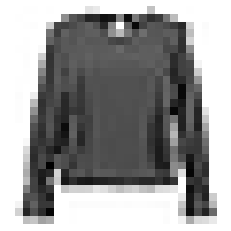

Our model predicted: Shirt
The actual answer was: Shirt


In [16]:
import random
rand = random.randint(0,9999)

plt.subplot()
plt.axis('off')
plt.imshow(test_images[rand], cmap=plt.cm.binary)
plt.show()

prediction = np.argmax(predictions[rand])
actual = class_names[test_labels[rand]]
print(f'Our model predicted: {class_names[prediction]}')
print(f'The actual answer was: {actual}')